## Speech Denoising with STFT and DNN

I first encountered STFT (Short-Time Fourier Transform) through this problem. I managed to solve the problem following the professor's instructions, but I still have some questions about STFT. Particularly, I have doubts about concepts like time resolution, overlap, their interrelationship, and the computation method, among other things.

In [2]:
import librosa
# STFT(Spectrogram) calculation
s, sr=librosa.load('train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

In [4]:
import numpy as np
import tensorflow as tf
import soundfile as sf

# Apply abs
abs_s = np.abs(S)
abs_x = np.abs(X)

# Moedel experiments, the values of last layer should not be a negative ; relu
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(513,)),
    #tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='elu'),
    #tf.keras.layers.Dropout(0.5), 
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(513, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dense(513, activation='elu'),
])

model.compile(optimizer = 'adam', loss='mean_squared_error')

model.fit(abs_x.T, abs_s.T, epochs=40, batch_size=128)

# Load test data and apply STFT
test_noisy, sr = librosa.load('test_x_01.wav', sr=None)
test_x = librosa.stft(test_noisy, n_fft=1024, hop_length=512)

# Predict test x
test_abs_x = np.abs(test_x)
p_abs_s = model.predict(test_abs_x.T).T

#Recover the (complex-valued) speech spectrogram of the test signal
p_hat_s = p_abs_s * (test_x / (test_abs_x)) # + 1e-20

# Reconstructin test file
sh_test = librosa.istft(p_hat_s, hop_length=512)
sf.write('test_s_01_recons.wav', sh_test, sr)

# Compare with ground truth
ground_truth, sr = librosa.load('test_s_01.wav', sr=None)

# Adjust length between two files
if sh_test.shape[0] > ground_truth.shape[0]:
    sh_test = sh_test[:ground_truth.shape[0]]
else:
    ground_truth = ground_truth[:sh_test.shape[0]]

# SNR calulation
SNR = 10 * np.log10(np.sum(ground_truth ** 2) / np.sum((ground_truth - sh_test) ** 2))

print(f"SNR Ratio: {SNR} dB")

Epoch 1/40
20/20 [==============================] - 0s 3ms/step - loss: 0.0729
Epoch 2/40
20/20 [==============================] - 0s 3ms/step - loss: 0.0370
Epoch 3/40
20/20 [==============================] - 0s 3ms/step - loss: 0.0227
Epoch 4/40
20/20 [==============================] - 0s 3ms/step - loss: 0.0160
Epoch 5/40
20/20 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 6/40
20/20 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 7/40
20/20 [==============================] - 0s 4ms/step - loss: 0.0094
Epoch 8/40
20/20 [==============================] - 0s 4ms/step - loss: 0.0085
Epoch 9/40
20/20 [==============================] - 0s 3ms/step - loss: 0.0078
Epoch 10/40
20/20 [==============================] - 0s 3ms/step - loss: 0.0073
Epoch 11/40
20/20 [==============================] - 0s 4ms/step - loss: 0.0069
Epoch 12/40
20/20 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 13/40
20/20 [==============================

# P1 Audio File_1

In [49]:
from IPython.display import Audio
P1_audio = 'test_s_01_recons.wav'
Audio(P1_audio)

In [90]:
# Professor Kim's Voice !?


import librosa
s, sr=librosa.load('train_clean_male.wav', sr=None)
S=librosa.stft(s, n_fft=1024, hop_length=512)
sn, sr=librosa.load('train_dirty_male.wav', sr=None)
X=librosa.stft(sn, n_fft=1024, hop_length=512)

# Apply abs
abs_s = np.abs(S)
abs_x = np.abs(X)

# Moedel experiments, the values of last layer should not be a negative 
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(513,)),
    #tf.keras.layers.Dense(256, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(256, activation='elu'),
    #tf.keras.layers.Dropout(0.5), 
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dense(256, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    tf.keras.layers.Dense(513, activation='relu'),
    #tf.keras.layers.BatchNormalization(),
    #tf.keras.layers.Dense(513, activation='elu'),
])

model.compile(optimizer = 'adam', loss='mean_squared_error')

model.fit(abs_x.T, abs_s.T, epochs=40, batch_size=128)

# Load test data and apply STFT
test_noisy, sr = librosa.load('test_x_02.wav', sr=None)
test_x_k = librosa.stft(test_noisy, n_fft=1024, hop_length=512)

# Predict test x
test_abs_x_k = np.abs(test_x_k)
p_abs_s_k = model.predict(test_abs_x_k.T).T

#Recover the (complex-valued) speech spectrogram of the test signal
p_hat_s_k = p_abs_s_k * (test_x_k / (test_abs_x_k)) # + 1e-20

# Reconstructin test file
sh_test_k = librosa.istft(p_hat_s_k, hop_length=512)
sf.write('test_s_02_recons.wav', sh_test_k, sr)

Epoch 1/40
20/20 [==============================] - 0s 6ms/step - loss: 0.0709
Epoch 2/40
20/20 [==============================] - 0s 6ms/step - loss: 0.0380
Epoch 3/40
20/20 [==============================] - 0s 6ms/step - loss: 0.0233
Epoch 4/40
20/20 [==============================] - 0s 6ms/step - loss: 0.0166
Epoch 5/40
20/20 [==============================] - 0s 6ms/step - loss: 0.0132
Epoch 6/40
20/20 [==============================] - 0s 6ms/step - loss: 0.0112
Epoch 7/40
20/20 [==============================] - 0s 6ms/step - loss: 0.0098
Epoch 8/40
20/20 [==============================] - 0s 5ms/step - loss: 0.0088
Epoch 9/40
20/20 [==============================] - 0s 6ms/step - loss: 0.0081
Epoch 10/40
20/20 [==============================] - 0s 6ms/step - loss: 0.0076
Epoch 11/40
20/20 [==============================] - 0s 5ms/step - loss: 0.0071
Epoch 12/40
20/20 [==============================] - 0s 5ms/step - loss: 0.0068
Epoch 13/40
20/20 [==============================

# P1 Audio File_2_Professor Kim's voice

In [51]:
from IPython.display import Audio
P1_audio_Kim = 'test_s_02_recons.wav'
Audio(P1_audio_Kim)

In [96]:
pip install --upgrade soundfile

Note: you may need to restart the kernel to use updated packages.


## Speech Enhancement using 1D CNN

This problem was the most difficult problem because the desired result was not easily obtained. I somehow solved this problem, but I think I need to practice a bit more and become familiar with the correlation between filters and kernels and strides and pooling.

In [47]:
# import numpy as np
import tensorflow as tf
import soundfile as sf
import librosa
from tensorflow.keras import initializers
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.initializers import he_normal

# Data load
s, sr = librosa.load('train_clean_male.wav', sr=None)
sn, sr = librosa.load('train_dirty_male.wav', sr=None)

# STFT(Spectrogram) calculation
abs_s = np.abs(librosa.stft(s, n_fft=1024, hop_length=512))
abs_x = np.abs(librosa.stft(sn, n_fft=1024, hop_length=512))

# Transopose for CNN
abs_s = abs_s.T
abs_x = abs_x.T

# 1D CNN Model 
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(513,)), 
    tf.keras.layers.Reshape(target_shape=(513, 1)), 
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, activation='elu'),#strides =2),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(filters=256, kernel_size=3, activation='elu', strides =2),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    #tf.keras.layers.Conv1D(filters=512, kernel_size=3, activation='relu',strides =2),
    #tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(256, activation='elu', kernel_initializer=he_normal()),
    tf.keras.layers.Dense(513, activation='relu', kernel_initializer=he_normal())
])

# Compile
model.compile(optimizer='adam', loss='mean_squared_error')

# Traning X and S
model.fit(abs_x, abs_s, epochs=60, batch_size=256)

# Load test data and apply STFT
test_noisy, sr = librosa.load('test_x_01.wav', sr=None)
test_x = librosa.stft(test_noisy, n_fft=1024, hop_length=512).T
test_x_abs = np.abs(test_x)

# Predict test x
p_abs_s_cnn = model.predict(test_x_abs)

# Recover the (complex-valued) speech spectrogram of the test signal
p_hat_s_cnn = p_abs_s_cnn * (test_x / (test_x_abs + 1e-20))
sh_test_cnn = librosa.istft(p_hat_s_cnn.T, hop_length=512)
sf.write('test_s_01_recons_cnn.wav', sh_test_cnn, sr)

# Compare with ground truth
ground_truth, sr = librosa.load('test_s_01.wav', sr=None)

# Adjust length between two files
if sh_test_cnn.shape[0] > ground_truth.shape[0]:
    sh_test_cnn = sh_test_cnn[:ground_truth.shape[0]]
else:
    ground_truth = ground_truth[:sh_test_cnn.shape[0]]

# SNR calulation
SNR = 10 * np.log10(np.sum(ground_truth ** 2) / np.sum((ground_truth - sh_test_cnn) ** 2))

print(f"SNR Ratio: {SNR} dB")

Epoch 1/60
10/10 [==============================] - 2s 187ms/step - loss: 0.0702
Epoch 2/60
10/10 [==============================] - 2s 189ms/step - loss: 0.0485
Epoch 3/60
10/10 [==============================] - 2s 184ms/step - loss: 0.0315
Epoch 4/60
10/10 [==============================] - 2s 208ms/step - loss: 0.0185
Epoch 5/60
10/10 [==============================] - 2s 198ms/step - loss: 0.0130
Epoch 6/60
10/10 [==============================] - 2s 189ms/step - loss: 0.0102
Epoch 7/60
10/10 [==============================] - 2s 193ms/step - loss: 0.0086
Epoch 8/60
10/10 [==============================] - 2s 197ms/step - loss: 0.0075
Epoch 9/60
10/10 [==============================] - 2s 192ms/step - loss: 0.0069
Epoch 10/60
10/10 [==============================] - 2s 194ms/step - loss: 0.0064
Epoch 11/60
10/10 [==============================] - 2s 194ms/step - loss: 0.0059
Epoch 12/60
10/10 [==============================] - 2s 186ms/step - loss: 0.0056
Epoch 13/60
10/10 [======

# P2 Audio File

In [52]:
from IPython.display import Audio
P2_audio = 'test_s_01_recons_cnn.wav'
Audio(P2_audio)

## CIFAR-10 Classification with Data Augmentation

I tried applying CNN to image training for the first time through this problem. In particular, I learned how to normalize an image and then rescale it to a range between -1 and 1. I also learned what role augmented data plays.
### I wanted to check the accuracy for every epoch, so I didn't set verbose = 0. I apologize for the long scroll, and I appreciate your patience. 

Epoch 1/200
352/352 [==============================] - 8s 20ms/step - loss: 1.8522 - accuracy: 0.3253 - val_loss: 1.5777 - val_accuracy: 0.4264
Epoch 2/200
352/352 [==============================] - 7s 21ms/step - loss: 1.5109 - accuracy: 0.4547 - val_loss: 1.4549 - val_accuracy: 0.4736
Epoch 3/200
352/352 [==============================] - 7s 20ms/step - loss: 1.3965 - accuracy: 0.4989 - val_loss: 1.3569 - val_accuracy: 0.5130
Epoch 4/200
352/352 [==============================] - 7s 19ms/step - loss: 1.3257 - accuracy: 0.5239 - val_loss: 1.2821 - val_accuracy: 0.5468
Epoch 5/200
352/352 [==============================] - 7s 20ms/step - loss: 1.2684 - accuracy: 0.5489 - val_loss: 1.2389 - val_accuracy: 0.5592
Epoch 6/200
352/352 [==============================] - 7s 20ms/step - loss: 1.2245 - accuracy: 0.5644 - val_loss: 1.1984 - val_accuracy: 0.5760
Epoch 7/200
352/352 [==============================] - 7s 20ms/step - loss: 1.1901 - accuracy: 0.5769 - val_loss: 1.1893 - val_accuracy:

352/352 [==============================] - 9s 24ms/step - loss: 0.8298 - accuracy: 0.7086 - val_loss: 1.0088 - val_accuracy: 0.6632
Epoch 114/200
352/352 [==============================] - 8s 23ms/step - loss: 0.8265 - accuracy: 0.7096 - val_loss: 1.0158 - val_accuracy: 0.6538
Epoch 115/200
352/352 [==============================] - 8s 24ms/step - loss: 0.8243 - accuracy: 0.7104 - val_loss: 1.0232 - val_accuracy: 0.6526
Epoch 116/200
352/352 [==============================] - 9s 24ms/step - loss: 0.8264 - accuracy: 0.7086 - val_loss: 1.0415 - val_accuracy: 0.6498
Epoch 117/200
352/352 [==============================] - 8s 24ms/step - loss: 0.8248 - accuracy: 0.7089 - val_loss: 1.0256 - val_accuracy: 0.6550
Epoch 118/200
352/352 [==============================] - 8s 23ms/step - loss: 0.8240 - accuracy: 0.7112 - val_loss: 1.0258 - val_accuracy: 0.6574
Epoch 119/200
352/352 [==============================] - 8s 23ms/step - loss: 0.8223 - accuracy: 0.7104 - val_loss: 1.0170 - val_accuracy:

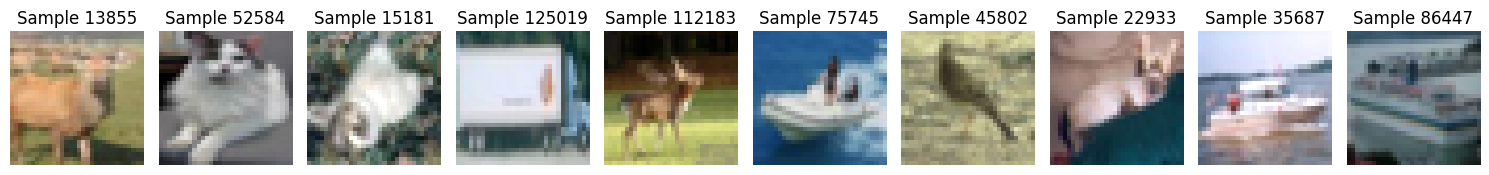

Epoch 1/200
1407/1407 [==============================] - 29s 20ms/step - loss: 1.4942 - accuracy: 0.4619 - val_loss: 1.2553 - val_accuracy: 0.5564
Epoch 2/200
1407/1407 [==============================] - 29s 20ms/step - loss: 1.2060 - accuracy: 0.5739 - val_loss: 1.1379 - val_accuracy: 0.6014
Epoch 3/200
1407/1407 [==============================] - 28s 20ms/step - loss: 1.1281 - accuracy: 0.6030 - val_loss: 1.0979 - val_accuracy: 0.6148
Epoch 4/200
1407/1407 [==============================] - 29s 21ms/step - loss: 1.0812 - accuracy: 0.6218 - val_loss: 1.0577 - val_accuracy: 0.6278
Epoch 5/200
1407/1407 [==============================] - 32s 22ms/step - loss: 1.0509 - accuracy: 0.6319 - val_loss: 1.0383 - val_accuracy: 0.6362
Epoch 6/200
1407/1407 [==============================] - 30s 21ms/step - loss: 1.0252 - accuracy: 0.6413 - val_loss: 1.0287 - val_accuracy: 0.6396
Epoch 7/200
1407/1407 [==============================] - 29s 21ms/step - loss: 1.0100 - accuracy: 0.6470 - val_loss: 1

1407/1407 [==============================] - 33s 23ms/step - loss: 0.7993 - accuracy: 0.7214 - val_loss: 0.9395 - val_accuracy: 0.6832
Epoch 112/200
1407/1407 [==============================] - 30s 21ms/step - loss: 0.7998 - accuracy: 0.7216 - val_loss: 0.9494 - val_accuracy: 0.6806
Epoch 113/200
1407/1407 [==============================] - 33s 23ms/step - loss: 0.7993 - accuracy: 0.7216 - val_loss: 0.9602 - val_accuracy: 0.6826
Epoch 114/200
1407/1407 [==============================] - 33s 23ms/step - loss: 0.7988 - accuracy: 0.7217 - val_loss: 0.9438 - val_accuracy: 0.6824
Epoch 115/200
1407/1407 [==============================] - 33s 23ms/step - loss: 0.7987 - accuracy: 0.7224 - val_loss: 0.9449 - val_accuracy: 0.6824
Epoch 116/200
1407/1407 [==============================] - 31s 22ms/step - loss: 0.7998 - accuracy: 0.7211 - val_loss: 0.9416 - val_accuracy: 0.6818
Epoch 117/200
1407/1407 [==============================] - 32s 23ms/step - loss: 0.7958 - accuracy: 0.7232 - val_loss: 0

1407/1407 [==============================] - 33s 23ms/step - loss: 0.7870 - accuracy: 0.7254 - val_loss: 0.9505 - val_accuracy: 0.6796
Epoch 167/200
1407/1407 [==============================] - 33s 23ms/step - loss: 0.7852 - accuracy: 0.7262 - val_loss: 0.9686 - val_accuracy: 0.6746
Epoch 168/200
1407/1407 [==============================] - 34s 24ms/step - loss: 0.7860 - accuracy: 0.7255 - val_loss: 0.9588 - val_accuracy: 0.6748
Epoch 169/200
1407/1407 [==============================] - 32s 23ms/step - loss: 0.7843 - accuracy: 0.7260 - val_loss: 0.9604 - val_accuracy: 0.6738
Epoch 170/200
1407/1407 [==============================] - 33s 23ms/step - loss: 0.7850 - accuracy: 0.7261 - val_loss: 0.9547 - val_accuracy: 0.6746
Epoch 171/200
1407/1407 [==============================] - 32s 23ms/step - loss: 0.7861 - accuracy: 0.7258 - val_loss: 0.9541 - val_accuracy: 0.6760
Epoch 172/200
1407/1407 [==============================] - 32s 23ms/step - loss: 0.7857 - accuracy: 0.7263 - val_loss: 0

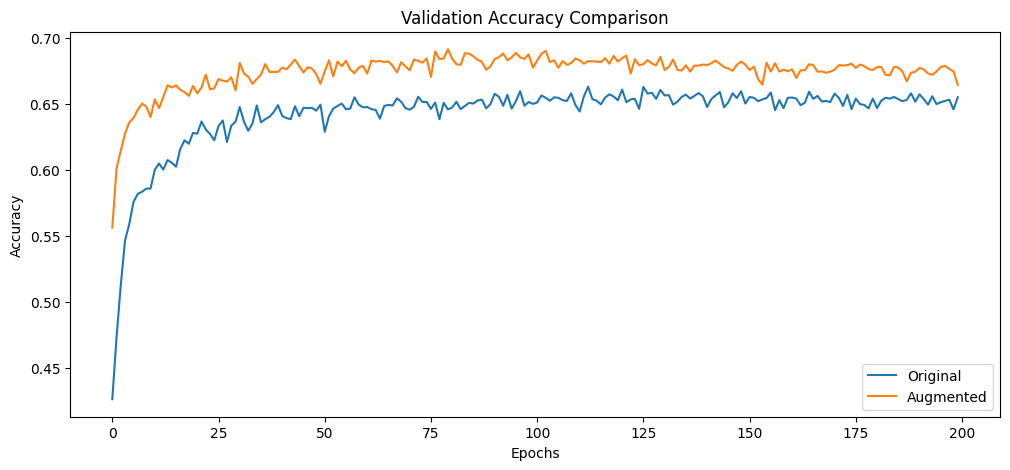

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.initializers import he_normal
import random
from keras.datasets import cifar10


# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Set X_train and x_val
x_val = x_train[-5000:]
y_val = y_train[-5000:]
x_train = x_train[:-5000]
y_train = y_train[:-5000]

#  CNN classifier
# Reshape images and normalize
x_train = x_train.reshape(32, 32, 3) / 255.0
x_val = x_val.reshape(32, 32, 3) / 255.0
x_train = (x_train - 0.5) * 2
x_val = (x_val - 0.5) * 2

# Build CNN model with He initializer
model = models.Sequential()
model.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(32, 32, 3), kernel_initializer=he_normal()))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(10, (5, 5), activation='relu', kernel_initializer=he_normal()))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(20, activation='relu', kernel_initializer=he_normal()))
model.add(layers.Dense(10, activation='softmax'))

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and record validation accuracy over epochs
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size=128)

# Returen to the Normal [0,1]

# ver.1
#x_train = (x_train / 2) + 0.5
#x_val = (x_val / 2) + 0.5

#ver.2
x_train = (x_train + 1) / 2
x_val = (x_val + 1) / 2

# Build another classifier using augmented dataset


# Brighten images
brightened_x_train = np.minimum(1.1 * x_train, 1) # more than 1 

# Darken images
darkened_x_train = 0.9 * x_train # less than 1

# Flip images horizontally
flipped_x_train = np.flip(x_train, axis=2)

# Merge datasets
augmented_x_train = np.vstack([brightened_x_train, darkened_x_train, flipped_x_train, x_train])
augmented_y_train = np.vstack([y_train, y_train, y_train, y_train])
print(augmented_x_train.shape)

# Visualize augmented images
num_samples = 10

fig, axs = plt.subplots(1, num_samples, figsize=(15, 5))
for i in range(num_samples):
    index = random.randint(0, len(augmented_x_train) - 1)
    axs[i].imshow(augmented_x_train[index]) 
    axs[i].set_title(f"Sample {index}")
    axs[i].axis('off')
plt.tight_layout()
plt.show()

# Scale back to [-1,1]
augmented_x_train = (augmented_x_train - 0.5) * 2
x_val = (x_val - 0.5) * 2

# Train with the augmented dataset
model_augmented = models.Sequential()
model_augmented.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(32, 32, 3), kernel_initializer=he_normal()))
model_augmented.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model_augmented.add(layers.Conv2D(10, (5, 5), activation='relu', kernel_initializer=he_normal()))
model_augmented.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model_augmented.add(layers.Flatten())
model_augmented.add(layers.Dense(20, activation='relu', kernel_initializer=he_normal()))
model_augmented.add(layers.Dense(10, activation='softmax'))

model_augmented.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_augmented = model_augmented.fit(augmented_x_train, augmented_y_train, validation_data=(x_val, y_val), epochs=200, batch_size=128)

# Visualize validation accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['val_accuracy'], label='Original')
plt.plot(history_augmented.history['val_accuracy'], label='Augmented')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Self-Supervised Pretext Task + Transfer Learning (CIFAR-10)

The challenging aspect of this problem was setting up the transfer model. In the part where I retrieve the weights, I applied the weights, removed the last layer using pop(), and then reinserted the softmax layer with an output value of 10. The next difficult part was applying different learning rates to each layer, and I solved this using the 'tfa.optimizers.MultiOptimizer' method. However, the most demanding aspect of this  problem was that there were so many epochs that it took a lot of time. 
### I wanted to check the accuracy for every epoch, so I didn't set verbose = 0. I apologize for the long scroll, and I appreciate your patience. To see the final results, just scroll to the very end.

(148500, 32, 32, 3)
(148500, 1)
Epoch 1/200
581/581 [==============================] - 20s 33ms/step - loss: 0.8813 - accuracy: 0.5776
Epoch 2/200
581/581 [==============================] - 19s 33ms/step - loss: 0.7685 - accuracy: 0.6547
Epoch 3/200
581/581 [==============================] - 20s 34ms/step - loss: 0.7332 - accuracy: 0.6751
Epoch 4/200
581/581 [==============================] - 20s 34ms/step - loss: 0.7098 - accuracy: 0.6881
Epoch 5/200
581/581 [==============================] - 20s 34ms/step - loss: 0.6902 - accuracy: 0.6988
Epoch 6/200
581/581 [==============================] - 20s 34ms/step - loss: 0.6787 - accuracy: 0.7044
Epoch 7/200
581/581 [==============================] - 24s 41ms/step - loss: 0.6638 - accuracy: 0.7125
Epoch 8/200
581/581 [==============================] - 26s 45ms/step - loss: 0.6529 - accuracy: 0.7171
Epoch 9/200
581/581 [==============================] - 25s 42ms/step - loss: 0.6430 - accuracy: 0.7222
Epoch 10/200
581/581 [===================

581/581 [==============================] - 23s 39ms/step - loss: 0.5103 - accuracy: 0.7866
Epoch 158/200
581/581 [==============================] - 23s 39ms/step - loss: 0.5095 - accuracy: 0.7868
Epoch 159/200
581/581 [==============================] - 23s 39ms/step - loss: 0.5107 - accuracy: 0.7865
Epoch 160/200
581/581 [==============================] - 23s 39ms/step - loss: 0.5108 - accuracy: 0.7864
Epoch 161/200
581/581 [==============================] - 23s 40ms/step - loss: 0.5123 - accuracy: 0.7854
Epoch 162/200
581/581 [==============================] - 23s 40ms/step - loss: 0.5098 - accuracy: 0.7874
Epoch 163/200
581/581 [==============================] - 23s 40ms/step - loss: 0.5099 - accuracy: 0.7872
Epoch 164/200
581/581 [==============================] - 23s 39ms/step - loss: 0.5108 - accuracy: 0.7864
Epoch 165/200
581/581 [==============================] - 23s 39ms/step - loss: 0.5097 - accuracy: 0.7874
Epoch 166/200
581/581 [==============================] - 23s 39ms/ste

Epoch 26/10000
1/1 [==============================] - 0s 351ms/step - loss: 2.0078 - accuracy: 0.2960 - val_loss: 2.1914 - val_accuracy: 0.1873
Epoch 27/10000
1/1 [==============================] - 0s 346ms/step - loss: 1.9909 - accuracy: 0.2960 - val_loss: 2.1850 - val_accuracy: 0.1918
Epoch 28/10000
1/1 [==============================] - 0s 354ms/step - loss: 1.9738 - accuracy: 0.3180 - val_loss: 2.1786 - val_accuracy: 0.1969
Epoch 29/10000
1/1 [==============================] - 0s 358ms/step - loss: 1.9563 - accuracy: 0.3140 - val_loss: 2.1722 - val_accuracy: 0.2034
Epoch 30/10000
1/1 [==============================] - 0s 373ms/step - loss: 1.9386 - accuracy: 0.3240 - val_loss: 2.1657 - val_accuracy: 0.2094
Epoch 31/10000
1/1 [==============================] - 0s 345ms/step - loss: 1.9208 - accuracy: 0.3420 - val_loss: 2.1593 - val_accuracy: 0.2158
Epoch 32/10000
1/1 [==============================] - 0s 344ms/step - loss: 1.9029 - accuracy: 0.3500 - val_loss: 2.1535 - val_accuracy:

Epoch 83/10000
1/1 [==============================] - 0s 355ms/step - loss: 0.9292 - accuracy: 0.7080 - val_loss: 2.2949 - val_accuracy: 0.2935
Epoch 84/10000
1/1 [==============================] - 0s 353ms/step - loss: 0.9119 - accuracy: 0.7120 - val_loss: 2.3012 - val_accuracy: 0.2940
Epoch 85/10000
1/1 [==============================] - 0s 348ms/step - loss: 0.8941 - accuracy: 0.7120 - val_loss: 2.3122 - val_accuracy: 0.2948
Epoch 86/10000
1/1 [==============================] - 0s 342ms/step - loss: 0.8762 - accuracy: 0.7140 - val_loss: 2.3288 - val_accuracy: 0.2948
Epoch 87/10000
1/1 [==============================] - 0s 353ms/step - loss: 0.8589 - accuracy: 0.7220 - val_loss: 2.3420 - val_accuracy: 0.2949
Epoch 88/10000
1/1 [==============================] - 0s 347ms/step - loss: 0.8412 - accuracy: 0.7260 - val_loss: 2.3619 - val_accuracy: 0.2965
Epoch 89/10000
1/1 [==============================] - 0s 369ms/step - loss: 0.8232 - accuracy: 0.7360 - val_loss: 2.3703 - val_accuracy:

1/1 [==============================] - 0s 360ms/step - loss: 0.0475 - accuracy: 0.9980 - val_loss: 5.2305 - val_accuracy: 0.2972
Epoch 196/10000
1/1 [==============================] - 0s 363ms/step - loss: 0.0465 - accuracy: 0.9980 - val_loss: 5.2594 - val_accuracy: 0.2975
Epoch 197/10000
1/1 [==============================] - 0s 362ms/step - loss: 0.0455 - accuracy: 0.9980 - val_loss: 5.2885 - val_accuracy: 0.2980
Epoch 198/10000
1/1 [==============================] - 0s 363ms/step - loss: 0.0445 - accuracy: 0.9980 - val_loss: 5.3053 - val_accuracy: 0.2976
Epoch 199/10000
1/1 [==============================] - 0s 360ms/step - loss: 0.0435 - accuracy: 0.9980 - val_loss: 5.3240 - val_accuracy: 0.2970
Epoch 200/10000
1/1 [==============================] - 0s 379ms/step - loss: 0.0426 - accuracy: 0.9980 - val_loss: 5.3492 - val_accuracy: 0.2965
Epoch 201/10000
1/1 [==============================] - 0s 364ms/step - loss: 0.0418 - accuracy: 0.9980 - val_loss: 5.3731 - val_accuracy: 0.2982
E

1/1 [==============================] - 0s 357ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 6.8200 - val_accuracy: 0.2952
Epoch 308/10000
1/1 [==============================] - 0s 371ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 6.8319 - val_accuracy: 0.2950
Epoch 309/10000
1/1 [==============================] - 0s 355ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 6.8449 - val_accuracy: 0.2950
Epoch 310/10000
1/1 [==============================] - 0s 369ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 6.8528 - val_accuracy: 0.2951
Epoch 311/10000
1/1 [==============================] - 0s 363ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 6.8583 - val_accuracy: 0.2955
Epoch 312/10000
1/1 [==============================] - 0s 359ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 6.8667 - val_accuracy: 0.2953
Epoch 313/10000
1/1 [==============================] - 0s 358ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 6.8788 - val_accuracy: 0.2953
E

1/1 [==============================] - 0s 389ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 7.6645 - val_accuracy: 0.2974
Epoch 420/10000
1/1 [==============================] - 0s 380ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 7.6712 - val_accuracy: 0.2976
Epoch 421/10000
1/1 [==============================] - 0s 395ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 7.6766 - val_accuracy: 0.2977
Epoch 422/10000
1/1 [==============================] - 0s 394ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 7.6801 - val_accuracy: 0.2976
Epoch 423/10000
1/1 [==============================] - 0s 392ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 7.6850 - val_accuracy: 0.2979
Epoch 424/10000
1/1 [==============================] - 0s 396ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 7.6920 - val_accuracy: 0.2980
Epoch 425/10000
1/1 [==============================] - 0s 397ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 7.6988 - val_accuracy: 0.2974
E

1/1 [==============================] - 0s 359ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 8.2172 - val_accuracy: 0.2990
Epoch 532/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 8.2222 - val_accuracy: 0.2989
Epoch 533/10000
1/1 [==============================] - 0s 372ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 8.2264 - val_accuracy: 0.2989
Epoch 534/10000
1/1 [==============================] - 0s 365ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 8.2299 - val_accuracy: 0.2991
Epoch 535/10000
1/1 [==============================] - 0s 353ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 8.2339 - val_accuracy: 0.2991
Epoch 536/10000
1/1 [==============================] - 0s 362ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 8.2383 - val_accuracy: 0.2990
Epoch 537/10000
1/1 [==============================] - 0s 377ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 8.2425 - val_accuracy: 0.2993
E

1/1 [==============================] - 0s 391ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 8.6364 - val_accuracy: 0.2988
Epoch 644/10000
1/1 [==============================] - 0s 439ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 8.6389 - val_accuracy: 0.2987
Epoch 645/10000
1/1 [==============================] - 0s 400ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 8.6424 - val_accuracy: 0.2986
Epoch 646/10000
1/1 [==============================] - 0s 384ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 8.6474 - val_accuracy: 0.2987
Epoch 647/10000
1/1 [==============================] - 0s 417ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 8.6520 - val_accuracy: 0.2986
Epoch 648/10000
1/1 [==============================] - 0s 402ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 8.6551 - val_accuracy: 0.2986
Epoch 649/10000
1/1 [==============================] - 0s 381ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 8.6571 - val_accuracy: 0.2987
E

Epoch 699/10000
1/1 [==============================] - 0s 393ms/step - loss: 9.0089e-04 - accuracy: 1.0000 - val_loss: 8.8133 - val_accuracy: 0.2988
Epoch 700/10000
1/1 [==============================] - 0s 419ms/step - loss: 8.9786e-04 - accuracy: 1.0000 - val_loss: 8.8167 - val_accuracy: 0.2988
Epoch 701/10000
1/1 [==============================] - 0s 421ms/step - loss: 8.9477e-04 - accuracy: 1.0000 - val_loss: 8.8199 - val_accuracy: 0.2987
Epoch 702/10000
1/1 [==============================] - 0s 385ms/step - loss: 8.9169e-04 - accuracy: 1.0000 - val_loss: 8.8225 - val_accuracy: 0.2987
Epoch 703/10000
1/1 [==============================] - 0s 453ms/step - loss: 8.8856e-04 - accuracy: 1.0000 - val_loss: 8.8254 - val_accuracy: 0.2988
Epoch 704/10000
1/1 [==============================] - 0s 388ms/step - loss: 8.8557e-04 - accuracy: 1.0000 - val_loss: 8.8289 - val_accuracy: 0.2988
Epoch 705/10000
1/1 [==============================] - 0s 375ms/step - loss: 8.8256e-04 - accuracy: 1.0000

Epoch 754/10000
1/1 [==============================] - 0s 393ms/step - loss: 7.5304e-04 - accuracy: 1.0000 - val_loss: 8.9705 - val_accuracy: 0.2994
Epoch 755/10000
1/1 [==============================] - 0s 400ms/step - loss: 7.5065e-04 - accuracy: 1.0000 - val_loss: 8.9728 - val_accuracy: 0.2995
Epoch 756/10000
1/1 [==============================] - 0s 397ms/step - loss: 7.4837e-04 - accuracy: 1.0000 - val_loss: 8.9760 - val_accuracy: 0.2995
Epoch 757/10000
1/1 [==============================] - 0s 418ms/step - loss: 7.4605e-04 - accuracy: 1.0000 - val_loss: 8.9797 - val_accuracy: 0.2993
Epoch 758/10000
1/1 [==============================] - 0s 422ms/step - loss: 7.4385e-04 - accuracy: 1.0000 - val_loss: 8.9820 - val_accuracy: 0.2992
Epoch 759/10000
1/1 [==============================] - 0s 421ms/step - loss: 7.4156e-04 - accuracy: 1.0000 - val_loss: 8.9834 - val_accuracy: 0.2992
Epoch 760/10000
1/1 [==============================] - 0s 386ms/step - loss: 7.3935e-04 - accuracy: 1.0000

Epoch 809/10000
1/1 [==============================] - 0s 407ms/step - loss: 6.3908e-04 - accuracy: 1.0000 - val_loss: 9.1156 - val_accuracy: 0.2996
Epoch 810/10000
1/1 [==============================] - 0s 419ms/step - loss: 6.3721e-04 - accuracy: 1.0000 - val_loss: 9.1179 - val_accuracy: 0.2995
Epoch 811/10000
1/1 [==============================] - 0s 431ms/step - loss: 6.3550e-04 - accuracy: 1.0000 - val_loss: 9.1205 - val_accuracy: 0.2996
Epoch 812/10000
1/1 [==============================] - 0s 414ms/step - loss: 6.3360e-04 - accuracy: 1.0000 - val_loss: 9.1234 - val_accuracy: 0.2996
Epoch 813/10000
1/1 [==============================] - 0s 406ms/step - loss: 6.3180e-04 - accuracy: 1.0000 - val_loss: 9.1260 - val_accuracy: 0.2994
Epoch 814/10000
1/1 [==============================] - 0s 405ms/step - loss: 6.3003e-04 - accuracy: 1.0000 - val_loss: 9.1285 - val_accuracy: 0.2995
Epoch 815/10000
1/1 [==============================] - 0s 410ms/step - loss: 6.2819e-04 - accuracy: 1.0000

Epoch 864/10000
1/1 [==============================] - 0s 430ms/step - loss: 5.4909e-04 - accuracy: 1.0000 - val_loss: 9.2496 - val_accuracy: 0.2993
Epoch 865/10000
1/1 [==============================] - 0s 391ms/step - loss: 5.4774e-04 - accuracy: 1.0000 - val_loss: 9.2519 - val_accuracy: 0.2994
Epoch 866/10000
1/1 [==============================] - 0s 378ms/step - loss: 5.4625e-04 - accuracy: 1.0000 - val_loss: 9.2539 - val_accuracy: 0.2993
Epoch 867/10000
1/1 [==============================] - 0s 405ms/step - loss: 5.4482e-04 - accuracy: 1.0000 - val_loss: 9.2564 - val_accuracy: 0.2993
Epoch 868/10000
1/1 [==============================] - 0s 391ms/step - loss: 5.4342e-04 - accuracy: 1.0000 - val_loss: 9.2593 - val_accuracy: 0.2992
Epoch 869/10000
1/1 [==============================] - 0s 378ms/step - loss: 5.4204e-04 - accuracy: 1.0000 - val_loss: 9.2619 - val_accuracy: 0.2992
Epoch 870/10000
1/1 [==============================] - 0s 375ms/step - loss: 5.4054e-04 - accuracy: 1.0000

Epoch 919/10000
1/1 [==============================] - 0s 414ms/step - loss: 4.7686e-04 - accuracy: 1.0000 - val_loss: 9.3754 - val_accuracy: 0.2991
Epoch 920/10000
1/1 [==============================] - 0s 391ms/step - loss: 4.7572e-04 - accuracy: 1.0000 - val_loss: 9.3775 - val_accuracy: 0.2992
Epoch 921/10000
1/1 [==============================] - 0s 366ms/step - loss: 4.7449e-04 - accuracy: 1.0000 - val_loss: 9.3793 - val_accuracy: 0.2991
Epoch 922/10000
1/1 [==============================] - 0s 399ms/step - loss: 4.7341e-04 - accuracy: 1.0000 - val_loss: 9.3813 - val_accuracy: 0.2990
Epoch 923/10000
1/1 [==============================] - 0s 385ms/step - loss: 4.7219e-04 - accuracy: 1.0000 - val_loss: 9.3837 - val_accuracy: 0.2991
Epoch 924/10000
1/1 [==============================] - 0s 372ms/step - loss: 4.7104e-04 - accuracy: 1.0000 - val_loss: 9.3857 - val_accuracy: 0.2991
Epoch 925/10000
1/1 [==============================] - 0s 386ms/step - loss: 4.6984e-04 - accuracy: 1.0000

Epoch 974/10000
1/1 [==============================] - 0s 414ms/step - loss: 4.1785e-04 - accuracy: 1.0000 - val_loss: 9.4918 - val_accuracy: 0.2989
Epoch 975/10000
1/1 [==============================] - 0s 440ms/step - loss: 4.1688e-04 - accuracy: 1.0000 - val_loss: 9.4939 - val_accuracy: 0.2990
Epoch 976/10000
1/1 [==============================] - 0s 404ms/step - loss: 4.1588e-04 - accuracy: 1.0000 - val_loss: 9.4958 - val_accuracy: 0.2989
Epoch 977/10000
1/1 [==============================] - 0s 412ms/step - loss: 4.1491e-04 - accuracy: 1.0000 - val_loss: 9.4980 - val_accuracy: 0.2990
Epoch 978/10000
1/1 [==============================] - 0s 429ms/step - loss: 4.1394e-04 - accuracy: 1.0000 - val_loss: 9.5002 - val_accuracy: 0.2990
Epoch 979/10000
1/1 [==============================] - 0s 439ms/step - loss: 4.1301e-04 - accuracy: 1.0000 - val_loss: 9.5019 - val_accuracy: 0.2989
Epoch 980/10000
1/1 [==============================] - 0s 428ms/step - loss: 4.1204e-04 - accuracy: 1.0000

Epoch 1029/10000
1/1 [==============================] - 0s 415ms/step - loss: 3.6894e-04 - accuracy: 1.0000 - val_loss: 9.6026 - val_accuracy: 0.2994
Epoch 1030/10000
1/1 [==============================] - 0s 447ms/step - loss: 3.6811e-04 - accuracy: 1.0000 - val_loss: 9.6051 - val_accuracy: 0.2993
Epoch 1031/10000
1/1 [==============================] - 0s 409ms/step - loss: 3.6727e-04 - accuracy: 1.0000 - val_loss: 9.6073 - val_accuracy: 0.2993
Epoch 1032/10000
1/1 [==============================] - 0s 381ms/step - loss: 3.6645e-04 - accuracy: 1.0000 - val_loss: 9.6089 - val_accuracy: 0.2993
Epoch 1033/10000
1/1 [==============================] - 0s 382ms/step - loss: 3.6569e-04 - accuracy: 1.0000 - val_loss: 9.6103 - val_accuracy: 0.2992
Epoch 1034/10000
1/1 [==============================] - 0s 389ms/step - loss: 3.6484e-04 - accuracy: 1.0000 - val_loss: 9.6121 - val_accuracy: 0.2991
Epoch 1035/10000
1/1 [==============================] - 0s 390ms/step - loss: 3.6410e-04 - accuracy:

Epoch 1138/10000
1/1 [==============================] - 0s 431ms/step - loss: 2.9413e-04 - accuracy: 1.0000 - val_loss: 9.8042 - val_accuracy: 0.2989
Epoch 1139/10000
1/1 [==============================] - 0s 463ms/step - loss: 2.9352e-04 - accuracy: 1.0000 - val_loss: 9.8063 - val_accuracy: 0.2989
Epoch 1140/10000
1/1 [==============================] - 0s 395ms/step - loss: 2.9296e-04 - accuracy: 1.0000 - val_loss: 9.8081 - val_accuracy: 0.2991
Epoch 1141/10000
1/1 [==============================] - 0s 391ms/step - loss: 2.9236e-04 - accuracy: 1.0000 - val_loss: 9.8099 - val_accuracy: 0.2991
Epoch 1142/10000
1/1 [==============================] - 0s 409ms/step - loss: 2.9182e-04 - accuracy: 1.0000 - val_loss: 9.8118 - val_accuracy: 0.2991
Epoch 1143/10000
1/1 [==============================] - 0s 414ms/step - loss: 2.9122e-04 - accuracy: 1.0000 - val_loss: 9.8135 - val_accuracy: 0.2989
Epoch 1144/10000
1/1 [==============================] - 0s 402ms/step - loss: 2.9065e-04 - accuracy:

Epoch 1247/10000
1/1 [==============================] - 0s 391ms/step - loss: 2.3964e-04 - accuracy: 1.0000 - val_loss: 9.9870 - val_accuracy: 0.2994
Epoch 1248/10000
1/1 [==============================] - 0s 379ms/step - loss: 2.3921e-04 - accuracy: 1.0000 - val_loss: 9.9886 - val_accuracy: 0.2994
Epoch 1249/10000
1/1 [==============================] - 0s 396ms/step - loss: 2.3879e-04 - accuracy: 1.0000 - val_loss: 9.9903 - val_accuracy: 0.2994
Epoch 1250/10000
1/1 [==============================] - 0s 381ms/step - loss: 2.3835e-04 - accuracy: 1.0000 - val_loss: 9.9918 - val_accuracy: 0.2994
Epoch 1251/10000
1/1 [==============================] - 0s 376ms/step - loss: 2.3794e-04 - accuracy: 1.0000 - val_loss: 9.9933 - val_accuracy: 0.2994
Epoch 1252/10000
1/1 [==============================] - 0s 359ms/step - loss: 2.3752e-04 - accuracy: 1.0000 - val_loss: 9.9950 - val_accuracy: 0.2994
Epoch 1253/10000
1/1 [==============================] - 0s 369ms/step - loss: 2.3709e-04 - accuracy:

1/1 [==============================] - 0s 391ms/step - loss: 1.9894e-04 - accuracy: 1.0000 - val_loss: 10.1528 - val_accuracy: 0.2987
Epoch 1356/10000
1/1 [==============================] - 0s 385ms/step - loss: 1.9860e-04 - accuracy: 1.0000 - val_loss: 10.1539 - val_accuracy: 0.2987
Epoch 1357/10000
1/1 [==============================] - 0s 388ms/step - loss: 1.9827e-04 - accuracy: 1.0000 - val_loss: 10.1556 - val_accuracy: 0.2988
Epoch 1358/10000
1/1 [==============================] - 0s 384ms/step - loss: 1.9795e-04 - accuracy: 1.0000 - val_loss: 10.1574 - val_accuracy: 0.2988
Epoch 1359/10000
1/1 [==============================] - 0s 380ms/step - loss: 1.9761e-04 - accuracy: 1.0000 - val_loss: 10.1590 - val_accuracy: 0.2988
Epoch 1360/10000
1/1 [==============================] - 0s 378ms/step - loss: 1.9729e-04 - accuracy: 1.0000 - val_loss: 10.1603 - val_accuracy: 0.2988
Epoch 1361/10000
1/1 [==============================] - 0s 380ms/step - loss: 1.9697e-04 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 436ms/step - loss: 1.6729e-04 - accuracy: 1.0000 - val_loss: 10.3062 - val_accuracy: 0.2994
Epoch 1464/10000
1/1 [==============================] - 0s 431ms/step - loss: 1.6703e-04 - accuracy: 1.0000 - val_loss: 10.3075 - val_accuracy: 0.2994
Epoch 1465/10000
1/1 [==============================] - 0s 419ms/step - loss: 1.6677e-04 - accuracy: 1.0000 - val_loss: 10.3088 - val_accuracy: 0.2994
Epoch 1466/10000
1/1 [==============================] - 0s 423ms/step - loss: 1.6652e-04 - accuracy: 1.0000 - val_loss: 10.3102 - val_accuracy: 0.2993
Epoch 1467/10000
1/1 [==============================] - 0s 415ms/step - loss: 1.6625e-04 - accuracy: 1.0000 - val_loss: 10.3116 - val_accuracy: 0.2994
Epoch 1468/10000
1/1 [==============================] - 0s 419ms/step - loss: 1.6600e-04 - accuracy: 1.0000 - val_loss: 10.3128 - val_accuracy: 0.2994
Epoch 1469/10000
1/1 [==============================] - 0s 415ms/step - loss: 1.6574e-04 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 361ms/step - loss: 1.4216e-04 - accuracy: 1.0000 - val_loss: 10.4498 - val_accuracy: 0.2988
Epoch 1572/10000
1/1 [==============================] - 0s 383ms/step - loss: 1.4196e-04 - accuracy: 1.0000 - val_loss: 10.4512 - val_accuracy: 0.2988
Epoch 1573/10000
1/1 [==============================] - 0s 363ms/step - loss: 1.4175e-04 - accuracy: 1.0000 - val_loss: 10.4525 - val_accuracy: 0.2988
Epoch 1574/10000
1/1 [==============================] - 0s 366ms/step - loss: 1.4154e-04 - accuracy: 1.0000 - val_loss: 10.4537 - val_accuracy: 0.2987
Epoch 1575/10000
1/1 [==============================] - 0s 382ms/step - loss: 1.4133e-04 - accuracy: 1.0000 - val_loss: 10.4549 - val_accuracy: 0.2990
Epoch 1576/10000
1/1 [==============================] - 0s 362ms/step - loss: 1.4113e-04 - accuracy: 1.0000 - val_loss: 10.4558 - val_accuracy: 0.2988
Epoch 1577/10000
1/1 [==============================] - 0s 354ms/step - loss: 1.4091e-04 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 366ms/step - loss: 1.2203e-04 - accuracy: 1.0000 - val_loss: 10.5838 - val_accuracy: 0.2986
Epoch 1680/10000
1/1 [==============================] - 0s 370ms/step - loss: 1.2186e-04 - accuracy: 1.0000 - val_loss: 10.5852 - val_accuracy: 0.2986
Epoch 1681/10000
1/1 [==============================] - 0s 377ms/step - loss: 1.2169e-04 - accuracy: 1.0000 - val_loss: 10.5865 - val_accuracy: 0.2986
Epoch 1682/10000
1/1 [==============================] - 0s 371ms/step - loss: 1.2153e-04 - accuracy: 1.0000 - val_loss: 10.5877 - val_accuracy: 0.2987
Epoch 1683/10000
1/1 [==============================] - 0s 379ms/step - loss: 1.2136e-04 - accuracy: 1.0000 - val_loss: 10.5888 - val_accuracy: 0.2986
Epoch 1684/10000
1/1 [==============================] - 0s 368ms/step - loss: 1.2120e-04 - accuracy: 1.0000 - val_loss: 10.5899 - val_accuracy: 0.2986
Epoch 1685/10000
1/1 [==============================] - 0s 399ms/step - loss: 1.2103e-04 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 356ms/step - loss: 1.0559e-04 - accuracy: 1.0000 - val_loss: 10.7100 - val_accuracy: 0.2990
Epoch 1788/10000
1/1 [==============================] - 0s 371ms/step - loss: 1.0545e-04 - accuracy: 1.0000 - val_loss: 10.7114 - val_accuracy: 0.2990
Epoch 1789/10000
1/1 [==============================] - 0s 380ms/step - loss: 1.0532e-04 - accuracy: 1.0000 - val_loss: 10.7124 - val_accuracy: 0.2990
Epoch 1790/10000
1/1 [==============================] - 0s 361ms/step - loss: 1.0518e-04 - accuracy: 1.0000 - val_loss: 10.7133 - val_accuracy: 0.2990
Epoch 1791/10000
1/1 [==============================] - 0s 372ms/step - loss: 1.0505e-04 - accuracy: 1.0000 - val_loss: 10.7145 - val_accuracy: 0.2990
Epoch 1792/10000
1/1 [==============================] - 0s 369ms/step - loss: 1.0491e-04 - accuracy: 1.0000 - val_loss: 10.7160 - val_accuracy: 0.2990
Epoch 1793/10000
1/1 [==============================] - 0s 371ms/step - loss: 1.0477e-04 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 367ms/step - loss: 9.2075e-05 - accuracy: 1.0000 - val_loss: 10.8303 - val_accuracy: 0.2993
Epoch 1896/10000
1/1 [==============================] - 0s 368ms/step - loss: 9.1967e-05 - accuracy: 1.0000 - val_loss: 10.8310 - val_accuracy: 0.2993
Epoch 1897/10000
1/1 [==============================] - 0s 363ms/step - loss: 9.1855e-05 - accuracy: 1.0000 - val_loss: 10.8318 - val_accuracy: 0.2993
Epoch 1898/10000
1/1 [==============================] - 0s 359ms/step - loss: 9.1738e-05 - accuracy: 1.0000 - val_loss: 10.8328 - val_accuracy: 0.2993
Epoch 1899/10000
1/1 [==============================] - 0s 364ms/step - loss: 9.1627e-05 - accuracy: 1.0000 - val_loss: 10.8341 - val_accuracy: 0.2993
Epoch 1900/10000
1/1 [==============================] - 0s 368ms/step - loss: 9.1510e-05 - accuracy: 1.0000 - val_loss: 10.8354 - val_accuracy: 0.2993
Epoch 1901/10000
1/1 [==============================] - 0s 358ms/step - loss: 9.1397e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 374ms/step - loss: 8.0844e-05 - accuracy: 1.0000 - val_loss: 10.9438 - val_accuracy: 0.2993
Epoch 2004/10000
1/1 [==============================] - 0s 365ms/step - loss: 8.0755e-05 - accuracy: 1.0000 - val_loss: 10.9448 - val_accuracy: 0.2993
Epoch 2005/10000
1/1 [==============================] - 0s 362ms/step - loss: 8.0657e-05 - accuracy: 1.0000 - val_loss: 10.9459 - val_accuracy: 0.2993
Epoch 2006/10000
1/1 [==============================] - 0s 375ms/step - loss: 8.0564e-05 - accuracy: 1.0000 - val_loss: 10.9469 - val_accuracy: 0.2993
Epoch 2007/10000
1/1 [==============================] - 0s 375ms/step - loss: 8.0471e-05 - accuracy: 1.0000 - val_loss: 10.9480 - val_accuracy: 0.2993
Epoch 2008/10000
1/1 [==============================] - 0s 371ms/step - loss: 8.0375e-05 - accuracy: 1.0000 - val_loss: 10.9492 - val_accuracy: 0.2993
Epoch 2009/10000
1/1 [==============================] - 0s 385ms/step - loss: 8.0282e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 373ms/step - loss: 7.1397e-05 - accuracy: 1.0000 - val_loss: 11.0528 - val_accuracy: 0.2995
Epoch 2112/10000
1/1 [==============================] - 0s 364ms/step - loss: 7.1318e-05 - accuracy: 1.0000 - val_loss: 11.0540 - val_accuracy: 0.2995
Epoch 2113/10000
1/1 [==============================] - 0s 362ms/step - loss: 7.1239e-05 - accuracy: 1.0000 - val_loss: 11.0551 - val_accuracy: 0.2995
Epoch 2114/10000
1/1 [==============================] - 0s 368ms/step - loss: 7.1157e-05 - accuracy: 1.0000 - val_loss: 11.0561 - val_accuracy: 0.2996
Epoch 2115/10000
1/1 [==============================] - 0s 358ms/step - loss: 7.1077e-05 - accuracy: 1.0000 - val_loss: 11.0569 - val_accuracy: 0.2996
Epoch 2116/10000
1/1 [==============================] - 0s 360ms/step - loss: 7.1001e-05 - accuracy: 1.0000 - val_loss: 11.0577 - val_accuracy: 0.2996
Epoch 2117/10000
1/1 [==============================] - 0s 384ms/step - loss: 7.0921e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 461ms/step - loss: 6.3379e-05 - accuracy: 1.0000 - val_loss: 11.1577 - val_accuracy: 0.2995
Epoch 2220/10000
1/1 [==============================] - 0s 473ms/step - loss: 6.3313e-05 - accuracy: 1.0000 - val_loss: 11.1584 - val_accuracy: 0.2994
Epoch 2221/10000
1/1 [==============================] - 0s 488ms/step - loss: 6.3241e-05 - accuracy: 1.0000 - val_loss: 11.1593 - val_accuracy: 0.2995
Epoch 2222/10000
1/1 [==============================] - 0s 452ms/step - loss: 6.3176e-05 - accuracy: 1.0000 - val_loss: 11.1604 - val_accuracy: 0.2995
Epoch 2223/10000
1/1 [==============================] - 0s 444ms/step - loss: 6.3106e-05 - accuracy: 1.0000 - val_loss: 11.1615 - val_accuracy: 0.2996
Epoch 2224/10000
1/1 [==============================] - 0s 417ms/step - loss: 6.3038e-05 - accuracy: 1.0000 - val_loss: 11.1622 - val_accuracy: 0.2995
Epoch 2225/10000
1/1 [==============================] - 0s 427ms/step - loss: 6.2965e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 345ms/step - loss: 5.6496e-05 - accuracy: 1.0000 - val_loss: 11.2583 - val_accuracy: 0.2996
Epoch 2328/10000
1/1 [==============================] - 0s 358ms/step - loss: 5.6438e-05 - accuracy: 1.0000 - val_loss: 11.2591 - val_accuracy: 0.2995
Epoch 2329/10000
1/1 [==============================] - 0s 354ms/step - loss: 5.6382e-05 - accuracy: 1.0000 - val_loss: 11.2599 - val_accuracy: 0.2995
Epoch 2330/10000
1/1 [==============================] - 0s 356ms/step - loss: 5.6325e-05 - accuracy: 1.0000 - val_loss: 11.2610 - val_accuracy: 0.2996
Epoch 2331/10000
1/1 [==============================] - 0s 350ms/step - loss: 5.6266e-05 - accuracy: 1.0000 - val_loss: 11.2619 - val_accuracy: 0.2997
Epoch 2332/10000
1/1 [==============================] - 0s 354ms/step - loss: 5.6204e-05 - accuracy: 1.0000 - val_loss: 11.2628 - val_accuracy: 0.2997
Epoch 2333/10000
1/1 [==============================] - 0s 360ms/step - loss: 5.6147e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 380ms/step - loss: 5.0532e-05 - accuracy: 1.0000 - val_loss: 11.3556 - val_accuracy: 0.2994
Epoch 2436/10000
1/1 [==============================] - 0s 359ms/step - loss: 5.0482e-05 - accuracy: 1.0000 - val_loss: 11.3566 - val_accuracy: 0.2994
Epoch 2437/10000
1/1 [==============================] - 0s 361ms/step - loss: 5.0429e-05 - accuracy: 1.0000 - val_loss: 11.3575 - val_accuracy: 0.2994
Epoch 2438/10000
1/1 [==============================] - 0s 369ms/step - loss: 5.0377e-05 - accuracy: 1.0000 - val_loss: 11.3582 - val_accuracy: 0.2994
Epoch 2439/10000
1/1 [==============================] - 0s 367ms/step - loss: 5.0329e-05 - accuracy: 1.0000 - val_loss: 11.3589 - val_accuracy: 0.2994
Epoch 2440/10000
1/1 [==============================] - 0s 376ms/step - loss: 5.0278e-05 - accuracy: 1.0000 - val_loss: 11.3599 - val_accuracy: 0.2994
Epoch 2441/10000
1/1 [==============================] - 0s 349ms/step - loss: 5.0222e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 350ms/step - loss: 4.5363e-05 - accuracy: 1.0000 - val_loss: 11.4489 - val_accuracy: 0.2994
Epoch 2544/10000
1/1 [==============================] - 0s 351ms/step - loss: 4.5318e-05 - accuracy: 1.0000 - val_loss: 11.4498 - val_accuracy: 0.2994
Epoch 2545/10000
1/1 [==============================] - 0s 356ms/step - loss: 4.5275e-05 - accuracy: 1.0000 - val_loss: 11.4507 - val_accuracy: 0.2994
Epoch 2546/10000
1/1 [==============================] - 0s 354ms/step - loss: 4.5228e-05 - accuracy: 1.0000 - val_loss: 11.4514 - val_accuracy: 0.2994
Epoch 2547/10000
1/1 [==============================] - 0s 381ms/step - loss: 4.5188e-05 - accuracy: 1.0000 - val_loss: 11.4521 - val_accuracy: 0.2994
Epoch 2548/10000
1/1 [==============================] - 0s 367ms/step - loss: 4.5137e-05 - accuracy: 1.0000 - val_loss: 11.4529 - val_accuracy: 0.2994
Epoch 2549/10000
1/1 [==============================] - 0s 360ms/step - loss: 4.5094e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 429ms/step - loss: 4.0872e-05 - accuracy: 1.0000 - val_loss: 11.5388 - val_accuracy: 0.2993
Epoch 2652/10000
1/1 [==============================] - 0s 416ms/step - loss: 4.0835e-05 - accuracy: 1.0000 - val_loss: 11.5396 - val_accuracy: 0.2993
Epoch 2653/10000
1/1 [==============================] - 0s 435ms/step - loss: 4.0794e-05 - accuracy: 1.0000 - val_loss: 11.5403 - val_accuracy: 0.2993
Epoch 2654/10000
1/1 [==============================] - 0s 411ms/step - loss: 4.0756e-05 - accuracy: 1.0000 - val_loss: 11.5412 - val_accuracy: 0.2993
Epoch 2655/10000
1/1 [==============================] - 0s 426ms/step - loss: 4.0715e-05 - accuracy: 1.0000 - val_loss: 11.5420 - val_accuracy: 0.2993
Epoch 2656/10000
1/1 [==============================] - 0s 435ms/step - loss: 4.0676e-05 - accuracy: 1.0000 - val_loss: 11.5428 - val_accuracy: 0.2993
Epoch 2657/10000
1/1 [==============================] - 0s 431ms/step - loss: 4.0639e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 365ms/step - loss: 3.6944e-05 - accuracy: 1.0000 - val_loss: 11.6261 - val_accuracy: 0.2998
Epoch 2760/10000
1/1 [==============================] - 0s 366ms/step - loss: 3.6905e-05 - accuracy: 1.0000 - val_loss: 11.6270 - val_accuracy: 0.2997
Epoch 2761/10000
1/1 [==============================] - 0s 366ms/step - loss: 3.6874e-05 - accuracy: 1.0000 - val_loss: 11.6279 - val_accuracy: 0.2997
Epoch 2762/10000
1/1 [==============================] - 0s 366ms/step - loss: 3.6840e-05 - accuracy: 1.0000 - val_loss: 11.6286 - val_accuracy: 0.2998
Epoch 2763/10000
1/1 [==============================] - 0s 347ms/step - loss: 3.6806e-05 - accuracy: 1.0000 - val_loss: 11.6293 - val_accuracy: 0.2998
Epoch 2764/10000
1/1 [==============================] - 0s 366ms/step - loss: 3.6768e-05 - accuracy: 1.0000 - val_loss: 11.6300 - val_accuracy: 0.2998
Epoch 2765/10000
1/1 [==============================] - 0s 370ms/step - loss: 3.6735e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 350ms/step - loss: 3.3484e-05 - accuracy: 1.0000 - val_loss: 11.7114 - val_accuracy: 0.2997
Epoch 2868/10000
1/1 [==============================] - 0s 362ms/step - loss: 3.3453e-05 - accuracy: 1.0000 - val_loss: 11.7122 - val_accuracy: 0.2997
Epoch 2869/10000
1/1 [==============================] - 0s 369ms/step - loss: 3.3421e-05 - accuracy: 1.0000 - val_loss: 11.7128 - val_accuracy: 0.2997
Epoch 2870/10000
1/1 [==============================] - 0s 356ms/step - loss: 3.3392e-05 - accuracy: 1.0000 - val_loss: 11.7137 - val_accuracy: 0.2997
Epoch 2871/10000
1/1 [==============================] - 0s 364ms/step - loss: 3.3363e-05 - accuracy: 1.0000 - val_loss: 11.7146 - val_accuracy: 0.2997
Epoch 2872/10000
1/1 [==============================] - 0s 363ms/step - loss: 3.3335e-05 - accuracy: 1.0000 - val_loss: 11.7153 - val_accuracy: 0.2997
Epoch 2873/10000
1/1 [==============================] - 0s 357ms/step - loss: 3.3308e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 420ms/step - loss: 3.0434e-05 - accuracy: 1.0000 - val_loss: 11.7943 - val_accuracy: 0.2995
Epoch 2976/10000
1/1 [==============================] - 0s 406ms/step - loss: 3.0409e-05 - accuracy: 1.0000 - val_loss: 11.7950 - val_accuracy: 0.2995
Epoch 2977/10000
1/1 [==============================] - 0s 412ms/step - loss: 3.0382e-05 - accuracy: 1.0000 - val_loss: 11.7960 - val_accuracy: 0.2995
Epoch 2978/10000
1/1 [==============================] - 0s 410ms/step - loss: 3.0353e-05 - accuracy: 1.0000 - val_loss: 11.7969 - val_accuracy: 0.2995
Epoch 2979/10000
1/1 [==============================] - 0s 407ms/step - loss: 3.0329e-05 - accuracy: 1.0000 - val_loss: 11.7977 - val_accuracy: 0.2995
Epoch 2980/10000
1/1 [==============================] - 0s 399ms/step - loss: 3.0303e-05 - accuracy: 1.0000 - val_loss: 11.7984 - val_accuracy: 0.2995
Epoch 2981/10000
1/1 [==============================] - 0s 416ms/step - loss: 3.0275e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 367ms/step - loss: 2.7722e-05 - accuracy: 1.0000 - val_loss: 11.8757 - val_accuracy: 0.2994
Epoch 3084/10000
1/1 [==============================] - 0s 371ms/step - loss: 2.7699e-05 - accuracy: 1.0000 - val_loss: 11.8763 - val_accuracy: 0.2994
Epoch 3085/10000
1/1 [==============================] - 0s 354ms/step - loss: 2.7676e-05 - accuracy: 1.0000 - val_loss: 11.8769 - val_accuracy: 0.2995
Epoch 3086/10000
1/1 [==============================] - 0s 378ms/step - loss: 2.7653e-05 - accuracy: 1.0000 - val_loss: 11.8778 - val_accuracy: 0.2995
Epoch 3087/10000
1/1 [==============================] - 0s 371ms/step - loss: 2.7629e-05 - accuracy: 1.0000 - val_loss: 11.8786 - val_accuracy: 0.2996
Epoch 3088/10000
1/1 [==============================] - 0s 357ms/step - loss: 2.7601e-05 - accuracy: 1.0000 - val_loss: 11.8794 - val_accuracy: 0.2995
Epoch 3089/10000
1/1 [==============================] - 0s 360ms/step - loss: 2.7581e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 366ms/step - loss: 2.5310e-05 - accuracy: 1.0000 - val_loss: 11.9548 - val_accuracy: 0.2993
Epoch 3192/10000
1/1 [==============================] - 0s 376ms/step - loss: 2.5291e-05 - accuracy: 1.0000 - val_loss: 11.9555 - val_accuracy: 0.2993
Epoch 3193/10000
1/1 [==============================] - 0s 382ms/step - loss: 2.5267e-05 - accuracy: 1.0000 - val_loss: 11.9563 - val_accuracy: 0.2993
Epoch 3194/10000
1/1 [==============================] - 0s 410ms/step - loss: 2.5244e-05 - accuracy: 1.0000 - val_loss: 11.9571 - val_accuracy: 0.2993
Epoch 3195/10000
1/1 [==============================] - 0s 391ms/step - loss: 2.5222e-05 - accuracy: 1.0000 - val_loss: 11.9577 - val_accuracy: 0.2992
Epoch 3196/10000
1/1 [==============================] - 0s 388ms/step - loss: 2.5201e-05 - accuracy: 1.0000 - val_loss: 11.9583 - val_accuracy: 0.2992
Epoch 3197/10000
1/1 [==============================] - 0s 376ms/step - loss: 2.5180e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 357ms/step - loss: 2.3151e-05 - accuracy: 1.0000 - val_loss: 12.0323 - val_accuracy: 0.2993
Epoch 3300/10000
1/1 [==============================] - 0s 374ms/step - loss: 2.3130e-05 - accuracy: 1.0000 - val_loss: 12.0331 - val_accuracy: 0.2993
Epoch 3301/10000
1/1 [==============================] - 0s 353ms/step - loss: 2.3112e-05 - accuracy: 1.0000 - val_loss: 12.0338 - val_accuracy: 0.2994
Epoch 3302/10000
1/1 [==============================] - 0s 357ms/step - loss: 2.3095e-05 - accuracy: 1.0000 - val_loss: 12.0345 - val_accuracy: 0.2993
Epoch 3303/10000
1/1 [==============================] - 0s 360ms/step - loss: 2.3076e-05 - accuracy: 1.0000 - val_loss: 12.0352 - val_accuracy: 0.2993
Epoch 3304/10000
1/1 [==============================] - 0s 367ms/step - loss: 2.3056e-05 - accuracy: 1.0000 - val_loss: 12.0359 - val_accuracy: 0.2993
Epoch 3305/10000
1/1 [==============================] - 0s 371ms/step - loss: 2.3035e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 386ms/step - loss: 2.1217e-05 - accuracy: 1.0000 - val_loss: 12.1083 - val_accuracy: 0.2995
Epoch 3408/10000
1/1 [==============================] - 0s 394ms/step - loss: 2.1200e-05 - accuracy: 1.0000 - val_loss: 12.1091 - val_accuracy: 0.2995
Epoch 3409/10000
1/1 [==============================] - 0s 405ms/step - loss: 2.1182e-05 - accuracy: 1.0000 - val_loss: 12.1098 - val_accuracy: 0.2995
Epoch 3410/10000
1/1 [==============================] - 0s 390ms/step - loss: 2.1168e-05 - accuracy: 1.0000 - val_loss: 12.1104 - val_accuracy: 0.2995
Epoch 3411/10000
1/1 [==============================] - 0s 379ms/step - loss: 2.1153e-05 - accuracy: 1.0000 - val_loss: 12.1109 - val_accuracy: 0.2994
Epoch 3412/10000
1/1 [==============================] - 0s 376ms/step - loss: 2.1135e-05 - accuracy: 1.0000 - val_loss: 12.1115 - val_accuracy: 0.2994
Epoch 3413/10000
1/1 [==============================] - 0s 378ms/step - loss: 2.1115e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 390ms/step - loss: 1.9482e-05 - accuracy: 1.0000 - val_loss: 12.1829 - val_accuracy: 0.2992
Epoch 3516/10000
1/1 [==============================] - 0s 405ms/step - loss: 1.9467e-05 - accuracy: 1.0000 - val_loss: 12.1836 - val_accuracy: 0.2992
Epoch 3517/10000
1/1 [==============================] - 0s 397ms/step - loss: 1.9450e-05 - accuracy: 1.0000 - val_loss: 12.1841 - val_accuracy: 0.2991
Epoch 3518/10000
1/1 [==============================] - 0s 389ms/step - loss: 1.9432e-05 - accuracy: 1.0000 - val_loss: 12.1847 - val_accuracy: 0.2991
Epoch 3519/10000
1/1 [==============================] - 0s 392ms/step - loss: 1.9417e-05 - accuracy: 1.0000 - val_loss: 12.1855 - val_accuracy: 0.2991
Epoch 3520/10000
1/1 [==============================] - 0s 380ms/step - loss: 1.9402e-05 - accuracy: 1.0000 - val_loss: 12.1864 - val_accuracy: 0.2992
Epoch 3521/10000
1/1 [==============================] - 0s 387ms/step - loss: 1.9387e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 397ms/step - loss: 1.7911e-05 - accuracy: 1.0000 - val_loss: 12.2558 - val_accuracy: 0.2990
Epoch 3624/10000
1/1 [==============================] - 0s 410ms/step - loss: 1.7899e-05 - accuracy: 1.0000 - val_loss: 12.2565 - val_accuracy: 0.2990
Epoch 3625/10000
1/1 [==============================] - 0s 384ms/step - loss: 1.7883e-05 - accuracy: 1.0000 - val_loss: 12.2572 - val_accuracy: 0.2990
Epoch 3626/10000
1/1 [==============================] - 0s 406ms/step - loss: 1.7868e-05 - accuracy: 1.0000 - val_loss: 12.2580 - val_accuracy: 0.2990
Epoch 3627/10000
1/1 [==============================] - 0s 388ms/step - loss: 1.7856e-05 - accuracy: 1.0000 - val_loss: 12.2586 - val_accuracy: 0.2990
Epoch 3628/10000
1/1 [==============================] - 0s 396ms/step - loss: 1.7841e-05 - accuracy: 1.0000 - val_loss: 12.2594 - val_accuracy: 0.2990
Epoch 3629/10000
1/1 [==============================] - 0s 410ms/step - loss: 1.7826e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 364ms/step - loss: 1.6489e-05 - accuracy: 1.0000 - val_loss: 12.3279 - val_accuracy: 0.2989
Epoch 3732/10000
1/1 [==============================] - 0s 375ms/step - loss: 1.6479e-05 - accuracy: 1.0000 - val_loss: 12.3284 - val_accuracy: 0.2989
Epoch 3733/10000
1/1 [==============================] - 0s 369ms/step - loss: 1.6465e-05 - accuracy: 1.0000 - val_loss: 12.3290 - val_accuracy: 0.2989
Epoch 3734/10000
1/1 [==============================] - 0s 376ms/step - loss: 1.6452e-05 - accuracy: 1.0000 - val_loss: 12.3296 - val_accuracy: 0.2989
Epoch 3735/10000
1/1 [==============================] - 0s 366ms/step - loss: 1.6440e-05 - accuracy: 1.0000 - val_loss: 12.3304 - val_accuracy: 0.2989
Epoch 3736/10000
1/1 [==============================] - 0s 370ms/step - loss: 1.6428e-05 - accuracy: 1.0000 - val_loss: 12.3312 - val_accuracy: 0.2989
Epoch 3737/10000
1/1 [==============================] - 0s 368ms/step - loss: 1.6416e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 413ms/step - loss: 1.5204e-05 - accuracy: 1.0000 - val_loss: 12.3986 - val_accuracy: 0.2989
Epoch 3840/10000
1/1 [==============================] - 0s 406ms/step - loss: 1.5193e-05 - accuracy: 1.0000 - val_loss: 12.3995 - val_accuracy: 0.2989
Epoch 3841/10000
1/1 [==============================] - 0s 409ms/step - loss: 1.5181e-05 - accuracy: 1.0000 - val_loss: 12.4002 - val_accuracy: 0.2989
Epoch 3842/10000
1/1 [==============================] - 0s 398ms/step - loss: 1.5171e-05 - accuracy: 1.0000 - val_loss: 12.4007 - val_accuracy: 0.2989
Epoch 3843/10000
1/1 [==============================] - 0s 397ms/step - loss: 1.5160e-05 - accuracy: 1.0000 - val_loss: 12.4012 - val_accuracy: 0.2989
Epoch 3844/10000
1/1 [==============================] - 0s 394ms/step - loss: 1.5149e-05 - accuracy: 1.0000 - val_loss: 12.4018 - val_accuracy: 0.2989
Epoch 3845/10000
1/1 [==============================] - 0s 405ms/step - loss: 1.5136e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 382ms/step - loss: 1.4036e-05 - accuracy: 1.0000 - val_loss: 12.4690 - val_accuracy: 0.2990
Epoch 3948/10000
1/1 [==============================] - 0s 389ms/step - loss: 1.4025e-05 - accuracy: 1.0000 - val_loss: 12.4695 - val_accuracy: 0.2990
Epoch 3949/10000
1/1 [==============================] - 0s 391ms/step - loss: 1.4014e-05 - accuracy: 1.0000 - val_loss: 12.4701 - val_accuracy: 0.2990
Epoch 3950/10000
1/1 [==============================] - 0s 381ms/step - loss: 1.4005e-05 - accuracy: 1.0000 - val_loss: 12.4707 - val_accuracy: 0.2990
Epoch 3951/10000
1/1 [==============================] - 0s 388ms/step - loss: 1.3995e-05 - accuracy: 1.0000 - val_loss: 12.4712 - val_accuracy: 0.2990
Epoch 3952/10000
1/1 [==============================] - 0s 385ms/step - loss: 1.3983e-05 - accuracy: 1.0000 - val_loss: 12.4719 - val_accuracy: 0.2990
Epoch 3953/10000
1/1 [==============================] - 0s 397ms/step - loss: 1.3974e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 399ms/step - loss: 1.2969e-05 - accuracy: 1.0000 - val_loss: 12.5380 - val_accuracy: 0.2994
Epoch 4056/10000
1/1 [==============================] - 0s 413ms/step - loss: 1.2959e-05 - accuracy: 1.0000 - val_loss: 12.5385 - val_accuracy: 0.2994
Epoch 4057/10000
1/1 [==============================] - 0s 418ms/step - loss: 1.2949e-05 - accuracy: 1.0000 - val_loss: 12.5391 - val_accuracy: 0.2994
Epoch 4058/10000
1/1 [==============================] - 0s 392ms/step - loss: 1.2941e-05 - accuracy: 1.0000 - val_loss: 12.5397 - val_accuracy: 0.2994
Epoch 4059/10000
1/1 [==============================] - 0s 421ms/step - loss: 1.2931e-05 - accuracy: 1.0000 - val_loss: 12.5406 - val_accuracy: 0.2994
Epoch 4060/10000
1/1 [==============================] - 0s 402ms/step - loss: 1.2924e-05 - accuracy: 1.0000 - val_loss: 12.5412 - val_accuracy: 0.2994
Epoch 4061/10000
1/1 [==============================] - 0s 408ms/step - loss: 1.2913e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 377ms/step - loss: 1.1994e-05 - accuracy: 1.0000 - val_loss: 12.6064 - val_accuracy: 0.2995
Epoch 4164/10000
1/1 [==============================] - 0s 360ms/step - loss: 1.1988e-05 - accuracy: 1.0000 - val_loss: 12.6068 - val_accuracy: 0.2995
Epoch 4165/10000
1/1 [==============================] - 0s 358ms/step - loss: 1.1981e-05 - accuracy: 1.0000 - val_loss: 12.6074 - val_accuracy: 0.2995
Epoch 4166/10000
1/1 [==============================] - 0s 355ms/step - loss: 1.1974e-05 - accuracy: 1.0000 - val_loss: 12.6083 - val_accuracy: 0.2995
Epoch 4167/10000
1/1 [==============================] - 0s 363ms/step - loss: 1.1967e-05 - accuracy: 1.0000 - val_loss: 12.6089 - val_accuracy: 0.2993
Epoch 4168/10000
1/1 [==============================] - 0s 364ms/step - loss: 1.1956e-05 - accuracy: 1.0000 - val_loss: 12.6094 - val_accuracy: 0.2995
Epoch 4169/10000
1/1 [==============================] - 0s 368ms/step - loss: 1.1946e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 417ms/step - loss: 1.1112e-05 - accuracy: 1.0000 - val_loss: 12.6741 - val_accuracy: 0.2997
Epoch 4272/10000
1/1 [==============================] - 0s 391ms/step - loss: 1.1103e-05 - accuracy: 1.0000 - val_loss: 12.6747 - val_accuracy: 0.2997
Epoch 4273/10000
1/1 [==============================] - 0s 380ms/step - loss: 1.1099e-05 - accuracy: 1.0000 - val_loss: 12.6751 - val_accuracy: 0.2997
Epoch 4274/10000
1/1 [==============================] - 0s 391ms/step - loss: 1.1092e-05 - accuracy: 1.0000 - val_loss: 12.6756 - val_accuracy: 0.2997
Epoch 4275/10000
1/1 [==============================] - 0s 395ms/step - loss: 1.1083e-05 - accuracy: 1.0000 - val_loss: 12.6764 - val_accuracy: 0.2997
Epoch 4276/10000
1/1 [==============================] - 0s 403ms/step - loss: 1.1075e-05 - accuracy: 1.0000 - val_loss: 12.6773 - val_accuracy: 0.2997
Epoch 4277/10000
1/1 [==============================] - 0s 385ms/step - loss: 1.1065e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 369ms/step - loss: 1.0300e-05 - accuracy: 1.0000 - val_loss: 12.7409 - val_accuracy: 0.2998
Epoch 4380/10000
1/1 [==============================] - 0s 381ms/step - loss: 1.0293e-05 - accuracy: 1.0000 - val_loss: 12.7415 - val_accuracy: 0.2998
Epoch 4381/10000
1/1 [==============================] - 0s 364ms/step - loss: 1.0285e-05 - accuracy: 1.0000 - val_loss: 12.7422 - val_accuracy: 0.2997
Epoch 4382/10000
1/1 [==============================] - 0s 361ms/step - loss: 1.0278e-05 - accuracy: 1.0000 - val_loss: 12.7428 - val_accuracy: 0.2998
Epoch 4383/10000
1/1 [==============================] - 0s 359ms/step - loss: 1.0270e-05 - accuracy: 1.0000 - val_loss: 12.7435 - val_accuracy: 0.2998
Epoch 4384/10000
1/1 [==============================] - 0s 357ms/step - loss: 1.0264e-05 - accuracy: 1.0000 - val_loss: 12.7441 - val_accuracy: 0.2997
Epoch 4385/10000
1/1 [==============================] - 0s 352ms/step - loss: 1.0257e-05 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 379ms/step - loss: 9.5581e-06 - accuracy: 1.0000 - val_loss: 12.8069 - val_accuracy: 0.2995
Epoch 4488/10000
1/1 [==============================] - 0s 379ms/step - loss: 9.5504e-06 - accuracy: 1.0000 - val_loss: 12.8075 - val_accuracy: 0.2995
Epoch 4489/10000
1/1 [==============================] - 0s 396ms/step - loss: 9.5423e-06 - accuracy: 1.0000 - val_loss: 12.8083 - val_accuracy: 0.2995
Epoch 4490/10000
1/1 [==============================] - 0s 401ms/step - loss: 9.5368e-06 - accuracy: 1.0000 - val_loss: 12.8091 - val_accuracy: 0.2995
Epoch 4491/10000
1/1 [==============================] - 0s 389ms/step - loss: 9.5294e-06 - accuracy: 1.0000 - val_loss: 12.8097 - val_accuracy: 0.2995
Epoch 4492/10000
1/1 [==============================] - 0s 401ms/step - loss: 9.5240e-06 - accuracy: 1.0000 - val_loss: 12.8102 - val_accuracy: 0.2995
Epoch 4493/10000
1/1 [==============================] - 0s 425ms/step - loss: 9.5161e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 364ms/step - loss: 8.8743e-06 - accuracy: 1.0000 - val_loss: 12.8725 - val_accuracy: 0.2995
Epoch 4596/10000
1/1 [==============================] - 0s 372ms/step - loss: 8.8662e-06 - accuracy: 1.0000 - val_loss: 12.8731 - val_accuracy: 0.2995
Epoch 4597/10000
1/1 [==============================] - 0s 378ms/step - loss: 8.8593e-06 - accuracy: 1.0000 - val_loss: 12.8736 - val_accuracy: 0.2995
Epoch 4598/10000
1/1 [==============================] - 0s 388ms/step - loss: 8.8538e-06 - accuracy: 1.0000 - val_loss: 12.8742 - val_accuracy: 0.2995
Epoch 4599/10000
1/1 [==============================] - 0s 386ms/step - loss: 8.8493e-06 - accuracy: 1.0000 - val_loss: 12.8749 - val_accuracy: 0.2995
Epoch 4600/10000
1/1 [==============================] - 0s 386ms/step - loss: 8.8421e-06 - accuracy: 1.0000 - val_loss: 12.8756 - val_accuracy: 0.2995
Epoch 4601/10000
1/1 [==============================] - 0s 382ms/step - loss: 8.8371e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 392ms/step - loss: 8.2418e-06 - accuracy: 1.0000 - val_loss: 12.9371 - val_accuracy: 0.2994
Epoch 4704/10000
1/1 [==============================] - 0s 398ms/step - loss: 8.2356e-06 - accuracy: 1.0000 - val_loss: 12.9379 - val_accuracy: 0.2994
Epoch 4705/10000
1/1 [==============================] - 0s 391ms/step - loss: 8.2318e-06 - accuracy: 1.0000 - val_loss: 12.9384 - val_accuracy: 0.2994
Epoch 4706/10000
1/1 [==============================] - 0s 373ms/step - loss: 8.2258e-06 - accuracy: 1.0000 - val_loss: 12.9389 - val_accuracy: 0.2994
Epoch 4707/10000
1/1 [==============================] - 0s 384ms/step - loss: 8.2215e-06 - accuracy: 1.0000 - val_loss: 12.9395 - val_accuracy: 0.2994
Epoch 4708/10000
1/1 [==============================] - 0s 382ms/step - loss: 8.2170e-06 - accuracy: 1.0000 - val_loss: 12.9403 - val_accuracy: 0.2994
Epoch 4709/10000
1/1 [==============================] - 0s 368ms/step - loss: 8.2110e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 358ms/step - loss: 7.6703e-06 - accuracy: 1.0000 - val_loss: 13.0014 - val_accuracy: 0.2995
Epoch 4812/10000
1/1 [==============================] - 0s 358ms/step - loss: 7.6648e-06 - accuracy: 1.0000 - val_loss: 13.0019 - val_accuracy: 0.2995
Epoch 4813/10000
1/1 [==============================] - 0s 367ms/step - loss: 7.6586e-06 - accuracy: 1.0000 - val_loss: 13.0024 - val_accuracy: 0.2995
Epoch 4814/10000
1/1 [==============================] - 0s 379ms/step - loss: 7.6529e-06 - accuracy: 1.0000 - val_loss: 13.0030 - val_accuracy: 0.2995
Epoch 4815/10000
1/1 [==============================] - 0s 360ms/step - loss: 7.6479e-06 - accuracy: 1.0000 - val_loss: 13.0035 - val_accuracy: 0.2995
Epoch 4816/10000
1/1 [==============================] - 0s 360ms/step - loss: 7.6419e-06 - accuracy: 1.0000 - val_loss: 13.0041 - val_accuracy: 0.2995
Epoch 4817/10000
1/1 [==============================] - 0s 368ms/step - loss: 7.6374e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 374ms/step - loss: 7.1341e-06 - accuracy: 1.0000 - val_loss: 13.0649 - val_accuracy: 0.2994
Epoch 4920/10000
1/1 [==============================] - 0s 369ms/step - loss: 7.1289e-06 - accuracy: 1.0000 - val_loss: 13.0655 - val_accuracy: 0.2994
Epoch 4921/10000
1/1 [==============================] - 0s 358ms/step - loss: 7.1265e-06 - accuracy: 1.0000 - val_loss: 13.0659 - val_accuracy: 0.2994
Epoch 4922/10000
1/1 [==============================] - 0s 360ms/step - loss: 7.1181e-06 - accuracy: 1.0000 - val_loss: 13.0663 - val_accuracy: 0.2994
Epoch 4923/10000
1/1 [==============================] - 0s 368ms/step - loss: 7.1143e-06 - accuracy: 1.0000 - val_loss: 13.0671 - val_accuracy: 0.2994
Epoch 4924/10000
1/1 [==============================] - 0s 367ms/step - loss: 7.1105e-06 - accuracy: 1.0000 - val_loss: 13.0678 - val_accuracy: 0.2995
Epoch 4925/10000
1/1 [==============================] - 0s 362ms/step - loss: 7.1055e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 358ms/step - loss: 6.6420e-06 - accuracy: 1.0000 - val_loss: 13.1278 - val_accuracy: 0.2992
Epoch 5028/10000
1/1 [==============================] - 0s 355ms/step - loss: 6.6361e-06 - accuracy: 1.0000 - val_loss: 13.1283 - val_accuracy: 0.2991
Epoch 5029/10000
1/1 [==============================] - 0s 363ms/step - loss: 6.6320e-06 - accuracy: 1.0000 - val_loss: 13.1289 - val_accuracy: 0.2992
Epoch 5030/10000
1/1 [==============================] - 0s 364ms/step - loss: 6.6263e-06 - accuracy: 1.0000 - val_loss: 13.1296 - val_accuracy: 0.2992
Epoch 5031/10000
1/1 [==============================] - 0s 362ms/step - loss: 6.6227e-06 - accuracy: 1.0000 - val_loss: 13.1302 - val_accuracy: 0.2992
Epoch 5032/10000
1/1 [==============================] - 0s 358ms/step - loss: 6.6180e-06 - accuracy: 1.0000 - val_loss: 13.1307 - val_accuracy: 0.2991
Epoch 5033/10000
1/1 [==============================] - 0s 368ms/step - loss: 6.6137e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 355ms/step - loss: 6.1862e-06 - accuracy: 1.0000 - val_loss: 13.1902 - val_accuracy: 0.2991
Epoch 5136/10000
1/1 [==============================] - 0s 349ms/step - loss: 6.1831e-06 - accuracy: 1.0000 - val_loss: 13.1909 - val_accuracy: 0.2991
Epoch 5137/10000
1/1 [==============================] - 0s 359ms/step - loss: 6.1798e-06 - accuracy: 1.0000 - val_loss: 13.1914 - val_accuracy: 0.2991
Epoch 5138/10000
1/1 [==============================] - 0s 366ms/step - loss: 6.1759e-06 - accuracy: 1.0000 - val_loss: 13.1919 - val_accuracy: 0.2991
Epoch 5139/10000
1/1 [==============================] - 0s 358ms/step - loss: 6.1714e-06 - accuracy: 1.0000 - val_loss: 13.1925 - val_accuracy: 0.2991
Epoch 5140/10000
1/1 [==============================] - 0s 347ms/step - loss: 6.1678e-06 - accuracy: 1.0000 - val_loss: 13.1932 - val_accuracy: 0.2991
Epoch 5141/10000
1/1 [==============================] - 0s 360ms/step - loss: 6.1633e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 395ms/step - loss: 5.7661e-06 - accuracy: 1.0000 - val_loss: 13.2523 - val_accuracy: 0.2989
Epoch 5244/10000
1/1 [==============================] - 0s 388ms/step - loss: 5.7613e-06 - accuracy: 1.0000 - val_loss: 13.2527 - val_accuracy: 0.2989
Epoch 5245/10000
1/1 [==============================] - 0s 400ms/step - loss: 5.7568e-06 - accuracy: 1.0000 - val_loss: 13.2533 - val_accuracy: 0.2989
Epoch 5246/10000
1/1 [==============================] - 0s 396ms/step - loss: 5.7530e-06 - accuracy: 1.0000 - val_loss: 13.2539 - val_accuracy: 0.2989
Epoch 5247/10000
1/1 [==============================] - 0s 394ms/step - loss: 5.7497e-06 - accuracy: 1.0000 - val_loss: 13.2545 - val_accuracy: 0.2989
Epoch 5248/10000
1/1 [==============================] - 0s 382ms/step - loss: 5.7466e-06 - accuracy: 1.0000 - val_loss: 13.2551 - val_accuracy: 0.2989
Epoch 5249/10000
1/1 [==============================] - 0s 392ms/step - loss: 5.7418e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 382ms/step - loss: 5.3782e-06 - accuracy: 1.0000 - val_loss: 13.3137 - val_accuracy: 0.2989
Epoch 5352/10000
1/1 [==============================] - 0s 400ms/step - loss: 5.3741e-06 - accuracy: 1.0000 - val_loss: 13.3144 - val_accuracy: 0.2989
Epoch 5353/10000
1/1 [==============================] - 0s 395ms/step - loss: 5.3713e-06 - accuracy: 1.0000 - val_loss: 13.3151 - val_accuracy: 0.2989
Epoch 5354/10000
1/1 [==============================] - 0s 404ms/step - loss: 5.3675e-06 - accuracy: 1.0000 - val_loss: 13.3157 - val_accuracy: 0.2989
Epoch 5355/10000
1/1 [==============================] - 0s 393ms/step - loss: 5.3627e-06 - accuracy: 1.0000 - val_loss: 13.3162 - val_accuracy: 0.2989
Epoch 5356/10000
1/1 [==============================] - 0s 384ms/step - loss: 5.3582e-06 - accuracy: 1.0000 - val_loss: 13.3166 - val_accuracy: 0.2989
Epoch 5357/10000
1/1 [==============================] - 0s 373ms/step - loss: 5.3572e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 393ms/step - loss: 5.0158e-06 - accuracy: 1.0000 - val_loss: 13.3751 - val_accuracy: 0.2989
Epoch 5460/10000
1/1 [==============================] - 0s 395ms/step - loss: 5.0134e-06 - accuracy: 1.0000 - val_loss: 13.3756 - val_accuracy: 0.2989
Epoch 5461/10000
1/1 [==============================] - 0s 412ms/step - loss: 5.0110e-06 - accuracy: 1.0000 - val_loss: 13.3761 - val_accuracy: 0.2989
Epoch 5462/10000
1/1 [==============================] - 0s 400ms/step - loss: 5.0077e-06 - accuracy: 1.0000 - val_loss: 13.3767 - val_accuracy: 0.2989
Epoch 5463/10000
1/1 [==============================] - 0s 401ms/step - loss: 5.0048e-06 - accuracy: 1.0000 - val_loss: 13.3772 - val_accuracy: 0.2989
Epoch 5464/10000
1/1 [==============================] - 0s 399ms/step - loss: 5.0013e-06 - accuracy: 1.0000 - val_loss: 13.3777 - val_accuracy: 0.2989
Epoch 5465/10000
1/1 [==============================] - 0s 407ms/step - loss: 4.9967e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 359ms/step - loss: 4.6727e-06 - accuracy: 1.0000 - val_loss: 13.4362 - val_accuracy: 0.2991
Epoch 5568/10000
1/1 [==============================] - 0s 378ms/step - loss: 4.6701e-06 - accuracy: 1.0000 - val_loss: 13.4369 - val_accuracy: 0.2991
Epoch 5569/10000
1/1 [==============================] - 0s 371ms/step - loss: 4.6672e-06 - accuracy: 1.0000 - val_loss: 13.4375 - val_accuracy: 0.2991
Epoch 5570/10000
1/1 [==============================] - 0s 376ms/step - loss: 4.6651e-06 - accuracy: 1.0000 - val_loss: 13.4379 - val_accuracy: 0.2991
Epoch 5571/10000
1/1 [==============================] - 0s 369ms/step - loss: 4.6620e-06 - accuracy: 1.0000 - val_loss: 13.4384 - val_accuracy: 0.2991
Epoch 5572/10000
1/1 [==============================] - 0s 368ms/step - loss: 4.6608e-06 - accuracy: 1.0000 - val_loss: 13.4390 - val_accuracy: 0.2991
Epoch 5573/10000
1/1 [==============================] - 0s 369ms/step - loss: 4.6551e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 356ms/step - loss: 4.3575e-06 - accuracy: 1.0000 - val_loss: 13.4970 - val_accuracy: 0.2988
Epoch 5676/10000
1/1 [==============================] - 0s 358ms/step - loss: 4.3549e-06 - accuracy: 1.0000 - val_loss: 13.4975 - val_accuracy: 0.2988
Epoch 5677/10000
1/1 [==============================] - 0s 352ms/step - loss: 4.3513e-06 - accuracy: 1.0000 - val_loss: 13.4980 - val_accuracy: 0.2989
Epoch 5678/10000
1/1 [==============================] - 0s 350ms/step - loss: 4.3475e-06 - accuracy: 1.0000 - val_loss: 13.4986 - val_accuracy: 0.2989
Epoch 5679/10000
1/1 [==============================] - 0s 349ms/step - loss: 4.3444e-06 - accuracy: 1.0000 - val_loss: 13.4992 - val_accuracy: 0.2989
Epoch 5680/10000
1/1 [==============================] - 0s 340ms/step - loss: 4.3416e-06 - accuracy: 1.0000 - val_loss: 13.4997 - val_accuracy: 0.2989
Epoch 5681/10000
1/1 [==============================] - 0s 347ms/step - loss: 4.3380e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 412ms/step - loss: 4.0662e-06 - accuracy: 1.0000 - val_loss: 13.5566 - val_accuracy: 0.2988
Epoch 5784/10000
1/1 [==============================] - 0s 422ms/step - loss: 4.0643e-06 - accuracy: 1.0000 - val_loss: 13.5571 - val_accuracy: 0.2988
Epoch 5785/10000
1/1 [==============================] - 0s 440ms/step - loss: 4.0602e-06 - accuracy: 1.0000 - val_loss: 13.5575 - val_accuracy: 0.2988
Epoch 5786/10000
1/1 [==============================] - 0s 417ms/step - loss: 4.0579e-06 - accuracy: 1.0000 - val_loss: 13.5582 - val_accuracy: 0.2988
Epoch 5787/10000
1/1 [==============================] - 0s 425ms/step - loss: 4.0560e-06 - accuracy: 1.0000 - val_loss: 13.5588 - val_accuracy: 0.2988
Epoch 5788/10000
1/1 [==============================] - 0s 424ms/step - loss: 4.0514e-06 - accuracy: 1.0000 - val_loss: 13.5593 - val_accuracy: 0.2988
Epoch 5789/10000
1/1 [==============================] - 0s 419ms/step - loss: 4.0495e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 416ms/step - loss: 3.8006e-06 - accuracy: 1.0000 - val_loss: 13.6160 - val_accuracy: 0.2986
Epoch 5892/10000
1/1 [==============================] - 0s 401ms/step - loss: 3.7994e-06 - accuracy: 1.0000 - val_loss: 13.6164 - val_accuracy: 0.2986
Epoch 5893/10000
1/1 [==============================] - 0s 424ms/step - loss: 3.7975e-06 - accuracy: 1.0000 - val_loss: 13.6168 - val_accuracy: 0.2985
Epoch 5894/10000
1/1 [==============================] - 0s 403ms/step - loss: 3.7958e-06 - accuracy: 1.0000 - val_loss: 13.6175 - val_accuracy: 0.2985
Epoch 5895/10000
1/1 [==============================] - 0s 426ms/step - loss: 3.7932e-06 - accuracy: 1.0000 - val_loss: 13.6181 - val_accuracy: 0.2985
Epoch 5896/10000
1/1 [==============================] - 0s 386ms/step - loss: 3.7918e-06 - accuracy: 1.0000 - val_loss: 13.6187 - val_accuracy: 0.2985
Epoch 5897/10000
1/1 [==============================] - 0s 406ms/step - loss: 3.7877e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 360ms/step - loss: 3.5505e-06 - accuracy: 1.0000 - val_loss: 13.6748 - val_accuracy: 0.2983
Epoch 6000/10000
1/1 [==============================] - 0s 364ms/step - loss: 3.5479e-06 - accuracy: 1.0000 - val_loss: 13.6753 - val_accuracy: 0.2983
Epoch 6001/10000
1/1 [==============================] - 0s 365ms/step - loss: 3.5460e-06 - accuracy: 1.0000 - val_loss: 13.6759 - val_accuracy: 0.2983
Epoch 6002/10000
1/1 [==============================] - 0s 353ms/step - loss: 3.5434e-06 - accuracy: 1.0000 - val_loss: 13.6765 - val_accuracy: 0.2983
Epoch 6003/10000
1/1 [==============================] - 0s 359ms/step - loss: 3.5410e-06 - accuracy: 1.0000 - val_loss: 13.6772 - val_accuracy: 0.2983
Epoch 6004/10000
1/1 [==============================] - 0s 358ms/step - loss: 3.5384e-06 - accuracy: 1.0000 - val_loss: 13.6777 - val_accuracy: 0.2982
Epoch 6005/10000
1/1 [==============================] - 0s 358ms/step - loss: 3.5374e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 358ms/step - loss: 3.3195e-06 - accuracy: 1.0000 - val_loss: 13.7334 - val_accuracy: 0.2981
Epoch 6108/10000
1/1 [==============================] - 0s 354ms/step - loss: 3.3161e-06 - accuracy: 1.0000 - val_loss: 13.7338 - val_accuracy: 0.2981
Epoch 6109/10000
1/1 [==============================] - 0s 358ms/step - loss: 3.3145e-06 - accuracy: 1.0000 - val_loss: 13.7344 - val_accuracy: 0.2981
Epoch 6110/10000
1/1 [==============================] - 0s 373ms/step - loss: 3.3126e-06 - accuracy: 1.0000 - val_loss: 13.7351 - val_accuracy: 0.2981
Epoch 6111/10000
1/1 [==============================] - 0s 362ms/step - loss: 3.3097e-06 - accuracy: 1.0000 - val_loss: 13.7357 - val_accuracy: 0.2981
Epoch 6112/10000
1/1 [==============================] - 0s 359ms/step - loss: 3.3068e-06 - accuracy: 1.0000 - val_loss: 13.7362 - val_accuracy: 0.2981
Epoch 6113/10000
1/1 [==============================] - 0s 357ms/step - loss: 3.3054e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 351ms/step - loss: 3.1054e-06 - accuracy: 1.0000 - val_loss: 13.7915 - val_accuracy: 0.2982
Epoch 6216/10000
1/1 [==============================] - 0s 359ms/step - loss: 3.1035e-06 - accuracy: 1.0000 - val_loss: 13.7921 - val_accuracy: 0.2982
Epoch 6217/10000
1/1 [==============================] - 0s 360ms/step - loss: 3.1025e-06 - accuracy: 1.0000 - val_loss: 13.7925 - val_accuracy: 0.2982
Epoch 6218/10000
1/1 [==============================] - 0s 357ms/step - loss: 3.1001e-06 - accuracy: 1.0000 - val_loss: 13.7930 - val_accuracy: 0.2982
Epoch 6219/10000
1/1 [==============================] - 0s 354ms/step - loss: 3.0973e-06 - accuracy: 1.0000 - val_loss: 13.7935 - val_accuracy: 0.2981
Epoch 6220/10000
1/1 [==============================] - 0s 349ms/step - loss: 3.0961e-06 - accuracy: 1.0000 - val_loss: 13.7941 - val_accuracy: 0.2981
Epoch 6221/10000
1/1 [==============================] - 0s 365ms/step - loss: 3.0944e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 414ms/step - loss: 2.9061e-06 - accuracy: 1.0000 - val_loss: 13.8492 - val_accuracy: 0.2981
Epoch 6324/10000
1/1 [==============================] - 0s 414ms/step - loss: 2.9046e-06 - accuracy: 1.0000 - val_loss: 13.8498 - val_accuracy: 0.2981
Epoch 6325/10000
1/1 [==============================] - 0s 427ms/step - loss: 2.9023e-06 - accuracy: 1.0000 - val_loss: 13.8502 - val_accuracy: 0.2981
Epoch 6326/10000
1/1 [==============================] - 0s 410ms/step - loss: 2.9003e-06 - accuracy: 1.0000 - val_loss: 13.8507 - val_accuracy: 0.2981
Epoch 6327/10000
1/1 [==============================] - 0s 419ms/step - loss: 2.8987e-06 - accuracy: 1.0000 - val_loss: 13.8512 - val_accuracy: 0.2981
Epoch 6328/10000
1/1 [==============================] - 0s 404ms/step - loss: 2.8980e-06 - accuracy: 1.0000 - val_loss: 13.8518 - val_accuracy: 0.2981
Epoch 6329/10000
1/1 [==============================] - 0s 406ms/step - loss: 2.8953e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 415ms/step - loss: 2.7196e-06 - accuracy: 1.0000 - val_loss: 13.9070 - val_accuracy: 0.2981
Epoch 6432/10000
1/1 [==============================] - 0s 418ms/step - loss: 2.7172e-06 - accuracy: 1.0000 - val_loss: 13.9075 - val_accuracy: 0.2981
Epoch 6433/10000
1/1 [==============================] - 0s 400ms/step - loss: 2.7161e-06 - accuracy: 1.0000 - val_loss: 13.9080 - val_accuracy: 0.2981
Epoch 6434/10000
1/1 [==============================] - 0s 404ms/step - loss: 2.7146e-06 - accuracy: 1.0000 - val_loss: 13.9085 - val_accuracy: 0.2981
Epoch 6435/10000
1/1 [==============================] - 0s 380ms/step - loss: 2.7130e-06 - accuracy: 1.0000 - val_loss: 13.9090 - val_accuracy: 0.2981
Epoch 6436/10000
1/1 [==============================] - 0s 399ms/step - loss: 2.7108e-06 - accuracy: 1.0000 - val_loss: 13.9096 - val_accuracy: 0.2981
Epoch 6437/10000
1/1 [==============================] - 0s 418ms/step - loss: 2.7101e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 363ms/step - loss: 2.5482e-06 - accuracy: 1.0000 - val_loss: 13.9644 - val_accuracy: 0.2981
Epoch 6540/10000
1/1 [==============================] - 0s 361ms/step - loss: 2.5458e-06 - accuracy: 1.0000 - val_loss: 13.9649 - val_accuracy: 0.2981
Epoch 6541/10000
1/1 [==============================] - 0s 365ms/step - loss: 2.5449e-06 - accuracy: 1.0000 - val_loss: 13.9654 - val_accuracy: 0.2981
Epoch 6542/10000
1/1 [==============================] - 0s 357ms/step - loss: 2.5413e-06 - accuracy: 1.0000 - val_loss: 13.9660 - val_accuracy: 0.2981
Epoch 6543/10000
1/1 [==============================] - 0s 370ms/step - loss: 2.5387e-06 - accuracy: 1.0000 - val_loss: 13.9667 - val_accuracy: 0.2979
Epoch 6544/10000
1/1 [==============================] - 0s 366ms/step - loss: 2.5377e-06 - accuracy: 1.0000 - val_loss: 13.9671 - val_accuracy: 0.2979
Epoch 6545/10000
1/1 [==============================] - 0s 352ms/step - loss: 2.5356e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 348ms/step - loss: 2.3861e-06 - accuracy: 1.0000 - val_loss: 14.0214 - val_accuracy: 0.2979
Epoch 6648/10000
1/1 [==============================] - 0s 375ms/step - loss: 2.3837e-06 - accuracy: 1.0000 - val_loss: 14.0219 - val_accuracy: 0.2979
Epoch 6649/10000
1/1 [==============================] - 0s 365ms/step - loss: 2.3827e-06 - accuracy: 1.0000 - val_loss: 14.0224 - val_accuracy: 0.2979
Epoch 6650/10000
1/1 [==============================] - 0s 359ms/step - loss: 2.3796e-06 - accuracy: 1.0000 - val_loss: 14.0230 - val_accuracy: 0.2979
Epoch 6651/10000
1/1 [==============================] - 0s 351ms/step - loss: 2.3785e-06 - accuracy: 1.0000 - val_loss: 14.0234 - val_accuracy: 0.2979
Epoch 6652/10000
1/1 [==============================] - 0s 354ms/step - loss: 2.3777e-06 - accuracy: 1.0000 - val_loss: 14.0239 - val_accuracy: 0.2979
Epoch 6653/10000
1/1 [==============================] - 0s 351ms/step - loss: 2.3770e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 365ms/step - loss: 2.2318e-06 - accuracy: 1.0000 - val_loss: 14.0782 - val_accuracy: 0.2981
Epoch 6756/10000
1/1 [==============================] - 0s 369ms/step - loss: 2.2302e-06 - accuracy: 1.0000 - val_loss: 14.0788 - val_accuracy: 0.2981
Epoch 6757/10000
1/1 [==============================] - 0s 373ms/step - loss: 2.2280e-06 - accuracy: 1.0000 - val_loss: 14.0793 - val_accuracy: 0.2981
Epoch 6758/10000
1/1 [==============================] - 0s 364ms/step - loss: 2.2263e-06 - accuracy: 1.0000 - val_loss: 14.0798 - val_accuracy: 0.2981
Epoch 6759/10000
1/1 [==============================] - 0s 372ms/step - loss: 2.2249e-06 - accuracy: 1.0000 - val_loss: 14.0805 - val_accuracy: 0.2981
Epoch 6760/10000
1/1 [==============================] - 0s 373ms/step - loss: 2.2235e-06 - accuracy: 1.0000 - val_loss: 14.0811 - val_accuracy: 0.2981
Epoch 6761/10000
1/1 [==============================] - 0s 369ms/step - loss: 2.2225e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 354ms/step - loss: 2.0928e-06 - accuracy: 1.0000 - val_loss: 14.1349 - val_accuracy: 0.2981
Epoch 6864/10000
1/1 [==============================] - 0s 360ms/step - loss: 2.0907e-06 - accuracy: 1.0000 - val_loss: 14.1355 - val_accuracy: 0.2981
Epoch 6865/10000
1/1 [==============================] - 0s 360ms/step - loss: 2.0897e-06 - accuracy: 1.0000 - val_loss: 14.1361 - val_accuracy: 0.2981
Epoch 6866/10000
1/1 [==============================] - 0s 359ms/step - loss: 2.0883e-06 - accuracy: 1.0000 - val_loss: 14.1367 - val_accuracy: 0.2981
Epoch 6867/10000
1/1 [==============================] - 0s 372ms/step - loss: 2.0876e-06 - accuracy: 1.0000 - val_loss: 14.1371 - val_accuracy: 0.2981
Epoch 6868/10000
1/1 [==============================] - 0s 363ms/step - loss: 2.0859e-06 - accuracy: 1.0000 - val_loss: 14.1375 - val_accuracy: 0.2981
Epoch 6869/10000
1/1 [==============================] - 0s 361ms/step - loss: 2.0842e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 363ms/step - loss: 1.9619e-06 - accuracy: 1.0000 - val_loss: 14.1916 - val_accuracy: 0.2982
Epoch 6972/10000
1/1 [==============================] - 0s 374ms/step - loss: 1.9617e-06 - accuracy: 1.0000 - val_loss: 14.1922 - val_accuracy: 0.2982
Epoch 6973/10000
1/1 [==============================] - 0s 357ms/step - loss: 1.9610e-06 - accuracy: 1.0000 - val_loss: 14.1929 - val_accuracy: 0.2981
Epoch 6974/10000
1/1 [==============================] - 0s 358ms/step - loss: 1.9596e-06 - accuracy: 1.0000 - val_loss: 14.1933 - val_accuracy: 0.2981
Epoch 6975/10000
1/1 [==============================] - 0s 358ms/step - loss: 1.9586e-06 - accuracy: 1.0000 - val_loss: 14.1937 - val_accuracy: 0.2982
Epoch 6976/10000
1/1 [==============================] - 0s 368ms/step - loss: 1.9562e-06 - accuracy: 1.0000 - val_loss: 14.1941 - val_accuracy: 0.2982
Epoch 6977/10000
1/1 [==============================] - 0s 372ms/step - loss: 1.9553e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 397ms/step - loss: 1.8396e-06 - accuracy: 1.0000 - val_loss: 14.2480 - val_accuracy: 0.2983
Epoch 7080/10000
1/1 [==============================] - 0s 378ms/step - loss: 1.8387e-06 - accuracy: 1.0000 - val_loss: 14.2486 - val_accuracy: 0.2983
Epoch 7081/10000
1/1 [==============================] - 0s 373ms/step - loss: 1.8375e-06 - accuracy: 1.0000 - val_loss: 14.2491 - val_accuracy: 0.2983
Epoch 7082/10000
1/1 [==============================] - 0s 397ms/step - loss: 1.8363e-06 - accuracy: 1.0000 - val_loss: 14.2497 - val_accuracy: 0.2983
Epoch 7083/10000
1/1 [==============================] - 0s 384ms/step - loss: 1.8358e-06 - accuracy: 1.0000 - val_loss: 14.2502 - val_accuracy: 0.2982
Epoch 7084/10000
1/1 [==============================] - 0s 367ms/step - loss: 1.8351e-06 - accuracy: 1.0000 - val_loss: 14.2507 - val_accuracy: 0.2982
Epoch 7085/10000
1/1 [==============================] - 0s 370ms/step - loss: 1.8344e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 371ms/step - loss: 1.7228e-06 - accuracy: 1.0000 - val_loss: 14.3045 - val_accuracy: 0.2984
Epoch 7188/10000
1/1 [==============================] - 0s 366ms/step - loss: 1.7221e-06 - accuracy: 1.0000 - val_loss: 14.3050 - val_accuracy: 0.2984
Epoch 7189/10000
1/1 [==============================] - 0s 371ms/step - loss: 1.7214e-06 - accuracy: 1.0000 - val_loss: 14.3055 - val_accuracy: 0.2984
Epoch 7190/10000
1/1 [==============================] - 0s 363ms/step - loss: 1.7207e-06 - accuracy: 1.0000 - val_loss: 14.3059 - val_accuracy: 0.2984
Epoch 7191/10000
1/1 [==============================] - 0s 374ms/step - loss: 1.7202e-06 - accuracy: 1.0000 - val_loss: 14.3064 - val_accuracy: 0.2984
Epoch 7192/10000
1/1 [==============================] - 0s 373ms/step - loss: 1.7197e-06 - accuracy: 1.0000 - val_loss: 14.3069 - val_accuracy: 0.2984
Epoch 7193/10000
1/1 [==============================] - 0s 353ms/step - loss: 1.7180e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 379ms/step - loss: 1.6177e-06 - accuracy: 1.0000 - val_loss: 14.3608 - val_accuracy: 0.2987
Epoch 7296/10000
1/1 [==============================] - 0s 379ms/step - loss: 1.6172e-06 - accuracy: 1.0000 - val_loss: 14.3613 - val_accuracy: 0.2986
Epoch 7297/10000
1/1 [==============================] - 0s 377ms/step - loss: 1.6162e-06 - accuracy: 1.0000 - val_loss: 14.3617 - val_accuracy: 0.2986
Epoch 7298/10000
1/1 [==============================] - 0s 365ms/step - loss: 1.6158e-06 - accuracy: 1.0000 - val_loss: 14.3622 - val_accuracy: 0.2986
Epoch 7299/10000
1/1 [==============================] - 0s 374ms/step - loss: 1.6153e-06 - accuracy: 1.0000 - val_loss: 14.3628 - val_accuracy: 0.2986
Epoch 7300/10000
1/1 [==============================] - 0s 368ms/step - loss: 1.6150e-06 - accuracy: 1.0000 - val_loss: 14.3632 - val_accuracy: 0.2986
Epoch 7301/10000
1/1 [==============================] - 0s 349ms/step - loss: 1.6134e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 417ms/step - loss: 1.5135e-06 - accuracy: 1.0000 - val_loss: 14.4172 - val_accuracy: 0.2988
Epoch 7404/10000
1/1 [==============================] - 0s 404ms/step - loss: 1.5132e-06 - accuracy: 1.0000 - val_loss: 14.4176 - val_accuracy: 0.2988
Epoch 7405/10000
1/1 [==============================] - 0s 431ms/step - loss: 1.5120e-06 - accuracy: 1.0000 - val_loss: 14.4181 - val_accuracy: 0.2988
Epoch 7406/10000
1/1 [==============================] - 0s 415ms/step - loss: 1.5113e-06 - accuracy: 1.0000 - val_loss: 14.4187 - val_accuracy: 0.2988
Epoch 7407/10000
1/1 [==============================] - 0s 418ms/step - loss: 1.5106e-06 - accuracy: 1.0000 - val_loss: 14.4191 - val_accuracy: 0.2988
Epoch 7408/10000
1/1 [==============================] - 0s 413ms/step - loss: 1.5101e-06 - accuracy: 1.0000 - val_loss: 14.4197 - val_accuracy: 0.2988
Epoch 7409/10000
1/1 [==============================] - 0s 412ms/step - loss: 1.5089e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 376ms/step - loss: 1.4217e-06 - accuracy: 1.0000 - val_loss: 14.4728 - val_accuracy: 0.2987
Epoch 7512/10000
1/1 [==============================] - 0s 376ms/step - loss: 1.4193e-06 - accuracy: 1.0000 - val_loss: 14.4732 - val_accuracy: 0.2987
Epoch 7513/10000
1/1 [==============================] - 0s 379ms/step - loss: 1.4193e-06 - accuracy: 1.0000 - val_loss: 14.4737 - val_accuracy: 0.2987
Epoch 7514/10000
1/1 [==============================] - 0s 376ms/step - loss: 1.4181e-06 - accuracy: 1.0000 - val_loss: 14.4741 - val_accuracy: 0.2987
Epoch 7515/10000
1/1 [==============================] - 0s 392ms/step - loss: 1.4176e-06 - accuracy: 1.0000 - val_loss: 14.4746 - val_accuracy: 0.2987
Epoch 7516/10000
1/1 [==============================] - 0s 383ms/step - loss: 1.4172e-06 - accuracy: 1.0000 - val_loss: 14.4752 - val_accuracy: 0.2987
Epoch 7517/10000
1/1 [==============================] - 0s 382ms/step - loss: 1.4167e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 357ms/step - loss: 1.3325e-06 - accuracy: 1.0000 - val_loss: 14.5284 - val_accuracy: 0.2988
Epoch 7620/10000
1/1 [==============================] - 0s 362ms/step - loss: 1.3320e-06 - accuracy: 1.0000 - val_loss: 14.5289 - val_accuracy: 0.2988
Epoch 7621/10000
1/1 [==============================] - 0s 350ms/step - loss: 1.3316e-06 - accuracy: 1.0000 - val_loss: 14.5292 - val_accuracy: 0.2988
Epoch 7622/10000
1/1 [==============================] - 0s 363ms/step - loss: 1.3316e-06 - accuracy: 1.0000 - val_loss: 14.5296 - val_accuracy: 0.2988
Epoch 7623/10000
1/1 [==============================] - 0s 357ms/step - loss: 1.3308e-06 - accuracy: 1.0000 - val_loss: 14.5301 - val_accuracy: 0.2988
Epoch 7624/10000
1/1 [==============================] - 0s 349ms/step - loss: 1.3306e-06 - accuracy: 1.0000 - val_loss: 14.5307 - val_accuracy: 0.2988
Epoch 7625/10000
1/1 [==============================] - 0s 359ms/step - loss: 1.3287e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 378ms/step - loss: 1.2505e-06 - accuracy: 1.0000 - val_loss: 14.5835 - val_accuracy: 0.2988
Epoch 7728/10000
1/1 [==============================] - 0s 370ms/step - loss: 1.2498e-06 - accuracy: 1.0000 - val_loss: 14.5839 - val_accuracy: 0.2988
Epoch 7729/10000
1/1 [==============================] - 0s 378ms/step - loss: 1.2491e-06 - accuracy: 1.0000 - val_loss: 14.5845 - val_accuracy: 0.2987
Epoch 7730/10000
1/1 [==============================] - 0s 372ms/step - loss: 1.2488e-06 - accuracy: 1.0000 - val_loss: 14.5850 - val_accuracy: 0.2987
Epoch 7731/10000
1/1 [==============================] - 0s 392ms/step - loss: 1.2479e-06 - accuracy: 1.0000 - val_loss: 14.5856 - val_accuracy: 0.2987
Epoch 7732/10000
1/1 [==============================] - 0s 367ms/step - loss: 1.2467e-06 - accuracy: 1.0000 - val_loss: 14.5860 - val_accuracy: 0.2987
Epoch 7733/10000
1/1 [==============================] - 0s 366ms/step - loss: 1.2467e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 367ms/step - loss: 1.1747e-06 - accuracy: 1.0000 - val_loss: 14.6379 - val_accuracy: 0.2987
Epoch 7836/10000
1/1 [==============================] - 0s 375ms/step - loss: 1.1737e-06 - accuracy: 1.0000 - val_loss: 14.6383 - val_accuracy: 0.2986
Epoch 7837/10000
1/1 [==============================] - 0s 360ms/step - loss: 1.1730e-06 - accuracy: 1.0000 - val_loss: 14.6389 - val_accuracy: 0.2987
Epoch 7838/10000
1/1 [==============================] - 0s 349ms/step - loss: 1.1721e-06 - accuracy: 1.0000 - val_loss: 14.6393 - val_accuracy: 0.2987
Epoch 7839/10000
1/1 [==============================] - 0s 353ms/step - loss: 1.1716e-06 - accuracy: 1.0000 - val_loss: 14.6398 - val_accuracy: 0.2987
Epoch 7840/10000
1/1 [==============================] - 0s 362ms/step - loss: 1.1716e-06 - accuracy: 1.0000 - val_loss: 14.6403 - val_accuracy: 0.2987
Epoch 7841/10000
1/1 [==============================] - 0s 360ms/step - loss: 1.1711e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 348ms/step - loss: 1.1010e-06 - accuracy: 1.0000 - val_loss: 14.6931 - val_accuracy: 0.2987
Epoch 7944/10000
1/1 [==============================] - 0s 361ms/step - loss: 1.1005e-06 - accuracy: 1.0000 - val_loss: 14.6936 - val_accuracy: 0.2987
Epoch 7945/10000
1/1 [==============================] - 0s 358ms/step - loss: 1.0996e-06 - accuracy: 1.0000 - val_loss: 14.6942 - val_accuracy: 0.2987
Epoch 7946/10000
1/1 [==============================] - 0s 369ms/step - loss: 1.0991e-06 - accuracy: 1.0000 - val_loss: 14.6948 - val_accuracy: 0.2987
Epoch 7947/10000
1/1 [==============================] - 0s 355ms/step - loss: 1.0986e-06 - accuracy: 1.0000 - val_loss: 14.6953 - val_accuracy: 0.2987
Epoch 7948/10000
1/1 [==============================] - 0s 343ms/step - loss: 1.0974e-06 - accuracy: 1.0000 - val_loss: 14.6957 - val_accuracy: 0.2987
Epoch 7949/10000
1/1 [==============================] - 0s 359ms/step - loss: 1.0974e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 358ms/step - loss: 1.0347e-06 - accuracy: 1.0000 - val_loss: 14.7476 - val_accuracy: 0.2986
Epoch 8052/10000
1/1 [==============================] - 0s 360ms/step - loss: 1.0345e-06 - accuracy: 1.0000 - val_loss: 14.7481 - val_accuracy: 0.2986
Epoch 8053/10000
1/1 [==============================] - 0s 355ms/step - loss: 1.0340e-06 - accuracy: 1.0000 - val_loss: 14.7485 - val_accuracy: 0.2985
Epoch 8054/10000
1/1 [==============================] - 0s 358ms/step - loss: 1.0331e-06 - accuracy: 1.0000 - val_loss: 14.7491 - val_accuracy: 0.2985
Epoch 8055/10000
1/1 [==============================] - 0s 350ms/step - loss: 1.0328e-06 - accuracy: 1.0000 - val_loss: 14.7496 - val_accuracy: 0.2984
Epoch 8056/10000
1/1 [==============================] - 0s 361ms/step - loss: 1.0326e-06 - accuracy: 1.0000 - val_loss: 14.7501 - val_accuracy: 0.2984
Epoch 8057/10000
1/1 [==============================] - 0s 356ms/step - loss: 1.0316e-06 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 361ms/step - loss: 9.7465e-07 - accuracy: 1.0000 - val_loss: 14.8011 - val_accuracy: 0.2984
Epoch 8160/10000
1/1 [==============================] - 0s 364ms/step - loss: 9.7370e-07 - accuracy: 1.0000 - val_loss: 14.8016 - val_accuracy: 0.2984
Epoch 8161/10000
1/1 [==============================] - 0s 350ms/step - loss: 9.7298e-07 - accuracy: 1.0000 - val_loss: 14.8021 - val_accuracy: 0.2984
Epoch 8162/10000
1/1 [==============================] - 0s 368ms/step - loss: 9.7251e-07 - accuracy: 1.0000 - val_loss: 14.8025 - val_accuracy: 0.2984
Epoch 8163/10000
1/1 [==============================] - 0s 349ms/step - loss: 9.7251e-07 - accuracy: 1.0000 - val_loss: 14.8029 - val_accuracy: 0.2984
Epoch 8164/10000
1/1 [==============================] - 0s 355ms/step - loss: 9.7227e-07 - accuracy: 1.0000 - val_loss: 14.8034 - val_accuracy: 0.2984
Epoch 8165/10000
1/1 [==============================] - 0s 361ms/step - loss: 9.7060e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 357ms/step - loss: 9.1386e-07 - accuracy: 1.0000 - val_loss: 14.8553 - val_accuracy: 0.2984
Epoch 8268/10000
1/1 [==============================] - 0s 356ms/step - loss: 9.1338e-07 - accuracy: 1.0000 - val_loss: 14.8558 - val_accuracy: 0.2985
Epoch 8269/10000
1/1 [==============================] - 0s 353ms/step - loss: 9.1290e-07 - accuracy: 1.0000 - val_loss: 14.8562 - val_accuracy: 0.2983
Epoch 8270/10000
1/1 [==============================] - 0s 360ms/step - loss: 9.1290e-07 - accuracy: 1.0000 - val_loss: 14.8567 - val_accuracy: 0.2984
Epoch 8271/10000
1/1 [==============================] - 0s 361ms/step - loss: 9.1267e-07 - accuracy: 1.0000 - val_loss: 14.8572 - val_accuracy: 0.2985
Epoch 8272/10000
1/1 [==============================] - 0s 361ms/step - loss: 9.1243e-07 - accuracy: 1.0000 - val_loss: 14.8578 - val_accuracy: 0.2984
Epoch 8273/10000
1/1 [==============================] - 0s 349ms/step - loss: 9.1171e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 350ms/step - loss: 8.5735e-07 - accuracy: 1.0000 - val_loss: 14.9094 - val_accuracy: 0.2984
Epoch 8376/10000
1/1 [==============================] - 0s 353ms/step - loss: 8.5592e-07 - accuracy: 1.0000 - val_loss: 14.9098 - val_accuracy: 0.2984
Epoch 8377/10000
1/1 [==============================] - 0s 355ms/step - loss: 8.5473e-07 - accuracy: 1.0000 - val_loss: 14.9102 - val_accuracy: 0.2984
Epoch 8378/10000
1/1 [==============================] - 0s 342ms/step - loss: 8.5378e-07 - accuracy: 1.0000 - val_loss: 14.9107 - val_accuracy: 0.2984
Epoch 8379/10000
1/1 [==============================] - 0s 356ms/step - loss: 8.5378e-07 - accuracy: 1.0000 - val_loss: 14.9113 - val_accuracy: 0.2984
Epoch 8380/10000
1/1 [==============================] - 0s 354ms/step - loss: 8.5354e-07 - accuracy: 1.0000 - val_loss: 14.9119 - val_accuracy: 0.2984
Epoch 8381/10000
1/1 [==============================] - 0s 346ms/step - loss: 8.5306e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 386ms/step - loss: 8.0323e-07 - accuracy: 1.0000 - val_loss: 14.9630 - val_accuracy: 0.2983
Epoch 8484/10000
1/1 [==============================] - 0s 400ms/step - loss: 8.0347e-07 - accuracy: 1.0000 - val_loss: 14.9635 - val_accuracy: 0.2983
Epoch 8485/10000
1/1 [==============================] - 0s 384ms/step - loss: 8.0252e-07 - accuracy: 1.0000 - val_loss: 14.9639 - val_accuracy: 0.2983
Epoch 8486/10000
1/1 [==============================] - 0s 383ms/step - loss: 8.0275e-07 - accuracy: 1.0000 - val_loss: 14.9644 - val_accuracy: 0.2983
Epoch 8487/10000
1/1 [==============================] - 0s 385ms/step - loss: 8.0204e-07 - accuracy: 1.0000 - val_loss: 14.9650 - val_accuracy: 0.2982
Epoch 8488/10000
1/1 [==============================] - 0s 397ms/step - loss: 8.0085e-07 - accuracy: 1.0000 - val_loss: 14.9656 - val_accuracy: 0.2983
Epoch 8489/10000
1/1 [==============================] - 0s 385ms/step - loss: 8.0037e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 386ms/step - loss: 7.5555e-07 - accuracy: 1.0000 - val_loss: 15.0158 - val_accuracy: 0.2983
Epoch 8592/10000
1/1 [==============================] - 0s 378ms/step - loss: 7.5483e-07 - accuracy: 1.0000 - val_loss: 15.0164 - val_accuracy: 0.2983
Epoch 8593/10000
1/1 [==============================] - 0s 383ms/step - loss: 7.5459e-07 - accuracy: 1.0000 - val_loss: 15.0170 - val_accuracy: 0.2983
Epoch 8594/10000
1/1 [==============================] - 0s 385ms/step - loss: 7.5436e-07 - accuracy: 1.0000 - val_loss: 15.0174 - val_accuracy: 0.2982
Epoch 8595/10000
1/1 [==============================] - 0s 387ms/step - loss: 7.5388e-07 - accuracy: 1.0000 - val_loss: 15.0178 - val_accuracy: 0.2982
Epoch 8596/10000
1/1 [==============================] - 0s 389ms/step - loss: 7.5293e-07 - accuracy: 1.0000 - val_loss: 15.0183 - val_accuracy: 0.2983
Epoch 8597/10000
1/1 [==============================] - 0s 388ms/step - loss: 7.5293e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 366ms/step - loss: 7.0977e-07 - accuracy: 1.0000 - val_loss: 15.0702 - val_accuracy: 0.2981
Epoch 8700/10000
1/1 [==============================] - 0s 378ms/step - loss: 7.0906e-07 - accuracy: 1.0000 - val_loss: 15.0707 - val_accuracy: 0.2981
Epoch 8701/10000
1/1 [==============================] - 0s 377ms/step - loss: 7.0834e-07 - accuracy: 1.0000 - val_loss: 15.0712 - val_accuracy: 0.2982
Epoch 8702/10000
1/1 [==============================] - 0s 398ms/step - loss: 7.0834e-07 - accuracy: 1.0000 - val_loss: 15.0717 - val_accuracy: 0.2982
Epoch 8703/10000
1/1 [==============================] - 0s 385ms/step - loss: 7.0810e-07 - accuracy: 1.0000 - val_loss: 15.0722 - val_accuracy: 0.2981
Epoch 8704/10000
1/1 [==============================] - 0s 364ms/step - loss: 7.0715e-07 - accuracy: 1.0000 - val_loss: 15.0728 - val_accuracy: 0.2981
Epoch 8705/10000
1/1 [==============================] - 0s 376ms/step - loss: 7.0667e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 368ms/step - loss: 6.6519e-07 - accuracy: 1.0000 - val_loss: 15.1232 - val_accuracy: 0.2984
Epoch 8808/10000
1/1 [==============================] - 0s 359ms/step - loss: 6.6447e-07 - accuracy: 1.0000 - val_loss: 15.1237 - val_accuracy: 0.2984
Epoch 8809/10000
1/1 [==============================] - 0s 381ms/step - loss: 6.6471e-07 - accuracy: 1.0000 - val_loss: 15.1241 - val_accuracy: 0.2984
Epoch 8810/10000
1/1 [==============================] - 0s 370ms/step - loss: 6.6423e-07 - accuracy: 1.0000 - val_loss: 15.1245 - val_accuracy: 0.2984
Epoch 8811/10000
1/1 [==============================] - 0s 370ms/step - loss: 6.6423e-07 - accuracy: 1.0000 - val_loss: 15.1250 - val_accuracy: 0.2984
Epoch 8812/10000
1/1 [==============================] - 0s 373ms/step - loss: 6.6352e-07 - accuracy: 1.0000 - val_loss: 15.1256 - val_accuracy: 0.2984
Epoch 8813/10000
1/1 [==============================] - 0s 362ms/step - loss: 6.6328e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 360ms/step - loss: 6.2585e-07 - accuracy: 1.0000 - val_loss: 15.1763 - val_accuracy: 0.2983
Epoch 8916/10000
1/1 [==============================] - 0s 362ms/step - loss: 6.2513e-07 - accuracy: 1.0000 - val_loss: 15.1767 - val_accuracy: 0.2983
Epoch 8917/10000
1/1 [==============================] - 0s 357ms/step - loss: 6.2466e-07 - accuracy: 1.0000 - val_loss: 15.1772 - val_accuracy: 0.2983
Epoch 8918/10000
1/1 [==============================] - 0s 373ms/step - loss: 6.2489e-07 - accuracy: 1.0000 - val_loss: 15.1776 - val_accuracy: 0.2983
Epoch 8919/10000
1/1 [==============================] - 0s 364ms/step - loss: 6.2370e-07 - accuracy: 1.0000 - val_loss: 15.1782 - val_accuracy: 0.2983
Epoch 8920/10000
1/1 [==============================] - 0s 362ms/step - loss: 6.2346e-07 - accuracy: 1.0000 - val_loss: 15.1787 - val_accuracy: 0.2983
Epoch 8921/10000
1/1 [==============================] - 0s 365ms/step - loss: 6.2323e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 355ms/step - loss: 5.9032e-07 - accuracy: 1.0000 - val_loss: 15.2293 - val_accuracy: 0.2982
Epoch 9024/10000
1/1 [==============================] - 0s 352ms/step - loss: 5.9009e-07 - accuracy: 1.0000 - val_loss: 15.2297 - val_accuracy: 0.2982
Epoch 9025/10000
1/1 [==============================] - 0s 356ms/step - loss: 5.9009e-07 - accuracy: 1.0000 - val_loss: 15.2302 - val_accuracy: 0.2983
Epoch 9026/10000
1/1 [==============================] - 0s 353ms/step - loss: 5.8961e-07 - accuracy: 1.0000 - val_loss: 15.2307 - val_accuracy: 0.2983
Epoch 9027/10000
1/1 [==============================] - 0s 358ms/step - loss: 5.8937e-07 - accuracy: 1.0000 - val_loss: 15.2313 - val_accuracy: 0.2983
Epoch 9028/10000
1/1 [==============================] - 0s 347ms/step - loss: 5.8961e-07 - accuracy: 1.0000 - val_loss: 15.2318 - val_accuracy: 0.2983
Epoch 9029/10000
1/1 [==============================] - 0s 362ms/step - loss: 5.8842e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 352ms/step - loss: 5.5432e-07 - accuracy: 1.0000 - val_loss: 15.2824 - val_accuracy: 0.2982
Epoch 9132/10000
1/1 [==============================] - 0s 351ms/step - loss: 5.5432e-07 - accuracy: 1.0000 - val_loss: 15.2829 - val_accuracy: 0.2982
Epoch 9133/10000
1/1 [==============================] - 0s 372ms/step - loss: 5.5408e-07 - accuracy: 1.0000 - val_loss: 15.2834 - val_accuracy: 0.2981
Epoch 9134/10000
1/1 [==============================] - 0s 370ms/step - loss: 5.5337e-07 - accuracy: 1.0000 - val_loss: 15.2839 - val_accuracy: 0.2981
Epoch 9135/10000
1/1 [==============================] - 0s 389ms/step - loss: 5.5313e-07 - accuracy: 1.0000 - val_loss: 15.2842 - val_accuracy: 0.2981
Epoch 9136/10000
1/1 [==============================] - 0s 356ms/step - loss: 5.5313e-07 - accuracy: 1.0000 - val_loss: 15.2847 - val_accuracy: 0.2981
Epoch 9137/10000
1/1 [==============================] - 0s 367ms/step - loss: 5.5265e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 350ms/step - loss: 5.2047e-07 - accuracy: 1.0000 - val_loss: 15.3349 - val_accuracy: 0.2984
Epoch 9240/10000
1/1 [==============================] - 0s 352ms/step - loss: 5.1975e-07 - accuracy: 1.0000 - val_loss: 15.3353 - val_accuracy: 0.2984
Epoch 9241/10000
1/1 [==============================] - 0s 361ms/step - loss: 5.1951e-07 - accuracy: 1.0000 - val_loss: 15.3358 - val_accuracy: 0.2983
Epoch 9242/10000
1/1 [==============================] - 0s 356ms/step - loss: 5.1928e-07 - accuracy: 1.0000 - val_loss: 15.3363 - val_accuracy: 0.2982
Epoch 9243/10000
1/1 [==============================] - 0s 357ms/step - loss: 5.1880e-07 - accuracy: 1.0000 - val_loss: 15.3370 - val_accuracy: 0.2983
Epoch 9244/10000
1/1 [==============================] - 0s 362ms/step - loss: 5.1784e-07 - accuracy: 1.0000 - val_loss: 15.3374 - val_accuracy: 0.2983
Epoch 9245/10000
1/1 [==============================] - 0s 358ms/step - loss: 5.1784e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 362ms/step - loss: 4.8923e-07 - accuracy: 1.0000 - val_loss: 15.3875 - val_accuracy: 0.2981
Epoch 9348/10000
1/1 [==============================] - 0s 356ms/step - loss: 4.8900e-07 - accuracy: 1.0000 - val_loss: 15.3879 - val_accuracy: 0.2981
Epoch 9349/10000
1/1 [==============================] - 0s 365ms/step - loss: 4.8852e-07 - accuracy: 1.0000 - val_loss: 15.3883 - val_accuracy: 0.2981
Epoch 9350/10000
1/1 [==============================] - 0s 359ms/step - loss: 4.8804e-07 - accuracy: 1.0000 - val_loss: 15.3888 - val_accuracy: 0.2981
Epoch 9351/10000
1/1 [==============================] - 0s 353ms/step - loss: 4.8804e-07 - accuracy: 1.0000 - val_loss: 15.3893 - val_accuracy: 0.2981
Epoch 9352/10000
1/1 [==============================] - 0s 359ms/step - loss: 4.8757e-07 - accuracy: 1.0000 - val_loss: 15.3898 - val_accuracy: 0.2981
Epoch 9353/10000
1/1 [==============================] - 0s 356ms/step - loss: 4.8733e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 396ms/step - loss: 4.5848e-07 - accuracy: 1.0000 - val_loss: 15.4392 - val_accuracy: 0.2980
Epoch 9456/10000
1/1 [==============================] - 0s 413ms/step - loss: 4.5824e-07 - accuracy: 1.0000 - val_loss: 15.4398 - val_accuracy: 0.2980
Epoch 9457/10000
1/1 [==============================] - 0s 383ms/step - loss: 4.5848e-07 - accuracy: 1.0000 - val_loss: 15.4403 - val_accuracy: 0.2980
Epoch 9458/10000
1/1 [==============================] - 0s 399ms/step - loss: 4.5872e-07 - accuracy: 1.0000 - val_loss: 15.4408 - val_accuracy: 0.2980
Epoch 9459/10000
1/1 [==============================] - 0s 400ms/step - loss: 4.5848e-07 - accuracy: 1.0000 - val_loss: 15.4412 - val_accuracy: 0.2980
Epoch 9460/10000
1/1 [==============================] - 0s 406ms/step - loss: 4.5800e-07 - accuracy: 1.0000 - val_loss: 15.4416 - val_accuracy: 0.2980
Epoch 9461/10000
1/1 [==============================] - 0s 390ms/step - loss: 4.5729e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 375ms/step - loss: 4.3035e-07 - accuracy: 1.0000 - val_loss: 15.4910 - val_accuracy: 0.2981
Epoch 9564/10000
1/1 [==============================] - 0s 381ms/step - loss: 4.2987e-07 - accuracy: 1.0000 - val_loss: 15.4914 - val_accuracy: 0.2981
Epoch 9565/10000
1/1 [==============================] - 0s 359ms/step - loss: 4.2963e-07 - accuracy: 1.0000 - val_loss: 15.4919 - val_accuracy: 0.2981
Epoch 9566/10000
1/1 [==============================] - 0s 351ms/step - loss: 4.2915e-07 - accuracy: 1.0000 - val_loss: 15.4924 - val_accuracy: 0.2981
Epoch 9567/10000
1/1 [==============================] - 0s 371ms/step - loss: 4.2915e-07 - accuracy: 1.0000 - val_loss: 15.4929 - val_accuracy: 0.2981
Epoch 9568/10000
1/1 [==============================] - 0s 361ms/step - loss: 4.2868e-07 - accuracy: 1.0000 - val_loss: 15.4933 - val_accuracy: 0.2981
Epoch 9569/10000
1/1 [==============================] - 0s 366ms/step - loss: 4.2891e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 351ms/step - loss: 4.0531e-07 - accuracy: 1.0000 - val_loss: 15.5402 - val_accuracy: 0.2980
Epoch 9672/10000
1/1 [==============================] - 0s 356ms/step - loss: 4.0507e-07 - accuracy: 1.0000 - val_loss: 15.5407 - val_accuracy: 0.2980
Epoch 9673/10000
1/1 [==============================] - 0s 355ms/step - loss: 4.0412e-07 - accuracy: 1.0000 - val_loss: 15.5411 - val_accuracy: 0.2980
Epoch 9674/10000
1/1 [==============================] - 0s 351ms/step - loss: 4.0340e-07 - accuracy: 1.0000 - val_loss: 15.5415 - val_accuracy: 0.2980
Epoch 9675/10000
1/1 [==============================] - 0s 354ms/step - loss: 4.0340e-07 - accuracy: 1.0000 - val_loss: 15.5420 - val_accuracy: 0.2980
Epoch 9676/10000
1/1 [==============================] - 0s 350ms/step - loss: 4.0340e-07 - accuracy: 1.0000 - val_loss: 15.5425 - val_accuracy: 0.2980
Epoch 9677/10000
1/1 [==============================] - 0s 346ms/step - loss: 4.0340e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 390ms/step - loss: 3.8314e-07 - accuracy: 1.0000 - val_loss: 15.5894 - val_accuracy: 0.2976
Epoch 9780/10000
1/1 [==============================] - 0s 392ms/step - loss: 3.8290e-07 - accuracy: 1.0000 - val_loss: 15.5899 - val_accuracy: 0.2976
Epoch 9781/10000
1/1 [==============================] - 0s 404ms/step - loss: 3.8266e-07 - accuracy: 1.0000 - val_loss: 15.5904 - val_accuracy: 0.2976
Epoch 9782/10000
1/1 [==============================] - 0s 404ms/step - loss: 3.8171e-07 - accuracy: 1.0000 - val_loss: 15.5909 - val_accuracy: 0.2976
Epoch 9783/10000
1/1 [==============================] - 0s 400ms/step - loss: 3.8147e-07 - accuracy: 1.0000 - val_loss: 15.5913 - val_accuracy: 0.2976
Epoch 9784/10000
1/1 [==============================] - 0s 417ms/step - loss: 3.8195e-07 - accuracy: 1.0000 - val_loss: 15.5917 - val_accuracy: 0.2976
Epoch 9785/10000
1/1 [==============================] - 0s 378ms/step - loss: 3.8218e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 403ms/step - loss: 3.5882e-07 - accuracy: 1.0000 - val_loss: 15.6399 - val_accuracy: 0.2977
Epoch 9888/10000
1/1 [==============================] - 0s 386ms/step - loss: 3.5858e-07 - accuracy: 1.0000 - val_loss: 15.6404 - val_accuracy: 0.2977
Epoch 9889/10000
1/1 [==============================] - 0s 383ms/step - loss: 3.5810e-07 - accuracy: 1.0000 - val_loss: 15.6409 - val_accuracy: 0.2977
Epoch 9890/10000
1/1 [==============================] - 0s 380ms/step - loss: 3.5763e-07 - accuracy: 1.0000 - val_loss: 15.6414 - val_accuracy: 0.2977
Epoch 9891/10000
1/1 [==============================] - 0s 380ms/step - loss: 3.5644e-07 - accuracy: 1.0000 - val_loss: 15.6418 - val_accuracy: 0.2977
Epoch 9892/10000
1/1 [==============================] - 0s 403ms/step - loss: 3.5667e-07 - accuracy: 1.0000 - val_loss: 15.6423 - val_accuracy: 0.2977
Epoch 9893/10000
1/1 [==============================] - 0s 400ms/step - loss: 3.5691e-07 - accuracy: 1.0000 - v

1/1 [==============================] - 0s 347ms/step - loss: 3.3808e-07 - accuracy: 1.0000 - val_loss: 15.6903 - val_accuracy: 0.2974
Epoch 9996/10000
1/1 [==============================] - 0s 352ms/step - loss: 3.3832e-07 - accuracy: 1.0000 - val_loss: 15.6909 - val_accuracy: 0.2974
Epoch 9997/10000
1/1 [==============================] - 0s 358ms/step - loss: 3.3808e-07 - accuracy: 1.0000 - val_loss: 15.6913 - val_accuracy: 0.2974
Epoch 9998/10000
1/1 [==============================] - 0s 359ms/step - loss: 3.3760e-07 - accuracy: 1.0000 - val_loss: 15.6917 - val_accuracy: 0.2974
Epoch 9999/10000
1/1 [==============================] - 0s 358ms/step - loss: 3.3736e-07 - accuracy: 1.0000 - val_loss: 15.6921 - val_accuracy: 0.2974
Epoch 10000/10000
1/1 [==============================] - 0s 361ms/step - loss: 3.3736e-07 - accuracy: 1.0000 - val_loss: 15.6926 - val_accuracy: 0.2974
Epoch 1/10000
1/1 [==============================] - 1s 1s/step - loss: 11.5032 - accuracy: 0.0900 - val_loss:

Epoch 108/10000
1/1 [==============================] - 0s 368ms/step - loss: 5.8811 - accuracy: 0.1320 - val_loss: 5.8776 - val_accuracy: 0.1205
Epoch 109/10000
1/1 [==============================] - 0s 354ms/step - loss: 5.8529 - accuracy: 0.1320 - val_loss: 5.8533 - val_accuracy: 0.1204
Epoch 110/10000
1/1 [==============================] - 0s 357ms/step - loss: 5.8250 - accuracy: 0.1340 - val_loss: 5.8293 - val_accuracy: 0.1207
Epoch 111/10000
1/1 [==============================] - 0s 368ms/step - loss: 5.7973 - accuracy: 0.1340 - val_loss: 5.8055 - val_accuracy: 0.1211
Epoch 112/10000
1/1 [==============================] - 0s 353ms/step - loss: 5.7699 - accuracy: 0.1340 - val_loss: 5.7819 - val_accuracy: 0.1215
Epoch 113/10000
1/1 [==============================] - 0s 347ms/step - loss: 5.7428 - accuracy: 0.1340 - val_loss: 5.7586 - val_accuracy: 0.1221
Epoch 114/10000
1/1 [==============================] - 0s 351ms/step - loss: 5.7160 - accuracy: 0.1380 - val_loss: 5.7355 - val_ac

1/1 [==============================] - 0s 355ms/step - loss: 3.8130 - accuracy: 0.2100 - val_loss: 4.0719 - val_accuracy: 0.1637
Epoch 221/10000
1/1 [==============================] - 0s 353ms/step - loss: 3.8006 - accuracy: 0.2100 - val_loss: 4.0609 - val_accuracy: 0.1641
Epoch 222/10000
1/1 [==============================] - 0s 366ms/step - loss: 3.7882 - accuracy: 0.2100 - val_loss: 4.0500 - val_accuracy: 0.1644
Epoch 223/10000
1/1 [==============================] - 0s 358ms/step - loss: 3.7759 - accuracy: 0.2120 - val_loss: 4.0391 - val_accuracy: 0.1646
Epoch 224/10000
1/1 [==============================] - 0s 348ms/step - loss: 3.7636 - accuracy: 0.2160 - val_loss: 4.0283 - val_accuracy: 0.1650
Epoch 225/10000
1/1 [==============================] - 0s 363ms/step - loss: 3.7515 - accuracy: 0.2180 - val_loss: 4.0176 - val_accuracy: 0.1653
Epoch 226/10000
1/1 [==============================] - 0s 358ms/step - loss: 3.7394 - accuracy: 0.2200 - val_loss: 4.0069 - val_accuracy: 0.1654
E

1/1 [==============================] - 0s 344ms/step - loss: 2.7660 - accuracy: 0.2480 - val_loss: 3.1410 - val_accuracy: 0.1954
Epoch 333/10000
1/1 [==============================] - 0s 350ms/step - loss: 2.7592 - accuracy: 0.2480 - val_loss: 3.1349 - val_accuracy: 0.1959
Epoch 334/10000
1/1 [==============================] - 0s 350ms/step - loss: 2.7525 - accuracy: 0.2480 - val_loss: 3.1289 - val_accuracy: 0.1965
Epoch 335/10000
1/1 [==============================] - 0s 354ms/step - loss: 2.7457 - accuracy: 0.2480 - val_loss: 3.1228 - val_accuracy: 0.1968
Epoch 336/10000
1/1 [==============================] - 0s 354ms/step - loss: 2.7390 - accuracy: 0.2480 - val_loss: 3.1169 - val_accuracy: 0.1972
Epoch 337/10000
1/1 [==============================] - 0s 355ms/step - loss: 2.7324 - accuracy: 0.2500 - val_loss: 3.1109 - val_accuracy: 0.1974
Epoch 338/10000
1/1 [==============================] - 0s 367ms/step - loss: 2.7258 - accuracy: 0.2500 - val_loss: 3.1050 - val_accuracy: 0.1977
E

1/1 [==============================] - 0s 370ms/step - loss: 2.1970 - accuracy: 0.2920 - val_loss: 2.6254 - val_accuracy: 0.2201
Epoch 445/10000
1/1 [==============================] - 0s 356ms/step - loss: 2.1933 - accuracy: 0.2920 - val_loss: 2.6221 - val_accuracy: 0.2203
Epoch 446/10000
1/1 [==============================] - 0s 366ms/step - loss: 2.1897 - accuracy: 0.2940 - val_loss: 2.6187 - val_accuracy: 0.2207
Epoch 447/10000
1/1 [==============================] - 0s 355ms/step - loss: 2.1861 - accuracy: 0.2940 - val_loss: 2.6154 - val_accuracy: 0.2212
Epoch 448/10000
1/1 [==============================] - 0s 356ms/step - loss: 2.1825 - accuracy: 0.2940 - val_loss: 2.6121 - val_accuracy: 0.2216
Epoch 449/10000
1/1 [==============================] - 0s 361ms/step - loss: 2.1789 - accuracy: 0.2960 - val_loss: 2.6088 - val_accuracy: 0.2218
Epoch 450/10000
1/1 [==============================] - 0s 357ms/step - loss: 2.1753 - accuracy: 0.2960 - val_loss: 2.6055 - val_accuracy: 0.2218
E

1/1 [==============================] - 0s 356ms/step - loss: 1.8912 - accuracy: 0.3360 - val_loss: 2.3463 - val_accuracy: 0.2493
Epoch 557/10000
1/1 [==============================] - 0s 345ms/step - loss: 1.8892 - accuracy: 0.3380 - val_loss: 2.3445 - val_accuracy: 0.2495
Epoch 558/10000
1/1 [==============================] - 0s 358ms/step - loss: 1.8872 - accuracy: 0.3380 - val_loss: 2.3428 - val_accuracy: 0.2496
Epoch 559/10000
1/1 [==============================] - 0s 344ms/step - loss: 1.8853 - accuracy: 0.3380 - val_loss: 2.3410 - val_accuracy: 0.2494
Epoch 560/10000
1/1 [==============================] - 0s 343ms/step - loss: 1.8834 - accuracy: 0.3380 - val_loss: 2.3393 - val_accuracy: 0.2490
Epoch 561/10000
1/1 [==============================] - 0s 361ms/step - loss: 1.8814 - accuracy: 0.3380 - val_loss: 2.3376 - val_accuracy: 0.2493
Epoch 562/10000
1/1 [==============================] - 0s 360ms/step - loss: 1.8795 - accuracy: 0.3400 - val_loss: 2.3359 - val_accuracy: 0.2495
E

1/1 [==============================] - 0s 369ms/step - loss: 1.7247 - accuracy: 0.3820 - val_loss: 2.1978 - val_accuracy: 0.2745
Epoch 669/10000
1/1 [==============================] - 0s 355ms/step - loss: 1.7236 - accuracy: 0.3820 - val_loss: 2.1968 - val_accuracy: 0.2746
Epoch 670/10000
1/1 [==============================] - 0s 352ms/step - loss: 1.7225 - accuracy: 0.3820 - val_loss: 2.1959 - val_accuracy: 0.2744
Epoch 671/10000
1/1 [==============================] - 0s 347ms/step - loss: 1.7214 - accuracy: 0.3820 - val_loss: 2.1949 - val_accuracy: 0.2750
Epoch 672/10000
1/1 [==============================] - 0s 344ms/step - loss: 1.7203 - accuracy: 0.3820 - val_loss: 2.1939 - val_accuracy: 0.2754
Epoch 673/10000
1/1 [==============================] - 0s 351ms/step - loss: 1.7192 - accuracy: 0.3820 - val_loss: 2.1930 - val_accuracy: 0.2755
Epoch 674/10000
1/1 [==============================] - 0s 360ms/step - loss: 1.7181 - accuracy: 0.3820 - val_loss: 2.1920 - val_accuracy: 0.2763
E

1/1 [==============================] - 0s 339ms/step - loss: 1.6257 - accuracy: 0.4080 - val_loss: 2.1136 - val_accuracy: 0.2917
Epoch 781/10000
1/1 [==============================] - 0s 348ms/step - loss: 1.6250 - accuracy: 0.4080 - val_loss: 2.1131 - val_accuracy: 0.2920
Epoch 782/10000
1/1 [==============================] - 0s 359ms/step - loss: 1.6243 - accuracy: 0.4080 - val_loss: 2.1125 - val_accuracy: 0.2922
Epoch 783/10000
1/1 [==============================] - 0s 367ms/step - loss: 1.6236 - accuracy: 0.4060 - val_loss: 2.1120 - val_accuracy: 0.2923
Epoch 784/10000
1/1 [==============================] - 0s 379ms/step - loss: 1.6229 - accuracy: 0.4060 - val_loss: 2.1114 - val_accuracy: 0.2932
Epoch 785/10000
1/1 [==============================] - 0s 394ms/step - loss: 1.6222 - accuracy: 0.4060 - val_loss: 2.1109 - val_accuracy: 0.2933
Epoch 786/10000
1/1 [==============================] - 0s 397ms/step - loss: 1.6215 - accuracy: 0.4080 - val_loss: 2.1103 - val_accuracy: 0.2935
E

1/1 [==============================] - 0s 374ms/step - loss: 1.5585 - accuracy: 0.4180 - val_loss: 2.0653 - val_accuracy: 0.3088
Epoch 893/10000
1/1 [==============================] - 0s 379ms/step - loss: 1.5580 - accuracy: 0.4180 - val_loss: 2.0650 - val_accuracy: 0.3088
Epoch 894/10000
1/1 [==============================] - 0s 377ms/step - loss: 1.5575 - accuracy: 0.4180 - val_loss: 2.0647 - val_accuracy: 0.3085
Epoch 895/10000
1/1 [==============================] - 0s 366ms/step - loss: 1.5570 - accuracy: 0.4180 - val_loss: 2.0644 - val_accuracy: 0.3085
Epoch 896/10000
1/1 [==============================] - 0s 385ms/step - loss: 1.5565 - accuracy: 0.4180 - val_loss: 2.0641 - val_accuracy: 0.3086
Epoch 897/10000
1/1 [==============================] - 0s 376ms/step - loss: 1.5560 - accuracy: 0.4180 - val_loss: 2.0638 - val_accuracy: 0.3088
Epoch 898/10000
1/1 [==============================] - 0s 373ms/step - loss: 1.5555 - accuracy: 0.4180 - val_loss: 2.0634 - val_accuracy: 0.3090
E

1/1 [==============================] - 0s 361ms/step - loss: 1.5085 - accuracy: 0.4300 - val_loss: 2.0404 - val_accuracy: 0.3169
Epoch 1005/10000
1/1 [==============================] - 0s 355ms/step - loss: 1.5081 - accuracy: 0.4320 - val_loss: 2.0402 - val_accuracy: 0.3170
Epoch 1006/10000
1/1 [==============================] - 0s 350ms/step - loss: 1.5077 - accuracy: 0.4320 - val_loss: 2.0401 - val_accuracy: 0.3171
Epoch 1007/10000
1/1 [==============================] - 0s 354ms/step - loss: 1.5073 - accuracy: 0.4320 - val_loss: 2.0400 - val_accuracy: 0.3172
Epoch 1008/10000
1/1 [==============================] - 0s 344ms/step - loss: 1.5069 - accuracy: 0.4340 - val_loss: 2.0398 - val_accuracy: 0.3175
Epoch 1009/10000
1/1 [==============================] - 0s 342ms/step - loss: 1.5065 - accuracy: 0.4340 - val_loss: 2.0397 - val_accuracy: 0.3173
Epoch 1010/10000
1/1 [==============================] - 0s 349ms/step - loss: 1.5061 - accuracy: 0.4360 - val_loss: 2.0395 - val_accuracy: 0.

1/1 [==============================] - 0s 352ms/step - loss: 1.4692 - accuracy: 0.4560 - val_loss: 2.0312 - val_accuracy: 0.3217
Epoch 1117/10000
1/1 [==============================] - 0s 351ms/step - loss: 1.4689 - accuracy: 0.4560 - val_loss: 2.0312 - val_accuracy: 0.3219
Epoch 1118/10000
1/1 [==============================] - 0s 349ms/step - loss: 1.4686 - accuracy: 0.4580 - val_loss: 2.0312 - val_accuracy: 0.3220
Epoch 1119/10000
1/1 [==============================] - 0s 355ms/step - loss: 1.4683 - accuracy: 0.4580 - val_loss: 2.0311 - val_accuracy: 0.3219
Epoch 1120/10000
1/1 [==============================] - 0s 350ms/step - loss: 1.4680 - accuracy: 0.4580 - val_loss: 2.0311 - val_accuracy: 0.3217
Epoch 1121/10000
1/1 [==============================] - 0s 348ms/step - loss: 1.4677 - accuracy: 0.4580 - val_loss: 2.0311 - val_accuracy: 0.3218
Epoch 1122/10000
1/1 [==============================] - 0s 360ms/step - loss: 1.4673 - accuracy: 0.4580 - val_loss: 2.0311 - val_accuracy: 0.

1/1 [==============================] - 0s 403ms/step - loss: 1.4367 - accuracy: 0.4840 - val_loss: 2.0337 - val_accuracy: 0.3260
Epoch 1229/10000
1/1 [==============================] - 0s 395ms/step - loss: 1.4364 - accuracy: 0.4840 - val_loss: 2.0338 - val_accuracy: 0.3261
Epoch 1230/10000
1/1 [==============================] - 0s 396ms/step - loss: 1.4362 - accuracy: 0.4840 - val_loss: 2.0338 - val_accuracy: 0.3262
Epoch 1231/10000
1/1 [==============================] - 0s 409ms/step - loss: 1.4359 - accuracy: 0.4840 - val_loss: 2.0339 - val_accuracy: 0.3264
Epoch 1232/10000
1/1 [==============================] - 0s 395ms/step - loss: 1.4356 - accuracy: 0.4840 - val_loss: 2.0340 - val_accuracy: 0.3264
Epoch 1233/10000
1/1 [==============================] - 0s 401ms/step - loss: 1.4354 - accuracy: 0.4840 - val_loss: 2.0340 - val_accuracy: 0.3262
Epoch 1234/10000
1/1 [==============================] - 0s 385ms/step - loss: 1.4351 - accuracy: 0.4840 - val_loss: 2.0341 - val_accuracy: 0.

1/1 [==============================] - 0s 357ms/step - loss: 1.4090 - accuracy: 0.4820 - val_loss: 2.0446 - val_accuracy: 0.3283
Epoch 1341/10000
1/1 [==============================] - 0s 376ms/step - loss: 1.4087 - accuracy: 0.4820 - val_loss: 2.0447 - val_accuracy: 0.3281
Epoch 1342/10000
1/1 [==============================] - 0s 350ms/step - loss: 1.4085 - accuracy: 0.4820 - val_loss: 2.0448 - val_accuracy: 0.3281
Epoch 1343/10000
1/1 [==============================] - 0s 362ms/step - loss: 1.4082 - accuracy: 0.4820 - val_loss: 2.0450 - val_accuracy: 0.3280
Epoch 1344/10000
1/1 [==============================] - 0s 349ms/step - loss: 1.4080 - accuracy: 0.4820 - val_loss: 2.0451 - val_accuracy: 0.3280
Epoch 1345/10000
1/1 [==============================] - 0s 356ms/step - loss: 1.4078 - accuracy: 0.4820 - val_loss: 2.0452 - val_accuracy: 0.3281
Epoch 1346/10000
1/1 [==============================] - 0s 350ms/step - loss: 1.4076 - accuracy: 0.4840 - val_loss: 2.0453 - val_accuracy: 0.

1/1 [==============================] - 0s 364ms/step - loss: 1.3834 - accuracy: 0.4980 - val_loss: 2.0615 - val_accuracy: 0.3312
Epoch 1453/10000
1/1 [==============================] - 0s 384ms/step - loss: 1.3832 - accuracy: 0.4980 - val_loss: 2.0617 - val_accuracy: 0.3313
Epoch 1454/10000
1/1 [==============================] - 0s 380ms/step - loss: 1.3829 - accuracy: 0.4980 - val_loss: 2.0618 - val_accuracy: 0.3313
Epoch 1455/10000
1/1 [==============================] - 0s 388ms/step - loss: 1.3827 - accuracy: 0.5000 - val_loss: 2.0620 - val_accuracy: 0.3312
Epoch 1456/10000
1/1 [==============================] - 0s 394ms/step - loss: 1.3825 - accuracy: 0.5000 - val_loss: 2.0622 - val_accuracy: 0.3313
Epoch 1457/10000
1/1 [==============================] - 0s 382ms/step - loss: 1.3822 - accuracy: 0.5000 - val_loss: 2.0623 - val_accuracy: 0.3314
Epoch 1458/10000
1/1 [==============================] - 0s 392ms/step - loss: 1.3820 - accuracy: 0.5000 - val_loss: 2.0625 - val_accuracy: 0.

1/1 [==============================] - 0s 398ms/step - loss: 1.3590 - accuracy: 0.5100 - val_loss: 2.0844 - val_accuracy: 0.3311
Epoch 1565/10000
1/1 [==============================] - 0s 413ms/step - loss: 1.3588 - accuracy: 0.5100 - val_loss: 2.0846 - val_accuracy: 0.3312
Epoch 1566/10000
1/1 [==============================] - 0s 406ms/step - loss: 1.3586 - accuracy: 0.5100 - val_loss: 2.0848 - val_accuracy: 0.3312
Epoch 1567/10000
1/1 [==============================] - 0s 407ms/step - loss: 1.3584 - accuracy: 0.5100 - val_loss: 2.0851 - val_accuracy: 0.3311
Epoch 1568/10000
1/1 [==============================] - 0s 410ms/step - loss: 1.3582 - accuracy: 0.5100 - val_loss: 2.0853 - val_accuracy: 0.3312
Epoch 1569/10000
1/1 [==============================] - 0s 413ms/step - loss: 1.3580 - accuracy: 0.5100 - val_loss: 2.0855 - val_accuracy: 0.3313
Epoch 1570/10000
1/1 [==============================] - 0s 410ms/step - loss: 1.3578 - accuracy: 0.5100 - val_loss: 2.0857 - val_accuracy: 0.

1/1 [==============================] - 0s 379ms/step - loss: 1.3354 - accuracy: 0.5200 - val_loss: 2.1097 - val_accuracy: 0.3306
Epoch 1677/10000
1/1 [==============================] - 0s 384ms/step - loss: 1.3352 - accuracy: 0.5200 - val_loss: 2.1100 - val_accuracy: 0.3306
Epoch 1678/10000
1/1 [==============================] - 0s 386ms/step - loss: 1.3350 - accuracy: 0.5220 - val_loss: 2.1102 - val_accuracy: 0.3306
Epoch 1679/10000
1/1 [==============================] - 0s 386ms/step - loss: 1.3348 - accuracy: 0.5220 - val_loss: 2.1104 - val_accuracy: 0.3306
Epoch 1680/10000
1/1 [==============================] - 0s 389ms/step - loss: 1.3346 - accuracy: 0.5220 - val_loss: 2.1106 - val_accuracy: 0.3306
Epoch 1681/10000
1/1 [==============================] - 0s 392ms/step - loss: 1.3344 - accuracy: 0.5220 - val_loss: 2.1109 - val_accuracy: 0.3307
Epoch 1682/10000
1/1 [==============================] - 0s 393ms/step - loss: 1.3342 - accuracy: 0.5240 - val_loss: 2.1111 - val_accuracy: 0.

1/1 [==============================] - 0s 391ms/step - loss: 1.3120 - accuracy: 0.5340 - val_loss: 2.1368 - val_accuracy: 0.3315
Epoch 1789/10000
1/1 [==============================] - 0s 363ms/step - loss: 1.3118 - accuracy: 0.5360 - val_loss: 2.1371 - val_accuracy: 0.3316
Epoch 1790/10000
1/1 [==============================] - 0s 408ms/step - loss: 1.3116 - accuracy: 0.5360 - val_loss: 2.1373 - val_accuracy: 0.3316
Epoch 1791/10000
1/1 [==============================] - 0s 384ms/step - loss: 1.3114 - accuracy: 0.5360 - val_loss: 2.1376 - val_accuracy: 0.3316
Epoch 1792/10000
1/1 [==============================] - 0s 375ms/step - loss: 1.3112 - accuracy: 0.5360 - val_loss: 2.1378 - val_accuracy: 0.3316
Epoch 1793/10000
1/1 [==============================] - 0s 388ms/step - loss: 1.3110 - accuracy: 0.5360 - val_loss: 2.1381 - val_accuracy: 0.3319
Epoch 1794/10000
1/1 [==============================] - 0s 369ms/step - loss: 1.3108 - accuracy: 0.5360 - val_loss: 2.1383 - val_accuracy: 0.

1/1 [==============================] - 0s 363ms/step - loss: 1.2899 - accuracy: 0.5460 - val_loss: 2.1653 - val_accuracy: 0.3319
Epoch 1901/10000
1/1 [==============================] - 0s 388ms/step - loss: 1.2897 - accuracy: 0.5460 - val_loss: 2.1655 - val_accuracy: 0.3317
Epoch 1902/10000
1/1 [==============================] - 0s 382ms/step - loss: 1.2895 - accuracy: 0.5460 - val_loss: 2.1658 - val_accuracy: 0.3317
Epoch 1903/10000
1/1 [==============================] - 0s 377ms/step - loss: 1.2893 - accuracy: 0.5460 - val_loss: 2.1661 - val_accuracy: 0.3317
Epoch 1904/10000
1/1 [==============================] - 0s 397ms/step - loss: 1.2891 - accuracy: 0.5460 - val_loss: 2.1663 - val_accuracy: 0.3316
Epoch 1905/10000
1/1 [==============================] - 0s 385ms/step - loss: 1.2889 - accuracy: 0.5460 - val_loss: 2.1666 - val_accuracy: 0.3316
Epoch 1906/10000
1/1 [==============================] - 0s 384ms/step - loss: 1.2887 - accuracy: 0.5460 - val_loss: 2.1668 - val_accuracy: 0.

1/1 [==============================] - 0s 392ms/step - loss: 1.2672 - accuracy: 0.5540 - val_loss: 2.1956 - val_accuracy: 0.3327
Epoch 2013/10000
1/1 [==============================] - 0s 361ms/step - loss: 1.2670 - accuracy: 0.5540 - val_loss: 2.1959 - val_accuracy: 0.3326
Epoch 2014/10000
1/1 [==============================] - 0s 363ms/step - loss: 1.2668 - accuracy: 0.5540 - val_loss: 2.1962 - val_accuracy: 0.3325
Epoch 2015/10000
1/1 [==============================] - 0s 380ms/step - loss: 1.2666 - accuracy: 0.5540 - val_loss: 2.1965 - val_accuracy: 0.3324
Epoch 2016/10000
1/1 [==============================] - 0s 369ms/step - loss: 1.2664 - accuracy: 0.5540 - val_loss: 2.1968 - val_accuracy: 0.3325
Epoch 2017/10000
1/1 [==============================] - 0s 392ms/step - loss: 1.2662 - accuracy: 0.5540 - val_loss: 2.1971 - val_accuracy: 0.3325
Epoch 2018/10000
1/1 [==============================] - 0s 382ms/step - loss: 1.2660 - accuracy: 0.5540 - val_loss: 2.1974 - val_accuracy: 0.

1/1 [==============================] - 0s 366ms/step - loss: 1.2445 - accuracy: 0.5540 - val_loss: 2.2287 - val_accuracy: 0.3334
Epoch 2125/10000
1/1 [==============================] - 0s 353ms/step - loss: 1.2443 - accuracy: 0.5540 - val_loss: 2.2290 - val_accuracy: 0.3334
Epoch 2126/10000
1/1 [==============================] - 0s 350ms/step - loss: 1.2441 - accuracy: 0.5540 - val_loss: 2.2293 - val_accuracy: 0.3334
Epoch 2127/10000
1/1 [==============================] - 0s 350ms/step - loss: 1.2439 - accuracy: 0.5540 - val_loss: 2.2296 - val_accuracy: 0.3334
Epoch 2128/10000
1/1 [==============================] - 0s 365ms/step - loss: 1.2437 - accuracy: 0.5540 - val_loss: 2.2299 - val_accuracy: 0.3333
Epoch 2129/10000
1/1 [==============================] - 0s 349ms/step - loss: 1.2435 - accuracy: 0.5540 - val_loss: 2.2302 - val_accuracy: 0.3333
Epoch 2130/10000
1/1 [==============================] - 0s 354ms/step - loss: 1.2433 - accuracy: 0.5540 - val_loss: 2.2305 - val_accuracy: 0.

1/1 [==============================] - 0s 342ms/step - loss: 1.2230 - accuracy: 0.5640 - val_loss: 2.2648 - val_accuracy: 0.3331
Epoch 2237/10000
1/1 [==============================] - 0s 357ms/step - loss: 1.2228 - accuracy: 0.5640 - val_loss: 2.2651 - val_accuracy: 0.3332
Epoch 2238/10000
1/1 [==============================] - 0s 357ms/step - loss: 1.2226 - accuracy: 0.5640 - val_loss: 2.2654 - val_accuracy: 0.3333
Epoch 2239/10000
1/1 [==============================] - 0s 344ms/step - loss: 1.2224 - accuracy: 0.5640 - val_loss: 2.2657 - val_accuracy: 0.3332
Epoch 2240/10000
1/1 [==============================] - 0s 358ms/step - loss: 1.2223 - accuracy: 0.5640 - val_loss: 2.2660 - val_accuracy: 0.3331
Epoch 2241/10000
1/1 [==============================] - 0s 346ms/step - loss: 1.2221 - accuracy: 0.5660 - val_loss: 2.2663 - val_accuracy: 0.3331
Epoch 2242/10000
1/1 [==============================] - 0s 349ms/step - loss: 1.2219 - accuracy: 0.5660 - val_loss: 2.2666 - val_accuracy: 0.

1/1 [==============================] - 0s 392ms/step - loss: 1.2022 - accuracy: 0.5700 - val_loss: 2.2990 - val_accuracy: 0.3335
Epoch 2349/10000
1/1 [==============================] - 0s 380ms/step - loss: 1.2020 - accuracy: 0.5700 - val_loss: 2.2993 - val_accuracy: 0.3335
Epoch 2350/10000
1/1 [==============================] - 0s 381ms/step - loss: 1.2018 - accuracy: 0.5700 - val_loss: 2.2997 - val_accuracy: 0.3336
Epoch 2351/10000
1/1 [==============================] - 0s 374ms/step - loss: 1.2016 - accuracy: 0.5700 - val_loss: 2.3000 - val_accuracy: 0.3336
Epoch 2352/10000
1/1 [==============================] - 0s 354ms/step - loss: 1.2014 - accuracy: 0.5700 - val_loss: 2.3003 - val_accuracy: 0.3336
Epoch 2353/10000
1/1 [==============================] - 0s 402ms/step - loss: 1.2012 - accuracy: 0.5700 - val_loss: 2.3006 - val_accuracy: 0.3337
Epoch 2354/10000
1/1 [==============================] - 0s 377ms/step - loss: 1.2011 - accuracy: 0.5700 - val_loss: 2.3009 - val_accuracy: 0.

1/1 [==============================] - 0s 389ms/step - loss: 1.1809 - accuracy: 0.5800 - val_loss: 2.3335 - val_accuracy: 0.3338
Epoch 2461/10000
1/1 [==============================] - 0s 390ms/step - loss: 1.1807 - accuracy: 0.5800 - val_loss: 2.3338 - val_accuracy: 0.3338
Epoch 2462/10000
1/1 [==============================] - 0s 385ms/step - loss: 1.1805 - accuracy: 0.5800 - val_loss: 2.3342 - val_accuracy: 0.3337
Epoch 2463/10000
1/1 [==============================] - 0s 388ms/step - loss: 1.1803 - accuracy: 0.5800 - val_loss: 2.3345 - val_accuracy: 0.3337
Epoch 2464/10000
1/1 [==============================] - 0s 387ms/step - loss: 1.1801 - accuracy: 0.5820 - val_loss: 2.3348 - val_accuracy: 0.3338
Epoch 2465/10000
1/1 [==============================] - 0s 373ms/step - loss: 1.1799 - accuracy: 0.5820 - val_loss: 2.3351 - val_accuracy: 0.3338
Epoch 2466/10000
1/1 [==============================] - 0s 372ms/step - loss: 1.1797 - accuracy: 0.5820 - val_loss: 2.3354 - val_accuracy: 0.

1/1 [==============================] - 0s 360ms/step - loss: 1.1592 - accuracy: 0.5820 - val_loss: 2.3697 - val_accuracy: 0.3337
Epoch 2573/10000
1/1 [==============================] - 0s 367ms/step - loss: 1.1590 - accuracy: 0.5820 - val_loss: 2.3700 - val_accuracy: 0.3335
Epoch 2574/10000
1/1 [==============================] - 0s 374ms/step - loss: 1.1588 - accuracy: 0.5820 - val_loss: 2.3703 - val_accuracy: 0.3334
Epoch 2575/10000
1/1 [==============================] - 0s 347ms/step - loss: 1.1586 - accuracy: 0.5820 - val_loss: 2.3707 - val_accuracy: 0.3335
Epoch 2576/10000
1/1 [==============================] - 0s 363ms/step - loss: 1.1584 - accuracy: 0.5820 - val_loss: 2.3710 - val_accuracy: 0.3334
Epoch 2577/10000
1/1 [==============================] - 0s 348ms/step - loss: 1.1582 - accuracy: 0.5820 - val_loss: 2.3714 - val_accuracy: 0.3335
Epoch 2578/10000
1/1 [==============================] - 0s 359ms/step - loss: 1.1580 - accuracy: 0.5820 - val_loss: 2.3717 - val_accuracy: 0.

1/1 [==============================] - 0s 359ms/step - loss: 1.1375 - accuracy: 0.6000 - val_loss: 2.4083 - val_accuracy: 0.3351
Epoch 2685/10000
1/1 [==============================] - 0s 352ms/step - loss: 1.1374 - accuracy: 0.6000 - val_loss: 2.4086 - val_accuracy: 0.3351
Epoch 2686/10000
1/1 [==============================] - 0s 363ms/step - loss: 1.1372 - accuracy: 0.6000 - val_loss: 2.4090 - val_accuracy: 0.3351
Epoch 2687/10000
1/1 [==============================] - 0s 351ms/step - loss: 1.1370 - accuracy: 0.6000 - val_loss: 2.4094 - val_accuracy: 0.3351
Epoch 2688/10000
1/1 [==============================] - 0s 353ms/step - loss: 1.1368 - accuracy: 0.6000 - val_loss: 2.4097 - val_accuracy: 0.3350
Epoch 2689/10000
1/1 [==============================] - 0s 356ms/step - loss: 1.1366 - accuracy: 0.6000 - val_loss: 2.4101 - val_accuracy: 0.3349
Epoch 2690/10000
1/1 [==============================] - 0s 352ms/step - loss: 1.1364 - accuracy: 0.6000 - val_loss: 2.4104 - val_accuracy: 0.

1/1 [==============================] - 0s 359ms/step - loss: 1.1157 - accuracy: 0.6040 - val_loss: 2.4511 - val_accuracy: 0.3343
Epoch 2797/10000
1/1 [==============================] - 0s 361ms/step - loss: 1.1155 - accuracy: 0.6040 - val_loss: 2.4515 - val_accuracy: 0.3343
Epoch 2798/10000
1/1 [==============================] - 0s 353ms/step - loss: 1.1153 - accuracy: 0.6040 - val_loss: 2.4519 - val_accuracy: 0.3344
Epoch 2799/10000
1/1 [==============================] - 0s 352ms/step - loss: 1.1151 - accuracy: 0.6040 - val_loss: 2.4524 - val_accuracy: 0.3345
Epoch 2800/10000
1/1 [==============================] - 0s 368ms/step - loss: 1.1149 - accuracy: 0.6040 - val_loss: 2.4528 - val_accuracy: 0.3346
Epoch 2801/10000
1/1 [==============================] - 0s 352ms/step - loss: 1.1147 - accuracy: 0.6040 - val_loss: 2.4532 - val_accuracy: 0.3346
Epoch 2802/10000
1/1 [==============================] - 0s 347ms/step - loss: 1.1145 - accuracy: 0.6040 - val_loss: 2.4537 - val_accuracy: 0.

1/1 [==============================] - 0s 389ms/step - loss: 1.0924 - accuracy: 0.6000 - val_loss: 2.4970 - val_accuracy: 0.3346
Epoch 2909/10000
1/1 [==============================] - 0s 412ms/step - loss: 1.0922 - accuracy: 0.6000 - val_loss: 2.4975 - val_accuracy: 0.3346
Epoch 2910/10000
1/1 [==============================] - 0s 384ms/step - loss: 1.0919 - accuracy: 0.6000 - val_loss: 2.4980 - val_accuracy: 0.3346
Epoch 2911/10000
1/1 [==============================] - 0s 420ms/step - loss: 1.0917 - accuracy: 0.6000 - val_loss: 2.4984 - val_accuracy: 0.3348
Epoch 2912/10000
1/1 [==============================] - 0s 382ms/step - loss: 1.0914 - accuracy: 0.6000 - val_loss: 2.4989 - val_accuracy: 0.3350
Epoch 2913/10000
1/1 [==============================] - 0s 393ms/step - loss: 1.0912 - accuracy: 0.6000 - val_loss: 2.4994 - val_accuracy: 0.3350
Epoch 2914/10000
1/1 [==============================] - 0s 400ms/step - loss: 1.0910 - accuracy: 0.6000 - val_loss: 2.4999 - val_accuracy: 0.

1/1 [==============================] - 0s 366ms/step - loss: 1.0669 - accuracy: 0.6080 - val_loss: 2.5538 - val_accuracy: 0.3347
Epoch 3021/10000
1/1 [==============================] - 0s 345ms/step - loss: 1.0667 - accuracy: 0.6080 - val_loss: 2.5542 - val_accuracy: 0.3346
Epoch 3022/10000
1/1 [==============================] - 0s 363ms/step - loss: 1.0665 - accuracy: 0.6080 - val_loss: 2.5547 - val_accuracy: 0.3344
Epoch 3023/10000
1/1 [==============================] - 0s 360ms/step - loss: 1.0663 - accuracy: 0.6100 - val_loss: 2.5552 - val_accuracy: 0.3343
Epoch 3024/10000
1/1 [==============================] - 0s 359ms/step - loss: 1.0660 - accuracy: 0.6100 - val_loss: 2.5557 - val_accuracy: 0.3344
Epoch 3025/10000
1/1 [==============================] - 0s 350ms/step - loss: 1.0658 - accuracy: 0.6100 - val_loss: 2.5562 - val_accuracy: 0.3344
Epoch 3026/10000
1/1 [==============================] - 0s 370ms/step - loss: 1.0656 - accuracy: 0.6100 - val_loss: 2.5566 - val_accuracy: 0.

1/1 [==============================] - 0s 399ms/step - loss: 1.0425 - accuracy: 0.6160 - val_loss: 2.6056 - val_accuracy: 0.3334
Epoch 3133/10000
1/1 [==============================] - 0s 385ms/step - loss: 1.0423 - accuracy: 0.6160 - val_loss: 2.6061 - val_accuracy: 0.3334
Epoch 3134/10000
1/1 [==============================] - 0s 379ms/step - loss: 1.0421 - accuracy: 0.6160 - val_loss: 2.6065 - val_accuracy: 0.3335
Epoch 3135/10000
1/1 [==============================] - 0s 382ms/step - loss: 1.0419 - accuracy: 0.6160 - val_loss: 2.6070 - val_accuracy: 0.3335
Epoch 3136/10000
1/1 [==============================] - 0s 383ms/step - loss: 1.0417 - accuracy: 0.6160 - val_loss: 2.6074 - val_accuracy: 0.3335
Epoch 3137/10000
1/1 [==============================] - 0s 376ms/step - loss: 1.0414 - accuracy: 0.6160 - val_loss: 2.6079 - val_accuracy: 0.3335
Epoch 3138/10000
1/1 [==============================] - 0s 371ms/step - loss: 1.0412 - accuracy: 0.6160 - val_loss: 2.6083 - val_accuracy: 0.

1/1 [==============================] - 0s 384ms/step - loss: 1.0181 - accuracy: 0.6200 - val_loss: 2.6576 - val_accuracy: 0.3338
Epoch 3245/10000
1/1 [==============================] - 0s 369ms/step - loss: 1.0179 - accuracy: 0.6200 - val_loss: 2.6581 - val_accuracy: 0.3338
Epoch 3246/10000
1/1 [==============================] - 0s 386ms/step - loss: 1.0177 - accuracy: 0.6200 - val_loss: 2.6586 - val_accuracy: 0.3339
Epoch 3247/10000
1/1 [==============================] - 0s 392ms/step - loss: 1.0175 - accuracy: 0.6200 - val_loss: 2.6591 - val_accuracy: 0.3340
Epoch 3248/10000
1/1 [==============================] - 0s 384ms/step - loss: 1.0173 - accuracy: 0.6200 - val_loss: 2.6596 - val_accuracy: 0.3339
Epoch 3249/10000
1/1 [==============================] - 0s 368ms/step - loss: 1.0170 - accuracy: 0.6200 - val_loss: 2.6601 - val_accuracy: 0.3339
Epoch 3250/10000
1/1 [==============================] - 0s 365ms/step - loss: 1.0168 - accuracy: 0.6200 - val_loss: 2.6606 - val_accuracy: 0.

1/1 [==============================] - 0s 340ms/step - loss: 0.9925 - accuracy: 0.6320 - val_loss: 2.7142 - val_accuracy: 0.3335
Epoch 3357/10000
1/1 [==============================] - 0s 350ms/step - loss: 0.9923 - accuracy: 0.6320 - val_loss: 2.7147 - val_accuracy: 0.3336
Epoch 3358/10000
1/1 [==============================] - 0s 345ms/step - loss: 0.9921 - accuracy: 0.6340 - val_loss: 2.7153 - val_accuracy: 0.3336
Epoch 3359/10000
1/1 [==============================] - 0s 358ms/step - loss: 0.9918 - accuracy: 0.6340 - val_loss: 2.7158 - val_accuracy: 0.3334
Epoch 3360/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.9916 - accuracy: 0.6340 - val_loss: 2.7164 - val_accuracy: 0.3334
Epoch 3361/10000
1/1 [==============================] - 0s 360ms/step - loss: 0.9913 - accuracy: 0.6340 - val_loss: 2.7169 - val_accuracy: 0.3334
Epoch 3362/10000
1/1 [==============================] - 0s 369ms/step - loss: 0.9911 - accuracy: 0.6340 - val_loss: 2.7174 - val_accuracy: 0.

1/1 [==============================] - 0s 362ms/step - loss: 0.9657 - accuracy: 0.6540 - val_loss: 2.7746 - val_accuracy: 0.3340
Epoch 3469/10000
1/1 [==============================] - 0s 353ms/step - loss: 0.9655 - accuracy: 0.6540 - val_loss: 2.7752 - val_accuracy: 0.3341
Epoch 3470/10000
1/1 [==============================] - 0s 383ms/step - loss: 0.9652 - accuracy: 0.6540 - val_loss: 2.7757 - val_accuracy: 0.3339
Epoch 3471/10000
1/1 [==============================] - 0s 364ms/step - loss: 0.9650 - accuracy: 0.6540 - val_loss: 2.7763 - val_accuracy: 0.3339
Epoch 3472/10000
1/1 [==============================] - 0s 372ms/step - loss: 0.9648 - accuracy: 0.6540 - val_loss: 2.7769 - val_accuracy: 0.3339
Epoch 3473/10000
1/1 [==============================] - 0s 373ms/step - loss: 0.9645 - accuracy: 0.6540 - val_loss: 2.7774 - val_accuracy: 0.3339
Epoch 3474/10000
1/1 [==============================] - 0s 346ms/step - loss: 0.9643 - accuracy: 0.6540 - val_loss: 2.7780 - val_accuracy: 0.

1/1 [==============================] - 0s 380ms/step - loss: 0.9389 - accuracy: 0.6660 - val_loss: 2.8404 - val_accuracy: 0.3343
Epoch 3581/10000
1/1 [==============================] - 0s 379ms/step - loss: 0.9387 - accuracy: 0.6660 - val_loss: 2.8409 - val_accuracy: 0.3344
Epoch 3582/10000
1/1 [==============================] - 0s 389ms/step - loss: 0.9384 - accuracy: 0.6660 - val_loss: 2.8415 - val_accuracy: 0.3345
Epoch 3583/10000
1/1 [==============================] - 0s 377ms/step - loss: 0.9382 - accuracy: 0.6660 - val_loss: 2.8421 - val_accuracy: 0.3345
Epoch 3584/10000
1/1 [==============================] - 0s 354ms/step - loss: 0.9379 - accuracy: 0.6660 - val_loss: 2.8427 - val_accuracy: 0.3344
Epoch 3585/10000
1/1 [==============================] - 0s 372ms/step - loss: 0.9377 - accuracy: 0.6660 - val_loss: 2.8433 - val_accuracy: 0.3344
Epoch 3586/10000
1/1 [==============================] - 0s 365ms/step - loss: 0.9374 - accuracy: 0.6660 - val_loss: 2.8439 - val_accuracy: 0.

1/1 [==============================] - 0s 378ms/step - loss: 0.9111 - accuracy: 0.6820 - val_loss: 2.9143 - val_accuracy: 0.3344
Epoch 3693/10000
1/1 [==============================] - 0s 388ms/step - loss: 0.9108 - accuracy: 0.6820 - val_loss: 2.9150 - val_accuracy: 0.3344
Epoch 3694/10000
1/1 [==============================] - 0s 381ms/step - loss: 0.9106 - accuracy: 0.6820 - val_loss: 2.9158 - val_accuracy: 0.3345
Epoch 3695/10000
1/1 [==============================] - 0s 359ms/step - loss: 0.9104 - accuracy: 0.6820 - val_loss: 2.9165 - val_accuracy: 0.3345
Epoch 3696/10000
1/1 [==============================] - 0s 371ms/step - loss: 0.9101 - accuracy: 0.6820 - val_loss: 2.9172 - val_accuracy: 0.3346
Epoch 3697/10000
1/1 [==============================] - 0s 369ms/step - loss: 0.9099 - accuracy: 0.6820 - val_loss: 2.9180 - val_accuracy: 0.3347
Epoch 3698/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.9096 - accuracy: 0.6820 - val_loss: 2.9187 - val_accuracy: 0.

1/1 [==============================] - 0s 352ms/step - loss: 0.8832 - accuracy: 0.7040 - val_loss: 2.9947 - val_accuracy: 0.3339
Epoch 3805/10000
1/1 [==============================] - 0s 363ms/step - loss: 0.8829 - accuracy: 0.7040 - val_loss: 2.9955 - val_accuracy: 0.3342
Epoch 3806/10000
1/1 [==============================] - 0s 361ms/step - loss: 0.8827 - accuracy: 0.7040 - val_loss: 2.9962 - val_accuracy: 0.3341
Epoch 3807/10000
1/1 [==============================] - 0s 348ms/step - loss: 0.8824 - accuracy: 0.7040 - val_loss: 2.9969 - val_accuracy: 0.3343
Epoch 3808/10000
1/1 [==============================] - 0s 357ms/step - loss: 0.8822 - accuracy: 0.7040 - val_loss: 2.9976 - val_accuracy: 0.3343
Epoch 3809/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.8819 - accuracy: 0.7040 - val_loss: 2.9983 - val_accuracy: 0.3343
Epoch 3810/10000
1/1 [==============================] - 0s 364ms/step - loss: 0.8817 - accuracy: 0.7040 - val_loss: 2.9991 - val_accuracy: 0.

1/1 [==============================] - 0s 380ms/step - loss: 0.8548 - accuracy: 0.7180 - val_loss: 3.0815 - val_accuracy: 0.3328
Epoch 3917/10000
1/1 [==============================] - 0s 377ms/step - loss: 0.8545 - accuracy: 0.7180 - val_loss: 3.0824 - val_accuracy: 0.3327
Epoch 3918/10000
1/1 [==============================] - 0s 370ms/step - loss: 0.8543 - accuracy: 0.7180 - val_loss: 3.0832 - val_accuracy: 0.3325
Epoch 3919/10000
1/1 [==============================] - 0s 376ms/step - loss: 0.8540 - accuracy: 0.7180 - val_loss: 3.0839 - val_accuracy: 0.3324
Epoch 3920/10000
1/1 [==============================] - 0s 379ms/step - loss: 0.8538 - accuracy: 0.7180 - val_loss: 3.0847 - val_accuracy: 0.3325
Epoch 3921/10000
1/1 [==============================] - 0s 395ms/step - loss: 0.8535 - accuracy: 0.7180 - val_loss: 3.0855 - val_accuracy: 0.3327
Epoch 3922/10000
1/1 [==============================] - 0s 382ms/step - loss: 0.8533 - accuracy: 0.7180 - val_loss: 3.0863 - val_accuracy: 0.

1/1 [==============================] - 0s 359ms/step - loss: 0.8271 - accuracy: 0.7240 - val_loss: 3.1723 - val_accuracy: 0.3320
Epoch 4029/10000
1/1 [==============================] - 0s 340ms/step - loss: 0.8269 - accuracy: 0.7240 - val_loss: 3.1730 - val_accuracy: 0.3321
Epoch 4030/10000
1/1 [==============================] - 0s 348ms/step - loss: 0.8266 - accuracy: 0.7240 - val_loss: 3.1737 - val_accuracy: 0.3321
Epoch 4031/10000
1/1 [==============================] - 0s 332ms/step - loss: 0.8264 - accuracy: 0.7240 - val_loss: 3.1745 - val_accuracy: 0.3321
Epoch 4032/10000
1/1 [==============================] - 0s 347ms/step - loss: 0.8261 - accuracy: 0.7240 - val_loss: 3.1753 - val_accuracy: 0.3319
Epoch 4033/10000
1/1 [==============================] - 0s 355ms/step - loss: 0.8259 - accuracy: 0.7240 - val_loss: 3.1762 - val_accuracy: 0.3318
Epoch 4034/10000
1/1 [==============================] - 0s 353ms/step - loss: 0.8256 - accuracy: 0.7240 - val_loss: 3.1771 - val_accuracy: 0.

1/1 [==============================] - 0s 371ms/step - loss: 0.7996 - accuracy: 0.7360 - val_loss: 3.2670 - val_accuracy: 0.3307
Epoch 4141/10000
1/1 [==============================] - 0s 353ms/step - loss: 0.7993 - accuracy: 0.7360 - val_loss: 3.2679 - val_accuracy: 0.3307
Epoch 4142/10000
1/1 [==============================] - 0s 368ms/step - loss: 0.7991 - accuracy: 0.7360 - val_loss: 3.2688 - val_accuracy: 0.3307
Epoch 4143/10000
1/1 [==============================] - 0s 339ms/step - loss: 0.7988 - accuracy: 0.7360 - val_loss: 3.2697 - val_accuracy: 0.3307
Epoch 4144/10000
1/1 [==============================] - 0s 346ms/step - loss: 0.7986 - accuracy: 0.7380 - val_loss: 3.2706 - val_accuracy: 0.3307
Epoch 4145/10000
1/1 [==============================] - 0s 354ms/step - loss: 0.7983 - accuracy: 0.7380 - val_loss: 3.2715 - val_accuracy: 0.3306
Epoch 4146/10000
1/1 [==============================] - 0s 361ms/step - loss: 0.7981 - accuracy: 0.7380 - val_loss: 3.2723 - val_accuracy: 0.

1/1 [==============================] - 0s 397ms/step - loss: 0.7722 - accuracy: 0.7420 - val_loss: 3.3643 - val_accuracy: 0.3307
Epoch 4253/10000
1/1 [==============================] - 0s 398ms/step - loss: 0.7720 - accuracy: 0.7420 - val_loss: 3.3652 - val_accuracy: 0.3307
Epoch 4254/10000
1/1 [==============================] - 0s 409ms/step - loss: 0.7717 - accuracy: 0.7420 - val_loss: 3.3662 - val_accuracy: 0.3306
Epoch 4255/10000
1/1 [==============================] - 0s 419ms/step - loss: 0.7715 - accuracy: 0.7420 - val_loss: 3.3671 - val_accuracy: 0.3307
Epoch 4256/10000
1/1 [==============================] - 0s 404ms/step - loss: 0.7712 - accuracy: 0.7420 - val_loss: 3.3680 - val_accuracy: 0.3307
Epoch 4257/10000
1/1 [==============================] - 0s 401ms/step - loss: 0.7710 - accuracy: 0.7420 - val_loss: 3.3689 - val_accuracy: 0.3309
Epoch 4258/10000
1/1 [==============================] - 0s 421ms/step - loss: 0.7708 - accuracy: 0.7420 - val_loss: 3.3699 - val_accuracy: 0.

1/1 [==============================] - 0s 404ms/step - loss: 0.7454 - accuracy: 0.7540 - val_loss: 3.4673 - val_accuracy: 0.3300
Epoch 4365/10000
1/1 [==============================] - 0s 399ms/step - loss: 0.7452 - accuracy: 0.7540 - val_loss: 3.4682 - val_accuracy: 0.3300
Epoch 4366/10000
1/1 [==============================] - 0s 393ms/step - loss: 0.7449 - accuracy: 0.7540 - val_loss: 3.4692 - val_accuracy: 0.3299
Epoch 4367/10000
1/1 [==============================] - 0s 393ms/step - loss: 0.7447 - accuracy: 0.7540 - val_loss: 3.4703 - val_accuracy: 0.3298
Epoch 4368/10000
1/1 [==============================] - 0s 411ms/step - loss: 0.7444 - accuracy: 0.7540 - val_loss: 3.4712 - val_accuracy: 0.3298
Epoch 4369/10000
1/1 [==============================] - 0s 394ms/step - loss: 0.7442 - accuracy: 0.7540 - val_loss: 3.4722 - val_accuracy: 0.3298
Epoch 4370/10000
1/1 [==============================] - 0s 405ms/step - loss: 0.7440 - accuracy: 0.7540 - val_loss: 3.4730 - val_accuracy: 0.

1/1 [==============================] - 0s 383ms/step - loss: 0.7187 - accuracy: 0.7700 - val_loss: 3.5794 - val_accuracy: 0.3287
Epoch 4477/10000
1/1 [==============================] - 0s 373ms/step - loss: 0.7185 - accuracy: 0.7700 - val_loss: 3.5804 - val_accuracy: 0.3286
Epoch 4478/10000
1/1 [==============================] - 0s 384ms/step - loss: 0.7182 - accuracy: 0.7700 - val_loss: 3.5815 - val_accuracy: 0.3287
Epoch 4479/10000
1/1 [==============================] - 0s 381ms/step - loss: 0.7180 - accuracy: 0.7700 - val_loss: 3.5826 - val_accuracy: 0.3287
Epoch 4480/10000
1/1 [==============================] - 0s 379ms/step - loss: 0.7177 - accuracy: 0.7700 - val_loss: 3.5837 - val_accuracy: 0.3287
Epoch 4481/10000
1/1 [==============================] - 0s 380ms/step - loss: 0.7175 - accuracy: 0.7700 - val_loss: 3.5847 - val_accuracy: 0.3287
Epoch 4482/10000
1/1 [==============================] - 0s 399ms/step - loss: 0.7173 - accuracy: 0.7700 - val_loss: 3.5858 - val_accuracy: 0.

1/1 [==============================] - 0s 354ms/step - loss: 0.6918 - accuracy: 0.7840 - val_loss: 3.6983 - val_accuracy: 0.3278
Epoch 4589/10000
1/1 [==============================] - 0s 341ms/step - loss: 0.6915 - accuracy: 0.7840 - val_loss: 3.6994 - val_accuracy: 0.3279
Epoch 4590/10000
1/1 [==============================] - 0s 377ms/step - loss: 0.6913 - accuracy: 0.7860 - val_loss: 3.7004 - val_accuracy: 0.3280
Epoch 4591/10000
1/1 [==============================] - 0s 363ms/step - loss: 0.6911 - accuracy: 0.7860 - val_loss: 3.7013 - val_accuracy: 0.3279
Epoch 4592/10000
1/1 [==============================] - 0s 383ms/step - loss: 0.6908 - accuracy: 0.7860 - val_loss: 3.7023 - val_accuracy: 0.3280
Epoch 4593/10000
1/1 [==============================] - 0s 387ms/step - loss: 0.6906 - accuracy: 0.7860 - val_loss: 3.7033 - val_accuracy: 0.3281
Epoch 4594/10000
1/1 [==============================] - 0s 361ms/step - loss: 0.6904 - accuracy: 0.7860 - val_loss: 3.7043 - val_accuracy: 0.

1/1 [==============================] - 0s 375ms/step - loss: 0.6663 - accuracy: 0.7960 - val_loss: 3.8179 - val_accuracy: 0.3280
Epoch 4701/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.6661 - accuracy: 0.7960 - val_loss: 3.8190 - val_accuracy: 0.3278
Epoch 4702/10000
1/1 [==============================] - 0s 369ms/step - loss: 0.6659 - accuracy: 0.7960 - val_loss: 3.8201 - val_accuracy: 0.3278
Epoch 4703/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.6656 - accuracy: 0.7960 - val_loss: 3.8212 - val_accuracy: 0.3278
Epoch 4704/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.6654 - accuracy: 0.7960 - val_loss: 3.8223 - val_accuracy: 0.3278
Epoch 4705/10000
1/1 [==============================] - 0s 362ms/step - loss: 0.6652 - accuracy: 0.7960 - val_loss: 3.8234 - val_accuracy: 0.3278
Epoch 4706/10000
1/1 [==============================] - 0s 364ms/step - loss: 0.6650 - accuracy: 0.7960 - val_loss: 3.8245 - val_accuracy: 0.

1/1 [==============================] - 0s 377ms/step - loss: 0.6418 - accuracy: 0.8020 - val_loss: 3.9402 - val_accuracy: 0.3268
Epoch 4813/10000
1/1 [==============================] - 0s 374ms/step - loss: 0.6416 - accuracy: 0.8020 - val_loss: 3.9413 - val_accuracy: 0.3267
Epoch 4814/10000
1/1 [==============================] - 0s 362ms/step - loss: 0.6414 - accuracy: 0.8020 - val_loss: 3.9424 - val_accuracy: 0.3267
Epoch 4815/10000
1/1 [==============================] - 0s 368ms/step - loss: 0.6412 - accuracy: 0.8020 - val_loss: 3.9435 - val_accuracy: 0.3265
Epoch 4816/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.6410 - accuracy: 0.8020 - val_loss: 3.9446 - val_accuracy: 0.3266
Epoch 4817/10000
1/1 [==============================] - 0s 370ms/step - loss: 0.6407 - accuracy: 0.8020 - val_loss: 3.9456 - val_accuracy: 0.3266
Epoch 4818/10000
1/1 [==============================] - 0s 370ms/step - loss: 0.6405 - accuracy: 0.8020 - val_loss: 3.9467 - val_accuracy: 0.

1/1 [==============================] - 0s 357ms/step - loss: 0.6180 - accuracy: 0.8120 - val_loss: 4.0660 - val_accuracy: 0.3267
Epoch 4925/10000
1/1 [==============================] - 0s 348ms/step - loss: 0.6178 - accuracy: 0.8120 - val_loss: 4.0670 - val_accuracy: 0.3267
Epoch 4926/10000
1/1 [==============================] - 0s 372ms/step - loss: 0.6175 - accuracy: 0.8120 - val_loss: 4.0681 - val_accuracy: 0.3267
Epoch 4927/10000
1/1 [==============================] - 0s 352ms/step - loss: 0.6173 - accuracy: 0.8120 - val_loss: 4.0693 - val_accuracy: 0.3268
Epoch 4928/10000
1/1 [==============================] - 0s 363ms/step - loss: 0.6171 - accuracy: 0.8120 - val_loss: 4.0706 - val_accuracy: 0.3268
Epoch 4929/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.6169 - accuracy: 0.8120 - val_loss: 4.0718 - val_accuracy: 0.3267
Epoch 4930/10000
1/1 [==============================] - 0s 352ms/step - loss: 0.6167 - accuracy: 0.8120 - val_loss: 4.0729 - val_accuracy: 0.

1/1 [==============================] - 0s 393ms/step - loss: 0.5938 - accuracy: 0.8160 - val_loss: 4.1991 - val_accuracy: 0.3275
Epoch 5037/10000
1/1 [==============================] - 0s 387ms/step - loss: 0.5936 - accuracy: 0.8160 - val_loss: 4.2004 - val_accuracy: 0.3276
Epoch 5038/10000
1/1 [==============================] - 0s 396ms/step - loss: 0.5933 - accuracy: 0.8160 - val_loss: 4.2017 - val_accuracy: 0.3275
Epoch 5039/10000
1/1 [==============================] - 0s 393ms/step - loss: 0.5931 - accuracy: 0.8160 - val_loss: 4.2030 - val_accuracy: 0.3274
Epoch 5040/10000
1/1 [==============================] - 0s 405ms/step - loss: 0.5929 - accuracy: 0.8160 - val_loss: 4.2040 - val_accuracy: 0.3275
Epoch 5041/10000
1/1 [==============================] - 0s 399ms/step - loss: 0.5927 - accuracy: 0.8160 - val_loss: 4.2051 - val_accuracy: 0.3275
Epoch 5042/10000
1/1 [==============================] - 0s 382ms/step - loss: 0.5925 - accuracy: 0.8160 - val_loss: 4.2062 - val_accuracy: 0.

1/1 [==============================] - 0s 377ms/step - loss: 0.5702 - accuracy: 0.8200 - val_loss: 4.3376 - val_accuracy: 0.3276
Epoch 5149/10000
1/1 [==============================] - 0s 362ms/step - loss: 0.5700 - accuracy: 0.8200 - val_loss: 4.3388 - val_accuracy: 0.3276
Epoch 5150/10000
1/1 [==============================] - 0s 344ms/step - loss: 0.5698 - accuracy: 0.8200 - val_loss: 4.3401 - val_accuracy: 0.3276
Epoch 5151/10000
1/1 [==============================] - 0s 375ms/step - loss: 0.5696 - accuracy: 0.8200 - val_loss: 4.3415 - val_accuracy: 0.3276
Epoch 5152/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.5694 - accuracy: 0.8200 - val_loss: 4.3428 - val_accuracy: 0.3276
Epoch 5153/10000
1/1 [==============================] - 0s 376ms/step - loss: 0.5692 - accuracy: 0.8180 - val_loss: 4.3442 - val_accuracy: 0.3276
Epoch 5154/10000
1/1 [==============================] - 0s 374ms/step - loss: 0.5690 - accuracy: 0.8180 - val_loss: 4.3454 - val_accuracy: 0.

1/1 [==============================] - 0s 393ms/step - loss: 0.5459 - accuracy: 0.8200 - val_loss: 4.4833 - val_accuracy: 0.3263
Epoch 5261/10000
1/1 [==============================] - 0s 373ms/step - loss: 0.5457 - accuracy: 0.8200 - val_loss: 4.4847 - val_accuracy: 0.3263
Epoch 5262/10000
1/1 [==============================] - 0s 368ms/step - loss: 0.5455 - accuracy: 0.8200 - val_loss: 4.4861 - val_accuracy: 0.3264
Epoch 5263/10000
1/1 [==============================] - 0s 362ms/step - loss: 0.5453 - accuracy: 0.8200 - val_loss: 4.4873 - val_accuracy: 0.3264
Epoch 5264/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.5450 - accuracy: 0.8200 - val_loss: 4.4886 - val_accuracy: 0.3264
Epoch 5265/10000
1/1 [==============================] - 0s 371ms/step - loss: 0.5448 - accuracy: 0.8200 - val_loss: 4.4899 - val_accuracy: 0.3265
Epoch 5266/10000
1/1 [==============================] - 0s 368ms/step - loss: 0.5446 - accuracy: 0.8200 - val_loss: 4.4912 - val_accuracy: 0.

1/1 [==============================] - 0s 395ms/step - loss: 0.5223 - accuracy: 0.8320 - val_loss: 4.6419 - val_accuracy: 0.3260
Epoch 5373/10000
1/1 [==============================] - 0s 392ms/step - loss: 0.5221 - accuracy: 0.8320 - val_loss: 4.6434 - val_accuracy: 0.3259
Epoch 5374/10000
1/1 [==============================] - 0s 393ms/step - loss: 0.5219 - accuracy: 0.8320 - val_loss: 4.6451 - val_accuracy: 0.3259
Epoch 5375/10000
1/1 [==============================] - 0s 395ms/step - loss: 0.5217 - accuracy: 0.8340 - val_loss: 4.6468 - val_accuracy: 0.3257
Epoch 5376/10000
1/1 [==============================] - 0s 382ms/step - loss: 0.5215 - accuracy: 0.8340 - val_loss: 4.6483 - val_accuracy: 0.3258
Epoch 5377/10000
1/1 [==============================] - 0s 390ms/step - loss: 0.5213 - accuracy: 0.8340 - val_loss: 4.6495 - val_accuracy: 0.3259
Epoch 5378/10000
1/1 [==============================] - 0s 389ms/step - loss: 0.5211 - accuracy: 0.8340 - val_loss: 4.6508 - val_accuracy: 0.

1/1 [==============================] - 0s 375ms/step - loss: 0.4993 - accuracy: 0.8400 - val_loss: 4.8058 - val_accuracy: 0.3248
Epoch 5485/10000
1/1 [==============================] - 0s 383ms/step - loss: 0.4991 - accuracy: 0.8400 - val_loss: 4.8074 - val_accuracy: 0.3248
Epoch 5486/10000
1/1 [==============================] - 0s 374ms/step - loss: 0.4989 - accuracy: 0.8400 - val_loss: 4.8089 - val_accuracy: 0.3246
Epoch 5487/10000
1/1 [==============================] - 0s 375ms/step - loss: 0.4987 - accuracy: 0.8400 - val_loss: 4.8104 - val_accuracy: 0.3245
Epoch 5488/10000
1/1 [==============================] - 0s 381ms/step - loss: 0.4985 - accuracy: 0.8400 - val_loss: 4.8119 - val_accuracy: 0.3245
Epoch 5489/10000
1/1 [==============================] - 0s 369ms/step - loss: 0.4983 - accuracy: 0.8400 - val_loss: 4.8134 - val_accuracy: 0.3247
Epoch 5490/10000
1/1 [==============================] - 0s 376ms/step - loss: 0.4981 - accuracy: 0.8400 - val_loss: 4.8148 - val_accuracy: 0.

1/1 [==============================] - 0s 371ms/step - loss: 0.4755 - accuracy: 0.8440 - val_loss: 4.9800 - val_accuracy: 0.3234
Epoch 5597/10000
1/1 [==============================] - 0s 377ms/step - loss: 0.4753 - accuracy: 0.8440 - val_loss: 4.9818 - val_accuracy: 0.3235
Epoch 5598/10000
1/1 [==============================] - 0s 394ms/step - loss: 0.4750 - accuracy: 0.8440 - val_loss: 4.9836 - val_accuracy: 0.3235
Epoch 5599/10000
1/1 [==============================] - 0s 364ms/step - loss: 0.4748 - accuracy: 0.8440 - val_loss: 4.9853 - val_accuracy: 0.3233
Epoch 5600/10000
1/1 [==============================] - 0s 388ms/step - loss: 0.4746 - accuracy: 0.8440 - val_loss: 4.9871 - val_accuracy: 0.3233
Epoch 5601/10000
1/1 [==============================] - 0s 383ms/step - loss: 0.4744 - accuracy: 0.8440 - val_loss: 4.9890 - val_accuracy: 0.3233
Epoch 5602/10000
1/1 [==============================] - 0s 386ms/step - loss: 0.4741 - accuracy: 0.8460 - val_loss: 4.9910 - val_accuracy: 0.

1/1 [==============================] - 0s 393ms/step - loss: 0.4521 - accuracy: 0.8520 - val_loss: 5.1643 - val_accuracy: 0.3225
Epoch 5709/10000
1/1 [==============================] - 0s 398ms/step - loss: 0.4519 - accuracy: 0.8520 - val_loss: 5.1658 - val_accuracy: 0.3226
Epoch 5710/10000
1/1 [==============================] - 0s 389ms/step - loss: 0.4517 - accuracy: 0.8520 - val_loss: 5.1673 - val_accuracy: 0.3225
Epoch 5711/10000
1/1 [==============================] - 0s 406ms/step - loss: 0.4515 - accuracy: 0.8520 - val_loss: 5.1689 - val_accuracy: 0.3225
Epoch 5712/10000
1/1 [==============================] - 0s 392ms/step - loss: 0.4513 - accuracy: 0.8520 - val_loss: 5.1705 - val_accuracy: 0.3224
Epoch 5713/10000
1/1 [==============================] - 0s 381ms/step - loss: 0.4511 - accuracy: 0.8520 - val_loss: 5.1723 - val_accuracy: 0.3225
Epoch 5714/10000
1/1 [==============================] - 0s 398ms/step - loss: 0.4509 - accuracy: 0.8520 - val_loss: 5.1739 - val_accuracy: 0.

1/1 [==============================] - 0s 377ms/step - loss: 0.4301 - accuracy: 0.8620 - val_loss: 5.3519 - val_accuracy: 0.3219
Epoch 5821/10000
1/1 [==============================] - 0s 363ms/step - loss: 0.4299 - accuracy: 0.8620 - val_loss: 5.3536 - val_accuracy: 0.3219
Epoch 5822/10000
1/1 [==============================] - 0s 384ms/step - loss: 0.4297 - accuracy: 0.8620 - val_loss: 5.3553 - val_accuracy: 0.3220
Epoch 5823/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.4295 - accuracy: 0.8620 - val_loss: 5.3568 - val_accuracy: 0.3220
Epoch 5824/10000
1/1 [==============================] - 0s 372ms/step - loss: 0.4293 - accuracy: 0.8620 - val_loss: 5.3584 - val_accuracy: 0.3220
Epoch 5825/10000
1/1 [==============================] - 0s 374ms/step - loss: 0.4291 - accuracy: 0.8620 - val_loss: 5.3600 - val_accuracy: 0.3220
Epoch 5826/10000
1/1 [==============================] - 0s 374ms/step - loss: 0.4290 - accuracy: 0.8620 - val_loss: 5.3619 - val_accuracy: 0.

1/1 [==============================] - 0s 411ms/step - loss: 0.4085 - accuracy: 0.8740 - val_loss: 5.5458 - val_accuracy: 0.3221
Epoch 5933/10000
1/1 [==============================] - 0s 383ms/step - loss: 0.4083 - accuracy: 0.8740 - val_loss: 5.5476 - val_accuracy: 0.3220
Epoch 5934/10000
1/1 [==============================] - 0s 407ms/step - loss: 0.4081 - accuracy: 0.8740 - val_loss: 5.5493 - val_accuracy: 0.3219
Epoch 5935/10000
1/1 [==============================] - 0s 393ms/step - loss: 0.4079 - accuracy: 0.8740 - val_loss: 5.5510 - val_accuracy: 0.3219
Epoch 5936/10000
1/1 [==============================] - 0s 393ms/step - loss: 0.4077 - accuracy: 0.8740 - val_loss: 5.5529 - val_accuracy: 0.3218
Epoch 5937/10000
1/1 [==============================] - 0s 381ms/step - loss: 0.4075 - accuracy: 0.8740 - val_loss: 5.5548 - val_accuracy: 0.3218
Epoch 5938/10000
1/1 [==============================] - 0s 388ms/step - loss: 0.4073 - accuracy: 0.8740 - val_loss: 5.5564 - val_accuracy: 0.

1/1 [==============================] - 0s 397ms/step - loss: 0.3864 - accuracy: 0.8800 - val_loss: 5.7533 - val_accuracy: 0.3219
Epoch 6045/10000
1/1 [==============================] - 0s 391ms/step - loss: 0.3862 - accuracy: 0.8800 - val_loss: 5.7553 - val_accuracy: 0.3220
Epoch 6046/10000
1/1 [==============================] - 0s 398ms/step - loss: 0.3861 - accuracy: 0.8800 - val_loss: 5.7573 - val_accuracy: 0.3220
Epoch 6047/10000
1/1 [==============================] - 0s 392ms/step - loss: 0.3859 - accuracy: 0.8800 - val_loss: 5.7592 - val_accuracy: 0.3219
Epoch 6048/10000
1/1 [==============================] - 0s 389ms/step - loss: 0.3857 - accuracy: 0.8800 - val_loss: 5.7610 - val_accuracy: 0.3218
Epoch 6049/10000
1/1 [==============================] - 0s 400ms/step - loss: 0.3855 - accuracy: 0.8800 - val_loss: 5.7629 - val_accuracy: 0.3217
Epoch 6050/10000
1/1 [==============================] - 0s 400ms/step - loss: 0.3853 - accuracy: 0.8800 - val_loss: 5.7648 - val_accuracy: 0.

1/1 [==============================] - 0s 378ms/step - loss: 0.3643 - accuracy: 0.8820 - val_loss: 5.9707 - val_accuracy: 0.3204
Epoch 6157/10000
1/1 [==============================] - 0s 359ms/step - loss: 0.3641 - accuracy: 0.8820 - val_loss: 5.9727 - val_accuracy: 0.3206
Epoch 6158/10000
1/1 [==============================] - 0s 387ms/step - loss: 0.3639 - accuracy: 0.8840 - val_loss: 5.9747 - val_accuracy: 0.3206
Epoch 6159/10000
1/1 [==============================] - 0s 389ms/step - loss: 0.3637 - accuracy: 0.8840 - val_loss: 5.9767 - val_accuracy: 0.3206
Epoch 6160/10000
1/1 [==============================] - 0s 401ms/step - loss: 0.3635 - accuracy: 0.8840 - val_loss: 5.9787 - val_accuracy: 0.3207
Epoch 6161/10000
1/1 [==============================] - 0s 405ms/step - loss: 0.3633 - accuracy: 0.8840 - val_loss: 5.9808 - val_accuracy: 0.3207
Epoch 6162/10000
1/1 [==============================] - 0s 387ms/step - loss: 0.3631 - accuracy: 0.8840 - val_loss: 5.9829 - val_accuracy: 0.

1/1 [==============================] - 0s 428ms/step - loss: 0.3399 - accuracy: 0.8860 - val_loss: 6.2053 - val_accuracy: 0.3202
Epoch 6269/10000
1/1 [==============================] - 0s 382ms/step - loss: 0.3397 - accuracy: 0.8860 - val_loss: 6.2075 - val_accuracy: 0.3202
Epoch 6270/10000
1/1 [==============================] - 0s 362ms/step - loss: 0.3395 - accuracy: 0.8860 - val_loss: 6.2097 - val_accuracy: 0.3202
Epoch 6271/10000
1/1 [==============================] - 0s 369ms/step - loss: 0.3393 - accuracy: 0.8860 - val_loss: 6.2119 - val_accuracy: 0.3202
Epoch 6272/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.3391 - accuracy: 0.8860 - val_loss: 6.2143 - val_accuracy: 0.3202
Epoch 6273/10000
1/1 [==============================] - 0s 365ms/step - loss: 0.3389 - accuracy: 0.8860 - val_loss: 6.2168 - val_accuracy: 0.3202
Epoch 6274/10000
1/1 [==============================] - 0s 390ms/step - loss: 0.3387 - accuracy: 0.8860 - val_loss: 6.2192 - val_accuracy: 0.

1/1 [==============================] - 0s 360ms/step - loss: 0.3171 - accuracy: 0.8940 - val_loss: 6.4632 - val_accuracy: 0.3196
Epoch 6381/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.3169 - accuracy: 0.8940 - val_loss: 6.4656 - val_accuracy: 0.3199
Epoch 6382/10000
1/1 [==============================] - 0s 357ms/step - loss: 0.3167 - accuracy: 0.8940 - val_loss: 6.4681 - val_accuracy: 0.3199
Epoch 6383/10000
1/1 [==============================] - 0s 355ms/step - loss: 0.3165 - accuracy: 0.8940 - val_loss: 6.4707 - val_accuracy: 0.3199
Epoch 6384/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.3163 - accuracy: 0.8940 - val_loss: 6.4730 - val_accuracy: 0.3199
Epoch 6385/10000
1/1 [==============================] - 0s 364ms/step - loss: 0.3161 - accuracy: 0.8940 - val_loss: 6.4754 - val_accuracy: 0.3199
Epoch 6386/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.3158 - accuracy: 0.8940 - val_loss: 6.4779 - val_accuracy: 0.

1/1 [==============================] - 0s 408ms/step - loss: 0.2928 - accuracy: 0.9160 - val_loss: 6.7567 - val_accuracy: 0.3180
Epoch 6493/10000
1/1 [==============================] - 0s 428ms/step - loss: 0.2926 - accuracy: 0.9160 - val_loss: 6.7594 - val_accuracy: 0.3181
Epoch 6494/10000
1/1 [==============================] - 0s 428ms/step - loss: 0.2924 - accuracy: 0.9160 - val_loss: 6.7622 - val_accuracy: 0.3181
Epoch 6495/10000
1/1 [==============================] - 0s 429ms/step - loss: 0.2922 - accuracy: 0.9160 - val_loss: 6.7651 - val_accuracy: 0.3179
Epoch 6496/10000
1/1 [==============================] - 0s 400ms/step - loss: 0.2920 - accuracy: 0.9160 - val_loss: 6.7677 - val_accuracy: 0.3177
Epoch 6497/10000
1/1 [==============================] - 0s 406ms/step - loss: 0.2917 - accuracy: 0.9160 - val_loss: 6.7703 - val_accuracy: 0.3178
Epoch 6498/10000
1/1 [==============================] - 0s 401ms/step - loss: 0.2915 - accuracy: 0.9160 - val_loss: 6.7729 - val_accuracy: 0.

1/1 [==============================] - 0s 382ms/step - loss: 0.2696 - accuracy: 0.9240 - val_loss: 7.0498 - val_accuracy: 0.3168
Epoch 6605/10000
1/1 [==============================] - 0s 403ms/step - loss: 0.2694 - accuracy: 0.9240 - val_loss: 7.0523 - val_accuracy: 0.3168
Epoch 6606/10000
1/1 [==============================] - 0s 378ms/step - loss: 0.2692 - accuracy: 0.9240 - val_loss: 7.0547 - val_accuracy: 0.3166
Epoch 6607/10000
1/1 [==============================] - 0s 389ms/step - loss: 0.2690 - accuracy: 0.9240 - val_loss: 7.0572 - val_accuracy: 0.3166
Epoch 6608/10000
1/1 [==============================] - 0s 382ms/step - loss: 0.2688 - accuracy: 0.9260 - val_loss: 7.0599 - val_accuracy: 0.3166
Epoch 6609/10000
1/1 [==============================] - 0s 374ms/step - loss: 0.2686 - accuracy: 0.9260 - val_loss: 7.0625 - val_accuracy: 0.3166
Epoch 6610/10000
1/1 [==============================] - 0s 392ms/step - loss: 0.2684 - accuracy: 0.9260 - val_loss: 7.0650 - val_accuracy: 0.

1/1 [==============================] - 0s 342ms/step - loss: 0.2485 - accuracy: 0.9400 - val_loss: 7.3425 - val_accuracy: 0.3171
Epoch 6717/10000
1/1 [==============================] - 0s 370ms/step - loss: 0.2483 - accuracy: 0.9400 - val_loss: 7.3452 - val_accuracy: 0.3171
Epoch 6718/10000
1/1 [==============================] - 0s 354ms/step - loss: 0.2481 - accuracy: 0.9400 - val_loss: 7.3476 - val_accuracy: 0.3171
Epoch 6719/10000
1/1 [==============================] - 0s 365ms/step - loss: 0.2479 - accuracy: 0.9400 - val_loss: 7.3501 - val_accuracy: 0.3172
Epoch 6720/10000
1/1 [==============================] - 0s 363ms/step - loss: 0.2477 - accuracy: 0.9400 - val_loss: 7.3528 - val_accuracy: 0.3171
Epoch 6721/10000
1/1 [==============================] - 0s 355ms/step - loss: 0.2476 - accuracy: 0.9400 - val_loss: 7.3555 - val_accuracy: 0.3171
Epoch 6722/10000
1/1 [==============================] - 0s 365ms/step - loss: 0.2474 - accuracy: 0.9400 - val_loss: 7.3582 - val_accuracy: 0.

1/1 [==============================] - 0s 348ms/step - loss: 0.2291 - accuracy: 0.9500 - val_loss: 7.6387 - val_accuracy: 0.3171
Epoch 6829/10000
1/1 [==============================] - 0s 345ms/step - loss: 0.2289 - accuracy: 0.9500 - val_loss: 7.6414 - val_accuracy: 0.3170
Epoch 6830/10000
1/1 [==============================] - 0s 364ms/step - loss: 0.2287 - accuracy: 0.9500 - val_loss: 7.6442 - val_accuracy: 0.3170
Epoch 6831/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.2285 - accuracy: 0.9500 - val_loss: 7.6472 - val_accuracy: 0.3171
Epoch 6832/10000
1/1 [==============================] - 0s 350ms/step - loss: 0.2284 - accuracy: 0.9500 - val_loss: 7.6503 - val_accuracy: 0.3169
Epoch 6833/10000
1/1 [==============================] - 0s 365ms/step - loss: 0.2282 - accuracy: 0.9500 - val_loss: 7.6535 - val_accuracy: 0.3168
Epoch 6834/10000
1/1 [==============================] - 0s 353ms/step - loss: 0.2280 - accuracy: 0.9500 - val_loss: 7.6565 - val_accuracy: 0.

1/1 [==============================] - 0s 361ms/step - loss: 0.2086 - accuracy: 0.9560 - val_loss: 7.9560 - val_accuracy: 0.3150
Epoch 6941/10000
1/1 [==============================] - 0s 362ms/step - loss: 0.2084 - accuracy: 0.9560 - val_loss: 7.9587 - val_accuracy: 0.3150
Epoch 6942/10000
1/1 [==============================] - 0s 387ms/step - loss: 0.2082 - accuracy: 0.9560 - val_loss: 7.9612 - val_accuracy: 0.3150
Epoch 6943/10000
1/1 [==============================] - 0s 389ms/step - loss: 0.2081 - accuracy: 0.9560 - val_loss: 7.9638 - val_accuracy: 0.3151
Epoch 6944/10000
1/1 [==============================] - 0s 365ms/step - loss: 0.2079 - accuracy: 0.9560 - val_loss: 7.9668 - val_accuracy: 0.3151
Epoch 6945/10000
1/1 [==============================] - 0s 374ms/step - loss: 0.2078 - accuracy: 0.9560 - val_loss: 7.9695 - val_accuracy: 0.3152
Epoch 6946/10000
1/1 [==============================] - 0s 375ms/step - loss: 0.2076 - accuracy: 0.9560 - val_loss: 7.9723 - val_accuracy: 0.

1/1 [==============================] - 0s 366ms/step - loss: 0.1917 - accuracy: 0.9580 - val_loss: 8.2495 - val_accuracy: 0.3160
Epoch 7053/10000
1/1 [==============================] - 0s 370ms/step - loss: 0.1915 - accuracy: 0.9580 - val_loss: 8.2523 - val_accuracy: 0.3160
Epoch 7054/10000
1/1 [==============================] - 0s 365ms/step - loss: 0.1914 - accuracy: 0.9580 - val_loss: 8.2547 - val_accuracy: 0.3160
Epoch 7055/10000
1/1 [==============================] - 0s 373ms/step - loss: 0.1912 - accuracy: 0.9580 - val_loss: 8.2575 - val_accuracy: 0.3159
Epoch 7056/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.1911 - accuracy: 0.9580 - val_loss: 8.2602 - val_accuracy: 0.3161
Epoch 7057/10000
1/1 [==============================] - 0s 370ms/step - loss: 0.1910 - accuracy: 0.9580 - val_loss: 8.2629 - val_accuracy: 0.3161
Epoch 7058/10000
1/1 [==============================] - 0s 393ms/step - loss: 0.1908 - accuracy: 0.9580 - val_loss: 8.2656 - val_accuracy: 0.

1/1 [==============================] - 0s 401ms/step - loss: 0.1766 - accuracy: 0.9600 - val_loss: 8.5409 - val_accuracy: 0.3163
Epoch 7165/10000
1/1 [==============================] - 0s 384ms/step - loss: 0.1765 - accuracy: 0.9600 - val_loss: 8.5432 - val_accuracy: 0.3163
Epoch 7166/10000
1/1 [==============================] - 0s 397ms/step - loss: 0.1764 - accuracy: 0.9600 - val_loss: 8.5456 - val_accuracy: 0.3164
Epoch 7167/10000
1/1 [==============================] - 0s 393ms/step - loss: 0.1763 - accuracy: 0.9600 - val_loss: 8.5480 - val_accuracy: 0.3165
Epoch 7168/10000
1/1 [==============================] - 0s 385ms/step - loss: 0.1761 - accuracy: 0.9600 - val_loss: 8.5507 - val_accuracy: 0.3165
Epoch 7169/10000
1/1 [==============================] - 0s 369ms/step - loss: 0.1760 - accuracy: 0.9600 - val_loss: 8.5535 - val_accuracy: 0.3166
Epoch 7170/10000
1/1 [==============================] - 0s 378ms/step - loss: 0.1759 - accuracy: 0.9600 - val_loss: 8.5563 - val_accuracy: 0.

1/1 [==============================] - 0s 351ms/step - loss: 0.1624 - accuracy: 0.9620 - val_loss: 8.8328 - val_accuracy: 0.3172
Epoch 7277/10000
1/1 [==============================] - 0s 347ms/step - loss: 0.1623 - accuracy: 0.9620 - val_loss: 8.8350 - val_accuracy: 0.3172
Epoch 7278/10000
1/1 [==============================] - 0s 340ms/step - loss: 0.1621 - accuracy: 0.9620 - val_loss: 8.8374 - val_accuracy: 0.3171
Epoch 7279/10000
1/1 [==============================] - 0s 353ms/step - loss: 0.1620 - accuracy: 0.9620 - val_loss: 8.8397 - val_accuracy: 0.3170
Epoch 7280/10000
1/1 [==============================] - 0s 368ms/step - loss: 0.1619 - accuracy: 0.9620 - val_loss: 8.8422 - val_accuracy: 0.3170
Epoch 7281/10000
1/1 [==============================] - 0s 349ms/step - loss: 0.1618 - accuracy: 0.9620 - val_loss: 8.8448 - val_accuracy: 0.3169
Epoch 7282/10000
1/1 [==============================] - 0s 353ms/step - loss: 0.1616 - accuracy: 0.9620 - val_loss: 8.8476 - val_accuracy: 0.

1/1 [==============================] - 0s 379ms/step - loss: 0.1493 - accuracy: 0.9640 - val_loss: 9.1223 - val_accuracy: 0.3166
Epoch 7389/10000
1/1 [==============================] - 0s 376ms/step - loss: 0.1491 - accuracy: 0.9640 - val_loss: 9.1249 - val_accuracy: 0.3167
Epoch 7390/10000
1/1 [==============================] - 0s 363ms/step - loss: 0.1490 - accuracy: 0.9640 - val_loss: 9.1275 - val_accuracy: 0.3168
Epoch 7391/10000
1/1 [==============================] - 0s 370ms/step - loss: 0.1489 - accuracy: 0.9640 - val_loss: 9.1299 - val_accuracy: 0.3168
Epoch 7392/10000
1/1 [==============================] - 0s 357ms/step - loss: 0.1488 - accuracy: 0.9640 - val_loss: 9.1326 - val_accuracy: 0.3166
Epoch 7393/10000
1/1 [==============================] - 0s 370ms/step - loss: 0.1487 - accuracy: 0.9640 - val_loss: 9.1353 - val_accuracy: 0.3167
Epoch 7394/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.1486 - accuracy: 0.9640 - val_loss: 9.1383 - val_accuracy: 0.

1/1 [==============================] - 0s 372ms/step - loss: 0.1368 - accuracy: 0.9660 - val_loss: 9.4172 - val_accuracy: 0.3162
Epoch 7501/10000
1/1 [==============================] - 0s 361ms/step - loss: 0.1367 - accuracy: 0.9660 - val_loss: 9.4198 - val_accuracy: 0.3162
Epoch 7502/10000
1/1 [==============================] - 0s 378ms/step - loss: 0.1366 - accuracy: 0.9660 - val_loss: 9.4226 - val_accuracy: 0.3162
Epoch 7503/10000
1/1 [==============================] - 0s 359ms/step - loss: 0.1365 - accuracy: 0.9660 - val_loss: 9.4252 - val_accuracy: 0.3162
Epoch 7504/10000
1/1 [==============================] - 0s 375ms/step - loss: 0.1364 - accuracy: 0.9660 - val_loss: 9.4277 - val_accuracy: 0.3161
Epoch 7505/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.1362 - accuracy: 0.9660 - val_loss: 9.4304 - val_accuracy: 0.3161
Epoch 7506/10000
1/1 [==============================] - 0s 374ms/step - loss: 0.1361 - accuracy: 0.9660 - val_loss: 9.4333 - val_accuracy: 0.

1/1 [==============================] - 0s 347ms/step - loss: 0.1244 - accuracy: 0.9680 - val_loss: 9.7265 - val_accuracy: 0.3163
Epoch 7613/10000
1/1 [==============================] - 0s 352ms/step - loss: 0.1243 - accuracy: 0.9680 - val_loss: 9.7293 - val_accuracy: 0.3164
Epoch 7614/10000
1/1 [==============================] - 0s 347ms/step - loss: 0.1242 - accuracy: 0.9680 - val_loss: 9.7320 - val_accuracy: 0.3163
Epoch 7615/10000
1/1 [==============================] - 0s 343ms/step - loss: 0.1241 - accuracy: 0.9680 - val_loss: 9.7348 - val_accuracy: 0.3163
Epoch 7616/10000
1/1 [==============================] - 0s 357ms/step - loss: 0.1240 - accuracy: 0.9680 - val_loss: 9.7377 - val_accuracy: 0.3164
Epoch 7617/10000
1/1 [==============================] - 0s 397ms/step - loss: 0.1239 - accuracy: 0.9680 - val_loss: 9.7406 - val_accuracy: 0.3164
Epoch 7618/10000
1/1 [==============================] - 0s 379ms/step - loss: 0.1238 - accuracy: 0.9680 - val_loss: 9.7435 - val_accuracy: 0.

1/1 [==============================] - 0s 409ms/step - loss: 0.1128 - accuracy: 0.9720 - val_loss: 10.0395 - val_accuracy: 0.3175
Epoch 7725/10000
1/1 [==============================] - 0s 399ms/step - loss: 0.1127 - accuracy: 0.9720 - val_loss: 10.0423 - val_accuracy: 0.3175
Epoch 7726/10000
1/1 [==============================] - 0s 390ms/step - loss: 0.1126 - accuracy: 0.9720 - val_loss: 10.0453 - val_accuracy: 0.3175
Epoch 7727/10000
1/1 [==============================] - 0s 423ms/step - loss: 0.1125 - accuracy: 0.9720 - val_loss: 10.0483 - val_accuracy: 0.3177
Epoch 7728/10000
1/1 [==============================] - 0s 409ms/step - loss: 0.1124 - accuracy: 0.9720 - val_loss: 10.0513 - val_accuracy: 0.3178
Epoch 7729/10000
1/1 [==============================] - 0s 409ms/step - loss: 0.1123 - accuracy: 0.9720 - val_loss: 10.0541 - val_accuracy: 0.3178
Epoch 7730/10000
1/1 [==============================] - 0s 419ms/step - loss: 0.1122 - accuracy: 0.9720 - val_loss: 10.0570 - val_accur

Epoch 7780/10000
1/1 [==============================] - 0s 371ms/step - loss: 0.1072 - accuracy: 0.9760 - val_loss: 10.1995 - val_accuracy: 0.3185
Epoch 7781/10000
1/1 [==============================] - 0s 361ms/step - loss: 0.1071 - accuracy: 0.9760 - val_loss: 10.2025 - val_accuracy: 0.3186
Epoch 7782/10000
1/1 [==============================] - 0s 358ms/step - loss: 0.1070 - accuracy: 0.9760 - val_loss: 10.2055 - val_accuracy: 0.3187
Epoch 7783/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.1069 - accuracy: 0.9760 - val_loss: 10.2082 - val_accuracy: 0.3185
Epoch 7784/10000
1/1 [==============================] - 0s 373ms/step - loss: 0.1069 - accuracy: 0.9760 - val_loss: 10.2109 - val_accuracy: 0.3185
Epoch 7785/10000
1/1 [==============================] - 0s 360ms/step - loss: 0.1068 - accuracy: 0.9760 - val_loss: 10.2139 - val_accuracy: 0.3185
Epoch 7786/10000
1/1 [==============================] - 0s 358ms/step - loss: 0.1067 - accuracy: 0.9760 - val_loss: 10

Epoch 7836/10000
1/1 [==============================] - 0s 378ms/step - loss: 0.1020 - accuracy: 0.9760 - val_loss: 10.3602 - val_accuracy: 0.3186
Epoch 7837/10000
1/1 [==============================] - 0s 369ms/step - loss: 0.1019 - accuracy: 0.9760 - val_loss: 10.3631 - val_accuracy: 0.3186
Epoch 7838/10000
1/1 [==============================] - 0s 373ms/step - loss: 0.1018 - accuracy: 0.9760 - val_loss: 10.3663 - val_accuracy: 0.3186
Epoch 7839/10000
1/1 [==============================] - 0s 360ms/step - loss: 0.1017 - accuracy: 0.9760 - val_loss: 10.3695 - val_accuracy: 0.3187
Epoch 7840/10000
1/1 [==============================] - 0s 361ms/step - loss: 0.1016 - accuracy: 0.9760 - val_loss: 10.3727 - val_accuracy: 0.3186
Epoch 7841/10000
1/1 [==============================] - 0s 376ms/step - loss: 0.1015 - accuracy: 0.9760 - val_loss: 10.3757 - val_accuracy: 0.3184
Epoch 7842/10000
1/1 [==============================] - 0s 370ms/step - loss: 0.1014 - accuracy: 0.9760 - val_loss: 10

Epoch 7892/10000
1/1 [==============================] - 0s 342ms/step - loss: 0.0969 - accuracy: 0.9780 - val_loss: 10.5235 - val_accuracy: 0.3181
Epoch 7893/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.0969 - accuracy: 0.9780 - val_loss: 10.5261 - val_accuracy: 0.3180
Epoch 7894/10000
1/1 [==============================] - 0s 339ms/step - loss: 0.0968 - accuracy: 0.9780 - val_loss: 10.5288 - val_accuracy: 0.3180
Epoch 7895/10000
1/1 [==============================] - 0s 360ms/step - loss: 0.0967 - accuracy: 0.9780 - val_loss: 10.5316 - val_accuracy: 0.3180
Epoch 7896/10000
1/1 [==============================] - 0s 345ms/step - loss: 0.0966 - accuracy: 0.9780 - val_loss: 10.5346 - val_accuracy: 0.3181
Epoch 7897/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.0965 - accuracy: 0.9780 - val_loss: 10.5375 - val_accuracy: 0.3181
Epoch 7898/10000
1/1 [==============================] - 0s 345ms/step - loss: 0.0964 - accuracy: 0.9780 - val_loss: 10

Epoch 7948/10000
1/1 [==============================] - 0s 410ms/step - loss: 0.0911 - accuracy: 0.9780 - val_loss: 10.6865 - val_accuracy: 0.3182
Epoch 7949/10000
1/1 [==============================] - 0s 420ms/step - loss: 0.0910 - accuracy: 0.9780 - val_loss: 10.6894 - val_accuracy: 0.3182
Epoch 7950/10000
1/1 [==============================] - 0s 408ms/step - loss: 0.0909 - accuracy: 0.9780 - val_loss: 10.6923 - val_accuracy: 0.3183
Epoch 7951/10000
1/1 [==============================] - 0s 402ms/step - loss: 0.0907 - accuracy: 0.9780 - val_loss: 10.6951 - val_accuracy: 0.3184
Epoch 7952/10000
1/1 [==============================] - 0s 402ms/step - loss: 0.0906 - accuracy: 0.9780 - val_loss: 10.6979 - val_accuracy: 0.3184
Epoch 7953/10000
1/1 [==============================] - 0s 411ms/step - loss: 0.0905 - accuracy: 0.9780 - val_loss: 10.7007 - val_accuracy: 0.3183
Epoch 7954/10000
1/1 [==============================] - 0s 408ms/step - loss: 0.0904 - accuracy: 0.9780 - val_loss: 10

Epoch 8004/10000
1/1 [==============================] - 0s 410ms/step - loss: 0.0853 - accuracy: 0.9820 - val_loss: 10.8508 - val_accuracy: 0.3181
Epoch 8005/10000
1/1 [==============================] - 0s 428ms/step - loss: 0.0852 - accuracy: 0.9820 - val_loss: 10.8538 - val_accuracy: 0.3180
Epoch 8006/10000
1/1 [==============================] - 0s 416ms/step - loss: 0.0851 - accuracy: 0.9820 - val_loss: 10.8565 - val_accuracy: 0.3180
Epoch 8007/10000
1/1 [==============================] - 0s 404ms/step - loss: 0.0850 - accuracy: 0.9820 - val_loss: 10.8593 - val_accuracy: 0.3180
Epoch 8008/10000
1/1 [==============================] - 0s 416ms/step - loss: 0.0849 - accuracy: 0.9820 - val_loss: 10.8622 - val_accuracy: 0.3180
Epoch 8009/10000
1/1 [==============================] - 0s 408ms/step - loss: 0.0849 - accuracy: 0.9820 - val_loss: 10.8653 - val_accuracy: 0.3179
Epoch 8010/10000
1/1 [==============================] - 0s 411ms/step - loss: 0.0848 - accuracy: 0.9820 - val_loss: 10

Epoch 8060/10000
1/1 [==============================] - 0s 419ms/step - loss: 0.0805 - accuracy: 0.9820 - val_loss: 11.0112 - val_accuracy: 0.3180
Epoch 8061/10000
1/1 [==============================] - 0s 398ms/step - loss: 0.0804 - accuracy: 0.9820 - val_loss: 11.0140 - val_accuracy: 0.3180
Epoch 8062/10000
1/1 [==============================] - 0s 390ms/step - loss: 0.0803 - accuracy: 0.9820 - val_loss: 11.0171 - val_accuracy: 0.3179
Epoch 8063/10000
1/1 [==============================] - 0s 393ms/step - loss: 0.0802 - accuracy: 0.9820 - val_loss: 11.0203 - val_accuracy: 0.3178
Epoch 8064/10000
1/1 [==============================] - 0s 398ms/step - loss: 0.0801 - accuracy: 0.9820 - val_loss: 11.0234 - val_accuracy: 0.3178
Epoch 8065/10000
1/1 [==============================] - 0s 380ms/step - loss: 0.0801 - accuracy: 0.9820 - val_loss: 11.0262 - val_accuracy: 0.3178
Epoch 8066/10000
1/1 [==============================] - 0s 379ms/step - loss: 0.0800 - accuracy: 0.9820 - val_loss: 11

Epoch 8116/10000
1/1 [==============================] - 0s 397ms/step - loss: 0.0761 - accuracy: 0.9840 - val_loss: 11.1701 - val_accuracy: 0.3172
Epoch 8117/10000
1/1 [==============================] - 0s 388ms/step - loss: 0.0760 - accuracy: 0.9840 - val_loss: 11.1729 - val_accuracy: 0.3171
Epoch 8118/10000
1/1 [==============================] - 0s 383ms/step - loss: 0.0760 - accuracy: 0.9840 - val_loss: 11.1757 - val_accuracy: 0.3172
Epoch 8119/10000
1/1 [==============================] - 0s 390ms/step - loss: 0.0759 - accuracy: 0.9840 - val_loss: 11.1784 - val_accuracy: 0.3172
Epoch 8120/10000
1/1 [==============================] - 0s 381ms/step - loss: 0.0758 - accuracy: 0.9840 - val_loss: 11.1812 - val_accuracy: 0.3172
Epoch 8121/10000
1/1 [==============================] - 0s 400ms/step - loss: 0.0757 - accuracy: 0.9840 - val_loss: 11.1843 - val_accuracy: 0.3171
Epoch 8122/10000
1/1 [==============================] - 0s 406ms/step - loss: 0.0757 - accuracy: 0.9840 - val_loss: 11

Epoch 8172/10000
1/1 [==============================] - 0s 382ms/step - loss: 0.0721 - accuracy: 0.9840 - val_loss: 11.3244 - val_accuracy: 0.3163
Epoch 8173/10000
1/1 [==============================] - 0s 363ms/step - loss: 0.0720 - accuracy: 0.9840 - val_loss: 11.3271 - val_accuracy: 0.3163
Epoch 8174/10000
1/1 [==============================] - 0s 379ms/step - loss: 0.0720 - accuracy: 0.9840 - val_loss: 11.3299 - val_accuracy: 0.3164
Epoch 8175/10000
1/1 [==============================] - 0s 393ms/step - loss: 0.0719 - accuracy: 0.9840 - val_loss: 11.3326 - val_accuracy: 0.3164
Epoch 8176/10000
1/1 [==============================] - 0s 381ms/step - loss: 0.0718 - accuracy: 0.9840 - val_loss: 11.3350 - val_accuracy: 0.3165
Epoch 8177/10000
1/1 [==============================] - 0s 384ms/step - loss: 0.0718 - accuracy: 0.9840 - val_loss: 11.3374 - val_accuracy: 0.3165
Epoch 8178/10000
1/1 [==============================] - 0s 358ms/step - loss: 0.0717 - accuracy: 0.9840 - val_loss: 11

Epoch 8228/10000
1/1 [==============================] - 0s 428ms/step - loss: 0.0684 - accuracy: 0.9840 - val_loss: 11.4746 - val_accuracy: 0.3160
Epoch 8229/10000
1/1 [==============================] - 0s 404ms/step - loss: 0.0683 - accuracy: 0.9840 - val_loss: 11.4774 - val_accuracy: 0.3160
Epoch 8230/10000
1/1 [==============================] - 0s 373ms/step - loss: 0.0682 - accuracy: 0.9840 - val_loss: 11.4801 - val_accuracy: 0.3159
Epoch 8231/10000
1/1 [==============================] - 0s 421ms/step - loss: 0.0682 - accuracy: 0.9840 - val_loss: 11.4830 - val_accuracy: 0.3158
Epoch 8232/10000
1/1 [==============================] - 0s 410ms/step - loss: 0.0681 - accuracy: 0.9840 - val_loss: 11.4858 - val_accuracy: 0.3158
Epoch 8233/10000
1/1 [==============================] - 0s 405ms/step - loss: 0.0680 - accuracy: 0.9840 - val_loss: 11.4883 - val_accuracy: 0.3158
Epoch 8234/10000
1/1 [==============================] - 0s 408ms/step - loss: 0.0680 - accuracy: 0.9840 - val_loss: 11

Epoch 8284/10000
1/1 [==============================] - 0s 417ms/step - loss: 0.0648 - accuracy: 0.9840 - val_loss: 11.6240 - val_accuracy: 0.3153
Epoch 8285/10000
1/1 [==============================] - 0s 390ms/step - loss: 0.0647 - accuracy: 0.9840 - val_loss: 11.6268 - val_accuracy: 0.3153
Epoch 8286/10000
1/1 [==============================] - 0s 388ms/step - loss: 0.0647 - accuracy: 0.9840 - val_loss: 11.6295 - val_accuracy: 0.3152
Epoch 8287/10000
1/1 [==============================] - 0s 406ms/step - loss: 0.0646 - accuracy: 0.9840 - val_loss: 11.6321 - val_accuracy: 0.3152
Epoch 8288/10000
1/1 [==============================] - 0s 414ms/step - loss: 0.0645 - accuracy: 0.9840 - val_loss: 11.6345 - val_accuracy: 0.3152
Epoch 8289/10000
1/1 [==============================] - 0s 395ms/step - loss: 0.0645 - accuracy: 0.9840 - val_loss: 11.6371 - val_accuracy: 0.3152
Epoch 8290/10000
1/1 [==============================] - 0s 375ms/step - loss: 0.0644 - accuracy: 0.9840 - val_loss: 11

Epoch 8340/10000
1/1 [==============================] - 0s 398ms/step - loss: 0.0614 - accuracy: 0.9840 - val_loss: 11.7718 - val_accuracy: 0.3150
Epoch 8341/10000
1/1 [==============================] - 0s 377ms/step - loss: 0.0613 - accuracy: 0.9840 - val_loss: 11.7746 - val_accuracy: 0.3150
Epoch 8342/10000
1/1 [==============================] - 0s 382ms/step - loss: 0.0613 - accuracy: 0.9840 - val_loss: 11.7774 - val_accuracy: 0.3150
Epoch 8343/10000
1/1 [==============================] - 0s 370ms/step - loss: 0.0612 - accuracy: 0.9840 - val_loss: 11.7800 - val_accuracy: 0.3151
Epoch 8344/10000
1/1 [==============================] - 0s 365ms/step - loss: 0.0611 - accuracy: 0.9840 - val_loss: 11.7822 - val_accuracy: 0.3151
Epoch 8345/10000
1/1 [==============================] - 0s 368ms/step - loss: 0.0611 - accuracy: 0.9840 - val_loss: 11.7846 - val_accuracy: 0.3151
Epoch 8346/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.0610 - accuracy: 0.9840 - val_loss: 11

Epoch 8396/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.0581 - accuracy: 0.9860 - val_loss: 11.9176 - val_accuracy: 0.3150
Epoch 8397/10000
1/1 [==============================] - 0s 368ms/step - loss: 0.0581 - accuracy: 0.9860 - val_loss: 11.9203 - val_accuracy: 0.3150
Epoch 8398/10000
1/1 [==============================] - 0s 359ms/step - loss: 0.0580 - accuracy: 0.9860 - val_loss: 11.9228 - val_accuracy: 0.3151
Epoch 8399/10000
1/1 [==============================] - 0s 368ms/step - loss: 0.0580 - accuracy: 0.9860 - val_loss: 11.9254 - val_accuracy: 0.3150
Epoch 8400/10000
1/1 [==============================] - 0s 361ms/step - loss: 0.0579 - accuracy: 0.9860 - val_loss: 11.9278 - val_accuracy: 0.3150
Epoch 8401/10000
1/1 [==============================] - 0s 350ms/step - loss: 0.0578 - accuracy: 0.9860 - val_loss: 11.9305 - val_accuracy: 0.3149
Epoch 8402/10000
1/1 [==============================] - 0s 360ms/step - loss: 0.0578 - accuracy: 0.9860 - val_loss: 11

Epoch 8452/10000
1/1 [==============================] - 0s 361ms/step - loss: 0.0549 - accuracy: 0.9860 - val_loss: 12.0615 - val_accuracy: 0.3146
Epoch 8453/10000
1/1 [==============================] - 0s 358ms/step - loss: 0.0549 - accuracy: 0.9860 - val_loss: 12.0642 - val_accuracy: 0.3146
Epoch 8454/10000
1/1 [==============================] - 0s 360ms/step - loss: 0.0548 - accuracy: 0.9860 - val_loss: 12.0668 - val_accuracy: 0.3146
Epoch 8455/10000
1/1 [==============================] - 0s 364ms/step - loss: 0.0548 - accuracy: 0.9860 - val_loss: 12.0694 - val_accuracy: 0.3147
Epoch 8456/10000
1/1 [==============================] - 0s 370ms/step - loss: 0.0547 - accuracy: 0.9860 - val_loss: 12.0719 - val_accuracy: 0.3147
Epoch 8457/10000
1/1 [==============================] - 0s 371ms/step - loss: 0.0547 - accuracy: 0.9860 - val_loss: 12.0747 - val_accuracy: 0.3147
Epoch 8458/10000
1/1 [==============================] - 0s 358ms/step - loss: 0.0546 - accuracy: 0.9860 - val_loss: 12

Epoch 8508/10000
1/1 [==============================] - 0s 362ms/step - loss: 0.0519 - accuracy: 0.9860 - val_loss: 12.2072 - val_accuracy: 0.3147
Epoch 8509/10000
1/1 [==============================] - 0s 357ms/step - loss: 0.0518 - accuracy: 0.9860 - val_loss: 12.2099 - val_accuracy: 0.3147
Epoch 8510/10000
1/1 [==============================] - 0s 369ms/step - loss: 0.0518 - accuracy: 0.9860 - val_loss: 12.2126 - val_accuracy: 0.3147
Epoch 8511/10000
1/1 [==============================] - 0s 379ms/step - loss: 0.0517 - accuracy: 0.9860 - val_loss: 12.2153 - val_accuracy: 0.3147
Epoch 8512/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.0517 - accuracy: 0.9860 - val_loss: 12.2179 - val_accuracy: 0.3147
Epoch 8513/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.0516 - accuracy: 0.9860 - val_loss: 12.2206 - val_accuracy: 0.3148
Epoch 8514/10000
1/1 [==============================] - 0s 353ms/step - loss: 0.0515 - accuracy: 0.9860 - val_loss: 12

Epoch 8564/10000
1/1 [==============================] - 0s 377ms/step - loss: 0.0490 - accuracy: 0.9880 - val_loss: 12.3517 - val_accuracy: 0.3144
Epoch 8565/10000
1/1 [==============================] - 0s 364ms/step - loss: 0.0489 - accuracy: 0.9880 - val_loss: 12.3546 - val_accuracy: 0.3144
Epoch 8566/10000
1/1 [==============================] - 0s 362ms/step - loss: 0.0489 - accuracy: 0.9880 - val_loss: 12.3572 - val_accuracy: 0.3144
Epoch 8567/10000
1/1 [==============================] - 0s 381ms/step - loss: 0.0488 - accuracy: 0.9880 - val_loss: 12.3599 - val_accuracy: 0.3144
Epoch 8568/10000
1/1 [==============================] - 0s 376ms/step - loss: 0.0488 - accuracy: 0.9880 - val_loss: 12.3625 - val_accuracy: 0.3144
Epoch 8569/10000
1/1 [==============================] - 0s 383ms/step - loss: 0.0487 - accuracy: 0.9880 - val_loss: 12.3648 - val_accuracy: 0.3143
Epoch 8570/10000
1/1 [==============================] - 0s 368ms/step - loss: 0.0487 - accuracy: 0.9880 - val_loss: 12

Epoch 8620/10000
1/1 [==============================] - 0s 359ms/step - loss: 0.0462 - accuracy: 0.9880 - val_loss: 12.4951 - val_accuracy: 0.3139
Epoch 8621/10000
1/1 [==============================] - 0s 364ms/step - loss: 0.0462 - accuracy: 0.9880 - val_loss: 12.4977 - val_accuracy: 0.3139
Epoch 8622/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.0462 - accuracy: 0.9880 - val_loss: 12.5003 - val_accuracy: 0.3137
Epoch 8623/10000
1/1 [==============================] - 0s 358ms/step - loss: 0.0461 - accuracy: 0.9880 - val_loss: 12.5029 - val_accuracy: 0.3136
Epoch 8624/10000
1/1 [==============================] - 0s 368ms/step - loss: 0.0461 - accuracy: 0.9880 - val_loss: 12.5053 - val_accuracy: 0.3136
Epoch 8625/10000
1/1 [==============================] - 0s 360ms/step - loss: 0.0460 - accuracy: 0.9880 - val_loss: 12.5078 - val_accuracy: 0.3136
Epoch 8626/10000
1/1 [==============================] - 0s 357ms/step - loss: 0.0460 - accuracy: 0.9880 - val_loss: 12

Epoch 8676/10000
1/1 [==============================] - 0s 354ms/step - loss: 0.0437 - accuracy: 0.9880 - val_loss: 12.6324 - val_accuracy: 0.3131
Epoch 8677/10000
1/1 [==============================] - 0s 345ms/step - loss: 0.0436 - accuracy: 0.9880 - val_loss: 12.6349 - val_accuracy: 0.3130
Epoch 8678/10000
1/1 [==============================] - 0s 350ms/step - loss: 0.0436 - accuracy: 0.9880 - val_loss: 12.6376 - val_accuracy: 0.3130
Epoch 8679/10000
1/1 [==============================] - 0s 349ms/step - loss: 0.0435 - accuracy: 0.9880 - val_loss: 12.6405 - val_accuracy: 0.3131
Epoch 8680/10000
1/1 [==============================] - 0s 361ms/step - loss: 0.0435 - accuracy: 0.9880 - val_loss: 12.6432 - val_accuracy: 0.3131
Epoch 8681/10000
1/1 [==============================] - 0s 369ms/step - loss: 0.0434 - accuracy: 0.9880 - val_loss: 12.6456 - val_accuracy: 0.3130
Epoch 8682/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.0434 - accuracy: 0.9880 - val_loss: 12

Epoch 8732/10000
1/1 [==============================] - 0s 355ms/step - loss: 0.0412 - accuracy: 0.9880 - val_loss: 12.7692 - val_accuracy: 0.3123
Epoch 8733/10000
1/1 [==============================] - 0s 337ms/step - loss: 0.0412 - accuracy: 0.9880 - val_loss: 12.7716 - val_accuracy: 0.3123
Epoch 8734/10000
1/1 [==============================] - 0s 345ms/step - loss: 0.0411 - accuracy: 0.9880 - val_loss: 12.7742 - val_accuracy: 0.3124
Epoch 8735/10000
1/1 [==============================] - 0s 352ms/step - loss: 0.0411 - accuracy: 0.9880 - val_loss: 12.7768 - val_accuracy: 0.3124
Epoch 8736/10000
1/1 [==============================] - 0s 350ms/step - loss: 0.0410 - accuracy: 0.9880 - val_loss: 12.7792 - val_accuracy: 0.3125
Epoch 8737/10000
1/1 [==============================] - 0s 353ms/step - loss: 0.0410 - accuracy: 0.9880 - val_loss: 12.7815 - val_accuracy: 0.3125
Epoch 8738/10000
1/1 [==============================] - 0s 349ms/step - loss: 0.0410 - accuracy: 0.9880 - val_loss: 12

Epoch 8788/10000
1/1 [==============================] - 0s 369ms/step - loss: 0.0389 - accuracy: 0.9900 - val_loss: 12.9038 - val_accuracy: 0.3126
Epoch 8789/10000
1/1 [==============================] - 0s 350ms/step - loss: 0.0389 - accuracy: 0.9900 - val_loss: 12.9060 - val_accuracy: 0.3126
Epoch 8790/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.0388 - accuracy: 0.9900 - val_loss: 12.9082 - val_accuracy: 0.3126
Epoch 8791/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.0388 - accuracy: 0.9900 - val_loss: 12.9106 - val_accuracy: 0.3126
Epoch 8792/10000
1/1 [==============================] - 0s 365ms/step - loss: 0.0387 - accuracy: 0.9900 - val_loss: 12.9133 - val_accuracy: 0.3126
Epoch 8793/10000
1/1 [==============================] - 0s 346ms/step - loss: 0.0387 - accuracy: 0.9900 - val_loss: 12.9157 - val_accuracy: 0.3125
Epoch 8794/10000
1/1 [==============================] - 0s 360ms/step - loss: 0.0386 - accuracy: 0.9900 - val_loss: 12

Epoch 8844/10000
1/1 [==============================] - 0s 352ms/step - loss: 0.0367 - accuracy: 0.9920 - val_loss: 13.0371 - val_accuracy: 0.3129
Epoch 8845/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.0366 - accuracy: 0.9920 - val_loss: 13.0394 - val_accuracy: 0.3128
Epoch 8846/10000
1/1 [==============================] - 0s 357ms/step - loss: 0.0366 - accuracy: 0.9920 - val_loss: 13.0418 - val_accuracy: 0.3129
Epoch 8847/10000
1/1 [==============================] - 0s 373ms/step - loss: 0.0366 - accuracy: 0.9920 - val_loss: 13.0440 - val_accuracy: 0.3129
Epoch 8848/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.0365 - accuracy: 0.9920 - val_loss: 13.0465 - val_accuracy: 0.3129
Epoch 8849/10000
1/1 [==============================] - 0s 352ms/step - loss: 0.0365 - accuracy: 0.9920 - val_loss: 13.0490 - val_accuracy: 0.3129
Epoch 8850/10000
1/1 [==============================] - 0s 343ms/step - loss: 0.0365 - accuracy: 0.9920 - val_loss: 13

Epoch 8900/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.0346 - accuracy: 0.9920 - val_loss: 13.1681 - val_accuracy: 0.3132
Epoch 8901/10000
1/1 [==============================] - 0s 363ms/step - loss: 0.0346 - accuracy: 0.9920 - val_loss: 13.1704 - val_accuracy: 0.3132
Epoch 8902/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.0345 - accuracy: 0.9920 - val_loss: 13.1728 - val_accuracy: 0.3133
Epoch 8903/10000
1/1 [==============================] - 0s 369ms/step - loss: 0.0345 - accuracy: 0.9920 - val_loss: 13.1754 - val_accuracy: 0.3133
Epoch 8904/10000
1/1 [==============================] - 0s 350ms/step - loss: 0.0345 - accuracy: 0.9920 - val_loss: 13.1776 - val_accuracy: 0.3134
Epoch 8905/10000
1/1 [==============================] - 0s 341ms/step - loss: 0.0344 - accuracy: 0.9920 - val_loss: 13.1798 - val_accuracy: 0.3134
Epoch 8906/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.0344 - accuracy: 0.9920 - val_loss: 13

Epoch 8956/10000
1/1 [==============================] - 0s 360ms/step - loss: 0.0326 - accuracy: 0.9940 - val_loss: 13.2995 - val_accuracy: 0.3133
Epoch 8957/10000
1/1 [==============================] - 0s 357ms/step - loss: 0.0326 - accuracy: 0.9940 - val_loss: 13.3018 - val_accuracy: 0.3132
Epoch 8958/10000
1/1 [==============================] - 0s 354ms/step - loss: 0.0326 - accuracy: 0.9940 - val_loss: 13.3044 - val_accuracy: 0.3132
Epoch 8959/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.0325 - accuracy: 0.9940 - val_loss: 13.3071 - val_accuracy: 0.3132
Epoch 8960/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.0325 - accuracy: 0.9940 - val_loss: 13.3095 - val_accuracy: 0.3132
Epoch 8961/10000
1/1 [==============================] - 0s 368ms/step - loss: 0.0325 - accuracy: 0.9940 - val_loss: 13.3117 - val_accuracy: 0.3134
Epoch 8962/10000
1/1 [==============================] - 0s 365ms/step - loss: 0.0324 - accuracy: 0.9940 - val_loss: 13

Epoch 9012/10000
1/1 [==============================] - 0s 362ms/step - loss: 0.0308 - accuracy: 0.9940 - val_loss: 13.4281 - val_accuracy: 0.3131
Epoch 9013/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.0308 - accuracy: 0.9940 - val_loss: 13.4302 - val_accuracy: 0.3131
Epoch 9014/10000
1/1 [==============================] - 0s 344ms/step - loss: 0.0307 - accuracy: 0.9940 - val_loss: 13.4325 - val_accuracy: 0.3131
Epoch 9015/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.0307 - accuracy: 0.9940 - val_loss: 13.4348 - val_accuracy: 0.3132
Epoch 9016/10000
1/1 [==============================] - 0s 341ms/step - loss: 0.0307 - accuracy: 0.9940 - val_loss: 13.4370 - val_accuracy: 0.3132
Epoch 9017/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.0306 - accuracy: 0.9940 - val_loss: 13.4393 - val_accuracy: 0.3132
Epoch 9018/10000
1/1 [==============================] - 0s 348ms/step - loss: 0.0306 - accuracy: 0.9940 - val_loss: 13

Epoch 9068/10000
1/1 [==============================] - 0s 358ms/step - loss: 0.0288 - accuracy: 0.9940 - val_loss: 13.5559 - val_accuracy: 0.3140
Epoch 9069/10000
1/1 [==============================] - 0s 352ms/step - loss: 0.0287 - accuracy: 0.9940 - val_loss: 13.5583 - val_accuracy: 0.3140
Epoch 9070/10000
1/1 [==============================] - 0s 358ms/step - loss: 0.0287 - accuracy: 0.9940 - val_loss: 13.5607 - val_accuracy: 0.3140
Epoch 9071/10000
1/1 [==============================] - 0s 355ms/step - loss: 0.0287 - accuracy: 0.9940 - val_loss: 13.5630 - val_accuracy: 0.3141
Epoch 9072/10000
1/1 [==============================] - 0s 359ms/step - loss: 0.0286 - accuracy: 0.9940 - val_loss: 13.5655 - val_accuracy: 0.3141
Epoch 9073/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.0286 - accuracy: 0.9940 - val_loss: 13.5678 - val_accuracy: 0.3142
Epoch 9074/10000
1/1 [==============================] - 0s 343ms/step - loss: 0.0286 - accuracy: 0.9940 - val_loss: 13

Epoch 9124/10000
1/1 [==============================] - 0s 379ms/step - loss: 0.0269 - accuracy: 0.9940 - val_loss: 13.6837 - val_accuracy: 0.3140
Epoch 9125/10000
1/1 [==============================] - 0s 375ms/step - loss: 0.0269 - accuracy: 0.9940 - val_loss: 13.6858 - val_accuracy: 0.3141
Epoch 9126/10000
1/1 [==============================] - 0s 371ms/step - loss: 0.0269 - accuracy: 0.9940 - val_loss: 13.6881 - val_accuracy: 0.3141
Epoch 9127/10000
1/1 [==============================] - 0s 358ms/step - loss: 0.0269 - accuracy: 0.9940 - val_loss: 13.6903 - val_accuracy: 0.3141
Epoch 9128/10000
1/1 [==============================] - 0s 349ms/step - loss: 0.0268 - accuracy: 0.9940 - val_loss: 13.6924 - val_accuracy: 0.3141
Epoch 9129/10000
1/1 [==============================] - 0s 358ms/step - loss: 0.0268 - accuracy: 0.9960 - val_loss: 13.6946 - val_accuracy: 0.3141
Epoch 9130/10000
1/1 [==============================] - 0s 363ms/step - loss: 0.0268 - accuracy: 0.9960 - val_loss: 13

Epoch 9180/10000
1/1 [==============================] - 0s 359ms/step - loss: 0.0254 - accuracy: 0.9960 - val_loss: 13.8088 - val_accuracy: 0.3136
Epoch 9181/10000
1/1 [==============================] - 0s 358ms/step - loss: 0.0253 - accuracy: 0.9960 - val_loss: 13.8113 - val_accuracy: 0.3136
Epoch 9182/10000
1/1 [==============================] - 0s 364ms/step - loss: 0.0253 - accuracy: 0.9960 - val_loss: 13.8139 - val_accuracy: 0.3136
Epoch 9183/10000
1/1 [==============================] - 0s 362ms/step - loss: 0.0253 - accuracy: 0.9960 - val_loss: 13.8162 - val_accuracy: 0.3136
Epoch 9184/10000
1/1 [==============================] - 0s 372ms/step - loss: 0.0252 - accuracy: 0.9960 - val_loss: 13.8185 - val_accuracy: 0.3136
Epoch 9185/10000
1/1 [==============================] - 0s 355ms/step - loss: 0.0252 - accuracy: 0.9960 - val_loss: 13.8208 - val_accuracy: 0.3136
Epoch 9186/10000
1/1 [==============================] - 0s 357ms/step - loss: 0.0252 - accuracy: 0.9960 - val_loss: 13

Epoch 9236/10000
1/1 [==============================] - 0s 372ms/step - loss: 0.0240 - accuracy: 0.9960 - val_loss: 13.9353 - val_accuracy: 0.3138
Epoch 9237/10000
1/1 [==============================] - 0s 381ms/step - loss: 0.0239 - accuracy: 0.9960 - val_loss: 13.9377 - val_accuracy: 0.3138
Epoch 9238/10000
1/1 [==============================] - 0s 378ms/step - loss: 0.0239 - accuracy: 0.9960 - val_loss: 13.9399 - val_accuracy: 0.3137
Epoch 9239/10000
1/1 [==============================] - 0s 376ms/step - loss: 0.0239 - accuracy: 0.9960 - val_loss: 13.9422 - val_accuracy: 0.3137
Epoch 9240/10000
1/1 [==============================] - 0s 383ms/step - loss: 0.0239 - accuracy: 0.9960 - val_loss: 13.9444 - val_accuracy: 0.3138
Epoch 9241/10000
1/1 [==============================] - 0s 368ms/step - loss: 0.0238 - accuracy: 0.9960 - val_loss: 13.9461 - val_accuracy: 0.3137
Epoch 9242/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.0238 - accuracy: 0.9960 - val_loss: 13

Epoch 9292/10000
1/1 [==============================] - 0s 362ms/step - loss: 0.0227 - accuracy: 0.9960 - val_loss: 14.0569 - val_accuracy: 0.3134
Epoch 9293/10000
1/1 [==============================] - 0s 362ms/step - loss: 0.0227 - accuracy: 0.9960 - val_loss: 14.0591 - val_accuracy: 0.3133
Epoch 9294/10000
1/1 [==============================] - 0s 345ms/step - loss: 0.0226 - accuracy: 0.9960 - val_loss: 14.0612 - val_accuracy: 0.3133
Epoch 9295/10000
1/1 [==============================] - 0s 350ms/step - loss: 0.0226 - accuracy: 0.9960 - val_loss: 14.0633 - val_accuracy: 0.3133
Epoch 9296/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.0226 - accuracy: 0.9960 - val_loss: 14.0653 - val_accuracy: 0.3133
Epoch 9297/10000
1/1 [==============================] - 0s 353ms/step - loss: 0.0226 - accuracy: 0.9960 - val_loss: 14.0669 - val_accuracy: 0.3133
Epoch 9298/10000
1/1 [==============================] - 0s 358ms/step - loss: 0.0225 - accuracy: 0.9960 - val_loss: 14

Epoch 9348/10000
1/1 [==============================] - 0s 346ms/step - loss: 0.0215 - accuracy: 0.9960 - val_loss: 14.1755 - val_accuracy: 0.3128
Epoch 9349/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.0215 - accuracy: 0.9960 - val_loss: 14.1774 - val_accuracy: 0.3128
Epoch 9350/10000
1/1 [==============================] - 0s 360ms/step - loss: 0.0215 - accuracy: 0.9960 - val_loss: 14.1793 - val_accuracy: 0.3128
Epoch 9351/10000
1/1 [==============================] - 0s 360ms/step - loss: 0.0214 - accuracy: 0.9960 - val_loss: 14.1814 - val_accuracy: 0.3129
Epoch 9352/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.0214 - accuracy: 0.9960 - val_loss: 14.1835 - val_accuracy: 0.3129
Epoch 9353/10000
1/1 [==============================] - 0s 349ms/step - loss: 0.0214 - accuracy: 0.9960 - val_loss: 14.1858 - val_accuracy: 0.3129
Epoch 9354/10000
1/1 [==============================] - 0s 356ms/step - loss: 0.0214 - accuracy: 0.9960 - val_loss: 14

Epoch 9404/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.0204 - accuracy: 0.9960 - val_loss: 14.2910 - val_accuracy: 0.3131
Epoch 9405/10000
1/1 [==============================] - 0s 349ms/step - loss: 0.0204 - accuracy: 0.9960 - val_loss: 14.2932 - val_accuracy: 0.3130
Epoch 9406/10000
1/1 [==============================] - 0s 348ms/step - loss: 0.0204 - accuracy: 0.9960 - val_loss: 14.2953 - val_accuracy: 0.3129
Epoch 9407/10000
1/1 [==============================] - 0s 364ms/step - loss: 0.0203 - accuracy: 0.9960 - val_loss: 14.2974 - val_accuracy: 0.3129
Epoch 9408/10000
1/1 [==============================] - 0s 348ms/step - loss: 0.0203 - accuracy: 0.9960 - val_loss: 14.2992 - val_accuracy: 0.3129
Epoch 9409/10000
1/1 [==============================] - 0s 352ms/step - loss: 0.0203 - accuracy: 0.9960 - val_loss: 14.3011 - val_accuracy: 0.3128
Epoch 9410/10000
1/1 [==============================] - 0s 344ms/step - loss: 0.0203 - accuracy: 0.9960 - val_loss: 14

Epoch 9460/10000
1/1 [==============================] - 0s 342ms/step - loss: 0.0194 - accuracy: 0.9960 - val_loss: 14.4046 - val_accuracy: 0.3126
Epoch 9461/10000
1/1 [==============================] - 0s 352ms/step - loss: 0.0194 - accuracy: 0.9960 - val_loss: 14.4066 - val_accuracy: 0.3126
Epoch 9462/10000
1/1 [==============================] - 0s 345ms/step - loss: 0.0193 - accuracy: 0.9960 - val_loss: 14.4085 - val_accuracy: 0.3126
Epoch 9463/10000
1/1 [==============================] - 0s 354ms/step - loss: 0.0193 - accuracy: 0.9960 - val_loss: 14.4107 - val_accuracy: 0.3127
Epoch 9464/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.0193 - accuracy: 0.9960 - val_loss: 14.4125 - val_accuracy: 0.3127
Epoch 9465/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.0193 - accuracy: 0.9960 - val_loss: 14.4142 - val_accuracy: 0.3128
Epoch 9466/10000
1/1 [==============================] - 0s 345ms/step - loss: 0.0193 - accuracy: 0.9960 - val_loss: 14

Epoch 9516/10000
1/1 [==============================] - 0s 375ms/step - loss: 0.0184 - accuracy: 0.9960 - val_loss: 14.5147 - val_accuracy: 0.3129
Epoch 9517/10000
1/1 [==============================] - 0s 354ms/step - loss: 0.0184 - accuracy: 0.9960 - val_loss: 14.5168 - val_accuracy: 0.3129
Epoch 9518/10000
1/1 [==============================] - 0s 367ms/step - loss: 0.0184 - accuracy: 0.9960 - val_loss: 14.5187 - val_accuracy: 0.3129
Epoch 9519/10000
1/1 [==============================] - 0s 368ms/step - loss: 0.0184 - accuracy: 0.9960 - val_loss: 14.5207 - val_accuracy: 0.3129
Epoch 9520/10000
1/1 [==============================] - 0s 372ms/step - loss: 0.0184 - accuracy: 0.9960 - val_loss: 14.5225 - val_accuracy: 0.3129
Epoch 9521/10000
1/1 [==============================] - 0s 384ms/step - loss: 0.0184 - accuracy: 0.9960 - val_loss: 14.5243 - val_accuracy: 0.3129
Epoch 9522/10000
1/1 [==============================] - 0s 377ms/step - loss: 0.0183 - accuracy: 0.9960 - val_loss: 14

Epoch 9572/10000
1/1 [==============================] - 0s 399ms/step - loss: 0.0175 - accuracy: 0.9960 - val_loss: 14.6227 - val_accuracy: 0.3126
Epoch 9573/10000
1/1 [==============================] - 0s 389ms/step - loss: 0.0175 - accuracy: 0.9960 - val_loss: 14.6247 - val_accuracy: 0.3126
Epoch 9574/10000
1/1 [==============================] - 0s 373ms/step - loss: 0.0175 - accuracy: 0.9960 - val_loss: 14.6266 - val_accuracy: 0.3125
Epoch 9575/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.0175 - accuracy: 0.9960 - val_loss: 14.6285 - val_accuracy: 0.3125
Epoch 9576/10000
1/1 [==============================] - 0s 380ms/step - loss: 0.0175 - accuracy: 0.9960 - val_loss: 14.6306 - val_accuracy: 0.3125
Epoch 9577/10000
1/1 [==============================] - 0s 360ms/step - loss: 0.0175 - accuracy: 0.9960 - val_loss: 14.6326 - val_accuracy: 0.3125
Epoch 9578/10000
1/1 [==============================] - 0s 368ms/step - loss: 0.0174 - accuracy: 0.9960 - val_loss: 14

Epoch 9628/10000
1/1 [==============================] - 0s 373ms/step - loss: 0.0167 - accuracy: 0.9960 - val_loss: 14.7296 - val_accuracy: 0.3127
Epoch 9629/10000
1/1 [==============================] - 0s 385ms/step - loss: 0.0167 - accuracy: 0.9960 - val_loss: 14.7315 - val_accuracy: 0.3128
Epoch 9630/10000
1/1 [==============================] - 0s 358ms/step - loss: 0.0167 - accuracy: 0.9960 - val_loss: 14.7335 - val_accuracy: 0.3127
Epoch 9631/10000
1/1 [==============================] - 0s 361ms/step - loss: 0.0167 - accuracy: 0.9960 - val_loss: 14.7355 - val_accuracy: 0.3128
Epoch 9632/10000
1/1 [==============================] - 0s 400ms/step - loss: 0.0166 - accuracy: 0.9960 - val_loss: 14.7375 - val_accuracy: 0.3128
Epoch 9633/10000
1/1 [==============================] - 0s 391ms/step - loss: 0.0166 - accuracy: 0.9960 - val_loss: 14.7393 - val_accuracy: 0.3128
Epoch 9634/10000
1/1 [==============================] - 0s 383ms/step - loss: 0.0166 - accuracy: 0.9960 - val_loss: 14

Epoch 9684/10000
1/1 [==============================] - 0s 365ms/step - loss: 0.0159 - accuracy: 0.9960 - val_loss: 14.8326 - val_accuracy: 0.3125
Epoch 9685/10000
1/1 [==============================] - 0s 346ms/step - loss: 0.0159 - accuracy: 0.9960 - val_loss: 14.8344 - val_accuracy: 0.3125
Epoch 9686/10000
1/1 [==============================] - 0s 362ms/step - loss: 0.0159 - accuracy: 0.9960 - val_loss: 14.8365 - val_accuracy: 0.3125
Epoch 9687/10000
1/1 [==============================] - 0s 349ms/step - loss: 0.0159 - accuracy: 0.9960 - val_loss: 14.8384 - val_accuracy: 0.3125
Epoch 9688/10000
1/1 [==============================] - 0s 363ms/step - loss: 0.0159 - accuracy: 0.9960 - val_loss: 14.8401 - val_accuracy: 0.3125
Epoch 9689/10000
1/1 [==============================] - 0s 359ms/step - loss: 0.0158 - accuracy: 0.9960 - val_loss: 14.8419 - val_accuracy: 0.3125
Epoch 9690/10000
1/1 [==============================] - 0s 364ms/step - loss: 0.0158 - accuracy: 0.9960 - val_loss: 14

Epoch 9740/10000
1/1 [==============================] - 0s 352ms/step - loss: 0.0152 - accuracy: 0.9960 - val_loss: 14.9355 - val_accuracy: 0.3121
Epoch 9741/10000
1/1 [==============================] - 0s 351ms/step - loss: 0.0151 - accuracy: 0.9960 - val_loss: 14.9372 - val_accuracy: 0.3121
Epoch 9742/10000
1/1 [==============================] - 0s 360ms/step - loss: 0.0151 - accuracy: 0.9960 - val_loss: 14.9389 - val_accuracy: 0.3121
Epoch 9743/10000
1/1 [==============================] - 0s 367ms/step - loss: 0.0151 - accuracy: 0.9960 - val_loss: 14.9407 - val_accuracy: 0.3121
Epoch 9744/10000
1/1 [==============================] - 0s 375ms/step - loss: 0.0151 - accuracy: 0.9960 - val_loss: 14.9424 - val_accuracy: 0.3121
Epoch 9745/10000
1/1 [==============================] - 0s 347ms/step - loss: 0.0151 - accuracy: 0.9960 - val_loss: 14.9443 - val_accuracy: 0.3121
Epoch 9746/10000
1/1 [==============================] - 0s 353ms/step - loss: 0.0151 - accuracy: 0.9960 - val_loss: 14

Epoch 9796/10000
1/1 [==============================] - 0s 355ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 15.0372 - val_accuracy: 0.3122
Epoch 9797/10000
1/1 [==============================] - 0s 357ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 15.0388 - val_accuracy: 0.3122
Epoch 9798/10000
1/1 [==============================] - 0s 368ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 15.0407 - val_accuracy: 0.3122
Epoch 9799/10000
1/1 [==============================] - 0s 355ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 15.0425 - val_accuracy: 0.3122
Epoch 9800/10000
1/1 [==============================] - 0s 360ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 15.0442 - val_accuracy: 0.3121
Epoch 9801/10000
1/1 [==============================] - 0s 354ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 15.0459 - val_accuracy: 0.3121
Epoch 9802/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 15

Epoch 9852/10000
1/1 [==============================] - 0s 365ms/step - loss: 0.0138 - accuracy: 0.9960 - val_loss: 15.1351 - val_accuracy: 0.3126
Epoch 9853/10000
1/1 [==============================] - 0s 355ms/step - loss: 0.0138 - accuracy: 0.9960 - val_loss: 15.1368 - val_accuracy: 0.3126
Epoch 9854/10000
1/1 [==============================] - 0s 361ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 15.1382 - val_accuracy: 0.3126
Epoch 9855/10000
1/1 [==============================] - 0s 367ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 15.1398 - val_accuracy: 0.3126
Epoch 9856/10000
1/1 [==============================] - 0s 347ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 15.1415 - val_accuracy: 0.3126
Epoch 9857/10000
1/1 [==============================] - 0s 366ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 15.1434 - val_accuracy: 0.3126
Epoch 9858/10000
1/1 [==============================] - 0s 355ms/step - loss: 0.0137 - accuracy: 0.9960 - val_loss: 15

Epoch 9908/10000
1/1 [==============================] - 0s 378ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 15.2325 - val_accuracy: 0.3129
Epoch 9909/10000
1/1 [==============================] - 0s 389ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 15.2343 - val_accuracy: 0.3129
Epoch 9910/10000
1/1 [==============================] - 0s 407ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 15.2361 - val_accuracy: 0.3129
Epoch 9911/10000
1/1 [==============================] - 0s 407ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 15.2379 - val_accuracy: 0.3128
Epoch 9912/10000
1/1 [==============================] - 0s 427ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 15.2396 - val_accuracy: 0.3128
Epoch 9913/10000
1/1 [==============================] - 0s 422ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 15.2412 - val_accuracy: 0.3128
Epoch 9914/10000
1/1 [==============================] - 0s 425ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 15

Epoch 9964/10000
1/1 [==============================] - 0s 399ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 15.3287 - val_accuracy: 0.3134
Epoch 9965/10000
1/1 [==============================] - 0s 410ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 15.3304 - val_accuracy: 0.3134
Epoch 9966/10000
1/1 [==============================] - 0s 403ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 15.3321 - val_accuracy: 0.3135
Epoch 9967/10000
1/1 [==============================] - 0s 407ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 15.3339 - val_accuracy: 0.3135
Epoch 9968/10000
1/1 [==============================] - 0s 409ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 15.3356 - val_accuracy: 0.3135
Epoch 9969/10000
1/1 [==============================] - 0s 407ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 15.3372 - val_accuracy: 0.3135
Epoch 9970/10000
1/1 [==============================] - 0s 417ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 15

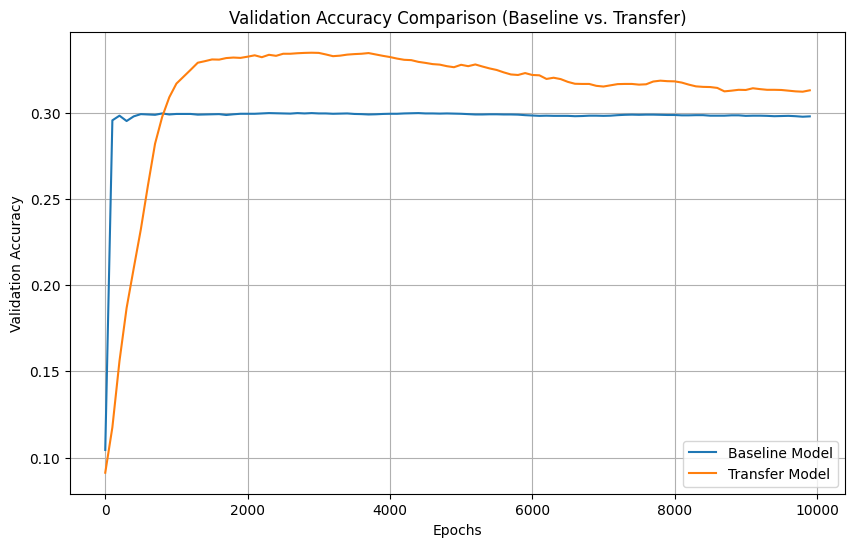

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow_addons as tfa

# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Set aside 500 examples for baseline and transfer model
baseline_x_train = x_train[-500:]
baseline_y_train = y_train[-500:]
x_train = x_train[:-500]
y_train = y_train[:-500]

# Prepare augmented data for pretext model
# Class 0: Original
# Class 1: Flip in a vertical way
# Class 2: Rotate 90 degree counter clock wise
X_class_0 = x_train
X_class_1 = np.flip(x_train, axis=1)
X_class_2 = np.rot90(x_train, k=1, axes=(1, 2))

Y_class_0 = np.zeros(y_train.shape)
Y_class_1 = np.ones(y_train.shape)
Y_class_2 = 2 * np.ones(y_train.shape)
                     
pretext_x_train = np.vstack([X_class_0 , X_class_1, X_class_2])
pretext_y_train = np.vstack([Y_class_0, Y_class_1, Y_class_2])

#Normalize
pretext_x_train  = pretext_x_train.reshape(-1, 32, 32, 3) / 255.0
pretext_x_train  = (pretext_x_train  - 0.5) * 2

baseline_x_train = baseline_x_train.reshape(-1, 32, 32, 3) / 255.0
baseline_x_train = (baseline_x_train  - 0.5) * 2

x_test = x_test.reshape(-1, 32, 32, 3) / 255.0
x_test = (x_test - 0.5) * 2

print(pretext_x_train.shape)
print(pretext_y_train.shape)





# Pretext model (Problem 3 model)
model_pretext = models.Sequential()
model_pretext.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(32, 32, 3), kernel_initializer='he_normal'))
model_pretext.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model_pretext.add(layers.Conv2D(10, (5, 5), activation='relu', kernel_initializer='he_normal'))
model_pretext.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model_pretext.add(layers.Flatten())
model_pretext.add(layers.Dense(20, activation='relu', kernel_initializer='he_normal'))
model_pretext.add(layers.Dense(3, activation='softmax'))  # 3 Classes

# Compile and Fit
model_pretext.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_pretext = model_pretext.fit(pretext_x_train, pretext_y_train, epochs=200, batch_size=256)

# Save for transfer model
model_pretext.save("pretext_param.h5")





# Baseline Model
model_baseline = models.Sequential()
model_baseline.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(32, 32, 3), kernel_initializer='he_normal'))
model_baseline.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model_baseline.add(layers.Conv2D(10, (5, 5), activation='relu', kernel_initializer='he_normal'))
model_baseline.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model_baseline.add(layers.Flatten())
model_baseline.add(layers.Dense(20, activation='relu', kernel_initializer='he_normal'))
model_baseline.add(layers.Dense(10, activation='softmax'))  # 10 classes

# Compile and fit

model_baseline.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_baseline = model_baseline.fit(baseline_x_train, baseline_y_train, validation_data=(x_test, y_test), 
                                      epochs=10000, batch_size=500)





# Transfer Learning model
model_transfer = models.Sequential()
model_transfer.add(layers.Conv2D(10, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model_transfer.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model_transfer.add(layers.Conv2D(10, (5, 5), activation='relu'))
model_transfer.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model_transfer.add(layers.Flatten())
model_transfer.add(layers.Dense(20, activation='relu'))
model_transfer.add(layers.Dense(3, activation='softmax'))  # 3 Classes

# Load and set pretext weights 
model_transfer.load_weights("pretext_param.h5")
model_transfer.set_weights(model_pretext.get_weights())

# Delete and insert last layer for 10 classes and weights with He_normal                 
model_transfer.pop()
model_transfer.add(layers.Dense(10, activation='softmax', kernel_initializer='he_normal'))

# Learning rate setting: last =1e-3 / others = 1e-5
optimizers = [
    tf.keras.optimizers.Adam(learning_rate=1e-5),
    tf.keras.optimizers.Adam(learning_rate=1e-3)
]
optimizers_and_layers = [(optimizers[0], model_transfer.layers[:-1]), (optimizers[1], model_transfer.layers[-1])]
optimizer = tfa.optimizers.MultiOptimizer(optimizers_and_layers)

#Compile and fit
model_transfer.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_transfer = model_transfer.fit(baseline_x_train, baseline_y_train,validation_data=(x_test, y_test),epochs=10000,
                                     batch_size=500)   
 

    
    
    
    
# Extract validation accuracy for every 100th epoch
baseline_val_acc = history_baseline.history['val_accuracy'][::100]
transfer_val_acc = history_transfer.history['val_accuracy'][::100]

# Create a list of epochs for the x-axis (every 100th epoch)
epochs = list(range(0, len(baseline_val_acc) * 100, 100))

# Plot the validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, baseline_val_acc, label='Baseline Model')
plt.plot(epochs, transfer_val_acc, label='Transfer Model')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy Comparison (Baseline vs. Transfer)')
plt.legend()
plt.grid(True)
plt.show()    